Código Geral

In [70]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import ast
from collections import Counter
from pandas import DataFrame

sns.set_theme()


start_year = 2013
end_year = 2023


In [71]:
def get_file_path(year, subfolder = ""):
    file_name = f'tmdb_dump-{year}.csv'
    folder = f'prepared_data/{subfolder}'
    return f'{folder}{file_name}'

def read_data_set(year, subfolder = ""):
    file_path = get_file_path(year, subfolder)
    data = pd.read_csv(file_path, encoding='utf-8', lineterminator='\n')
    data["release_date"] = pd.to_datetime(data["release_date"])
    data['year'] = data['release_date'].dt.year
    
    return data

In [72]:
movies_data_by_year = {}
br_movies_data_by_year = {}
eua_movies_data_by_year = {}

for year in range(start_year, end_year+1):
    data = read_data_set(year)
    movies_data_by_year[year] = data
    
    if 'all' in movies_data_by_year:
        movies_data_by_year['all'] = pd.concat([movies_data_by_year['all'], data])
    else:
        movies_data_by_year['all'] = data
        
for year in range(start_year, end_year+1):
    data = read_data_set(year, 'brazilAndEua/')
    data_br = data[data['production_countries'].apply(lambda x: 'Brazil' in x and len(ast.literal_eval(x)) == 1)]
    data_eua = data[data['production_countries'].apply(lambda x: 'United States of Americ' in x and len(ast.literal_eval(x)) == 1)]
    br_movies_data_by_year[year] = data_br
    
    if 'all' in br_movies_data_by_year:
        br_movies_data_by_year['all'] = pd.concat([br_movies_data_by_year['all'], data_br])
    else:
        br_movies_data_by_year['all'] = data_br
    
    eua_movies_data_by_year[year] = data_eua
    
    if 'all' in eua_movies_data_by_year:
        eua_movies_data_by_year['all'] = pd.concat([eua_movies_data_by_year['all'], data_eua])
    else:
        eua_movies_data_by_year['all'] = data_eua

Análise dos Dados numéricos (Quantidade e Média)

In [34]:
def movies_count(year):
    df =  movies_data_by_year[year]
    return len(df.index)

def budget_mean(year):
    df: DataFrame = movies_data_by_year[year]
    return df.loc[:, 'budget'].mean()

def revenue_mean(year):
    df: DataFrame = movies_data_by_year[year]
    return df.loc[:, 'revenue'].mean()

def runtime_mean(year):
    df: DataFrame = movies_data_by_year[year]
    return df.loc[:, 'runtime'].mean()

def vote_count_mean(year):
    df: DataFrame = movies_data_by_year[year]
    return df.loc[:, 'vote_count'].mean()

def vote_mean_by_year(year):
    df: DataFrame = movies_data_by_year[year]
    return vote_mean(df)

def vote_mean(df):
    weight = df["vote_count"]
    terms = weight * df["vote_average"]
    return terms.sum() / df["vote_count"].sum()
    
def vote_deviation(df):
    mean = vote_mean(df)
    weight = df["vote_count"]   
    df["deviation"] = ((df["vote_average"] - mean)**2) * weight
    
    upper_eq_part = df["deviation"].sum()
    
    weight_sum = weight.sum()
    n = weight[weight != 0].count()
    bottom_eq_part = weight_sum * (n - 1) / n
    
    return math.sqrt(upper_eq_part/bottom_eq_part)

Calculo do desvio padrão amostral dos dados numéricos

In [35]:
df_concat = movies_data_by_year[start_year]
for year in range(start_year+1, end_year+1):
    df_concat = pd.concat([df_concat, movies_data_by_year[year]])
    
numeric_columns = ["budget", "revenue", "runtime", "vote_count"]
print(df_concat[numeric_columns].std())
print("Deviation: ", vote_deviation(df_concat))


budget        5.017739e+07
revenue       2.170027e+08
runtime       2.108704e+01
vote_count    3.689888e+03
dtype: float64
Deviation:  0.7286371651706611


In [36]:
for year in range(start_year, end_year+1):
    values = year, movies_count(year), budget_mean(year), revenue_mean(year), runtime_mean(year), vote_count_mean(year), vote_mean_by_year(year)
    for value in values:
        print("{:.2f}".format(value), " & " , end="")
    print("")
    
movies = movies_data_by_year['all']
movies[movies.duplicated(keep='last')]


2013.00  & 330.00  & 29303094.60  & 84494262.40  & 111.97  & 2372.05  & 6.79  & 
2014.00  & 314.00  & 27957622.18  & 89641096.38  & 109.75  & 2648.03  & 7.01  & 
2015.00  & 298.00  & 28644129.90  & 97031834.21  & 111.99  & 2429.60  & 6.81  & 
2016.00  & 338.00  & 30994672.34  & 92910089.53  & 112.04  & 2470.69  & 6.83  & 
2017.00  & 304.00  & 29986882.77  & 104869605.15  & 112.58  & 2613.95  & 6.96  & 
2018.00  & 272.00  & 30722275.32  & 110836926.46  & 112.61  & 2359.91  & 7.00  & 
2019.00  & 251.00  & 32862991.07  & 119087300.21  & 111.95  & 2376.76  & 7.14  & 
2020.00  & 131.00  & 26146797.60  & 39878272.18  & 106.04  & 1548.56  & 7.04  & 
2021.00  & 157.00  & 45572795.15  & 94433473.81  & 115.19  & 2137.90  & 7.21  & 
2022.00  & 173.00  & 39368203.98  & 105105561.14  & 115.13  & 1499.87  & 7.11  & 
2023.00  & 205.00  & 45161701.40  & 107470294.39  & 117.77  & 1106.56  & 7.14  & 


Empty DataFrame
Columns: [id, original_language, original_title, overview, release_date, title, vote_average, vote_count, belongs_to_collection, budget, genres, production_companies, production_countries, revenue, runtime, spoken_languages, tagline, cast, crew, keywords, year]
Index: []

[0 rows x 21 columns]

# Histograma Variáveis numéricas

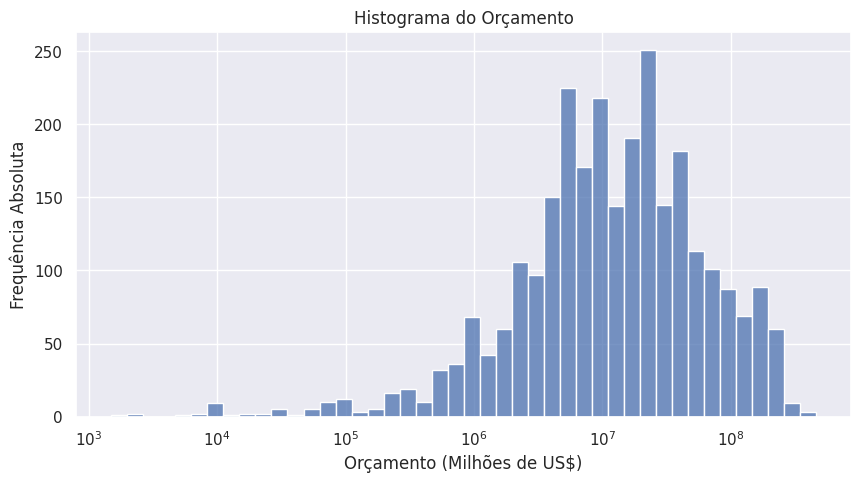

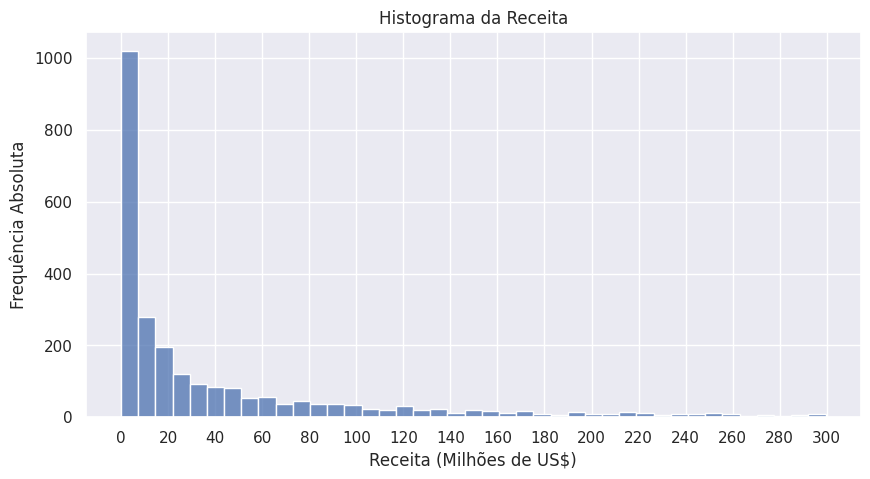

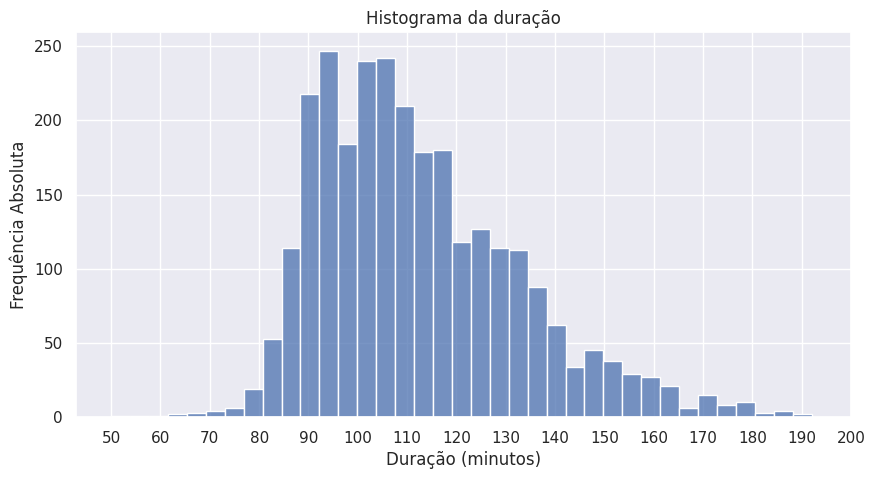

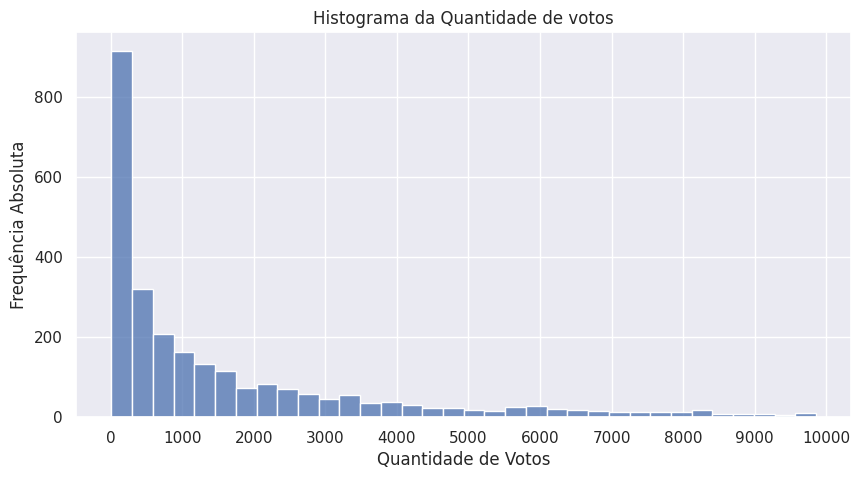

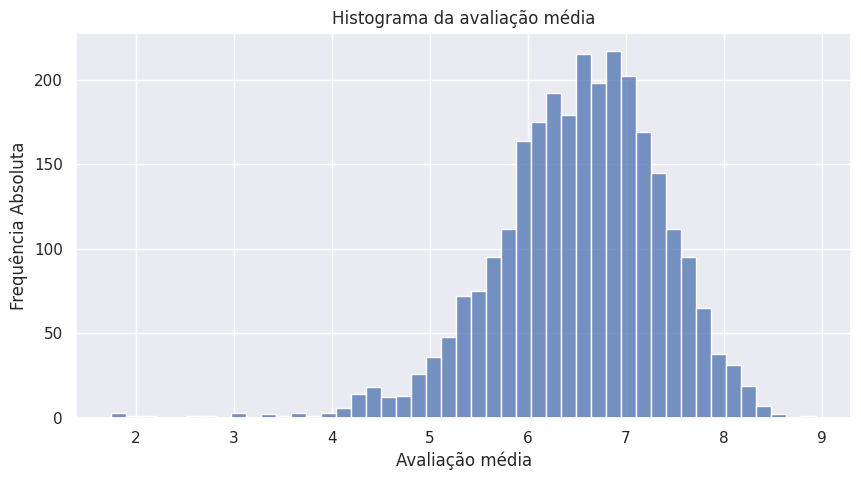

In [37]:
million = 1000000
df_movies = movies_data_by_year['all']
budget_mask = (df_movies['budget'] > 1000)
plt.figure(figsize=(10, 5))

sns.histplot(data=df_movies[budget_mask]['budget'], log_scale=[True, False])
plt.title("Histograma do Orçamento")
plt.ylabel("Frequência Absoluta")
plt.xlabel("Orçamento (Milhões de US$)")
# plt.xticks(range(0, 201, 10))
plt.show()

revenue_mask = (df_movies['revenue'] < 300 * million)
plt.figure(figsize=(10, 5))
plt.title("Histograma da Receita")
sns.histplot(df_movies['revenue'][revenue_mask]/million)
plt.ylabel("Frequência Absoluta")
plt.xlabel("Receita (Milhões de US$)")
plt.xticks(range(0, 301, 20))
plt.show()

plt.figure(figsize=(10, 5))
runtime_mask = (df_movies['runtime'] >= 50) & (df_movies['runtime'] <= 200)
sns.histplot(df_movies[runtime_mask]['runtime'])
plt.title("Histograma da duração")
plt.ylabel("Frequência Absoluta")
plt.xlabel("Duração (minutos)")
plt.xticks(range(50, 201, 10))
plt.show()

plt.figure(figsize=(10, 5))
vote_count_mask = (df_movies['vote_count'] <= 10000)
sns.histplot(df_movies[vote_count_mask]['vote_count'])
plt.ylabel("Frequência Absoluta")
plt.title("Histograma da Quantidade de votos")
plt.xlabel("Quantidade de Votos")
plt.xticks(range(0, 10001, 1000))
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_movies['vote_average'])
plt.ylabel("Frequência Absoluta")
plt.title("Histograma da avaliação média")
plt.xlabel("Avaliação média")
plt.show()


Mapas coropléticos

In [127]:
import numpy as np
import folium
import geopandas as gpd
from folium import Choropleth

geo_json_data = gpd.read_file('https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json')
geo_json_data = geo_json_data.rename(columns={"name": "production_country"})
geo_countries_list = geo_json_data["production_country"].tolist()


country_mapping = {
    'Hong Kong': 'China',
    'Serbia': 'Republic of Serbia',
    'Aruba': 'Netherlands',
    'Singapore': 'Malaysia',
    'Congo': 'Democratic Republic of the Congo',
    'Bahamas': 'The Bahamas',
    'Guadaloupe': 'France'
}

for year in range (start_year, end_year+1):
    df = movies_data_by_year[year]
    df['production_countries'] = df['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    df_countries = df.explode('production_countries', ignore_index=True)
    country_counts = df_countries['production_countries'].value_counts().reset_index()
    country_counts.columns = ['production_country', 'count']

    country_counts['count'] = np.log10(country_counts['count'])

    country_counts.replace(country_mapping, inplace=True)
    
    df_countries_list = country_counts['production_country'].tolist()
    missing_countries = [country for country in df_countries_list if country not in geo_countries_list]

    # Exibe os países que não têm correspondência
    print("Países que não correspondem no GeoJSON:")
    print(missing_countries)
    

    # Inicializa o mapa
    m = folium.Map(location=[45, -90], zoom_start=1.5)

    # Adiciona o choropleth map ao mapa
    Choropleth(
        geo_data=geo_json_data,
        name='choropleth',
        data=country_counts,
        columns=['production_country', 'count'],
        key_on='feature.properties.production_country',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Log10(Número de Filmes por País)',
    ).add_to(m)

    # Adiciona os controles de camada
    folium.LayerControl().add_to(m)

    # Exibe o mapa
    m.save(f'choropleth/choropleth_paises_produtores-{year}.html')
    m
    
    


Países que não correspondem no GeoJSON:
[]
Países que não correspondem no GeoJSON:
[]
Países que não correspondem no GeoJSON:
[]
Países que não correspondem no GeoJSON:
[]
Países que não correspondem no GeoJSON:
[]
Países que não correspondem no GeoJSON:
[]
Países que não correspondem no GeoJSON:
[]
Países que não correspondem no GeoJSON:
[]
Países que não correspondem no GeoJSON:
[]
Países que não correspondem no GeoJSON:
[]
Países que não correspondem no GeoJSON:
[]


Nuvem de Palavras, grafo e histograma de generos de filmes

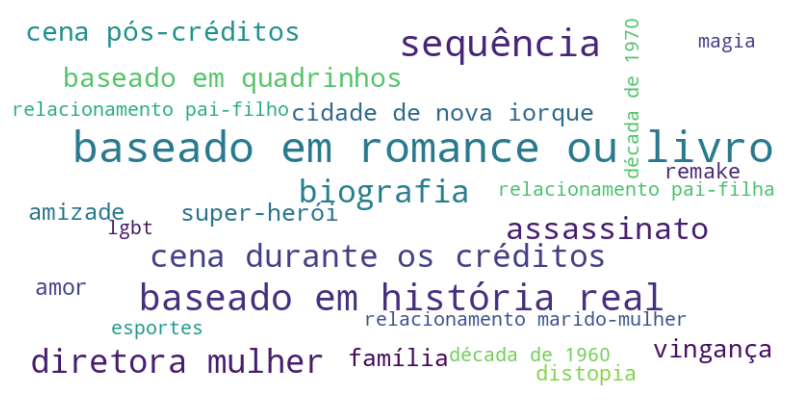

['based on novel or book', 'sequel', 'based on true story', 'woman director', 'biography', 'duringcreditsstinger', 'murder', 'based on comic', 'aftercreditsstinger', 'revenge', 'new york city', 'superhero', 'family', 'friendship', 'love', 'dystopia', 'remake', 'lgbt', '1970s', 'husband wife relationship', 'parent child relationship', 'sports', 'father daughter relationship', 'magic', '1960s']
Counter({('based on true story', 'biography'): 75, ('based on comic', 'superhero'): 62, ('aftercreditsstinger', 'duringcreditsstinger'): 54, ('based on novel or book', 'based on true story'): 40, ('aftercreditsstinger', 'superhero'): 39, ('aftercreditsstinger', 'based on comic'): 38, ('based on comic', 'duringcreditsstinger'): 38, ('duringcreditsstinger', 'superhero'): 35, ('duringcreditsstinger', 'sequel'): 33, ('based on novel or book', 'biography'): 32, ('aftercreditsstinger', 'sequel'): 30, ('based on novel or book', 'love'): 26, ('based on novel or book', 'sequel'): 24, ('based on novel or bo

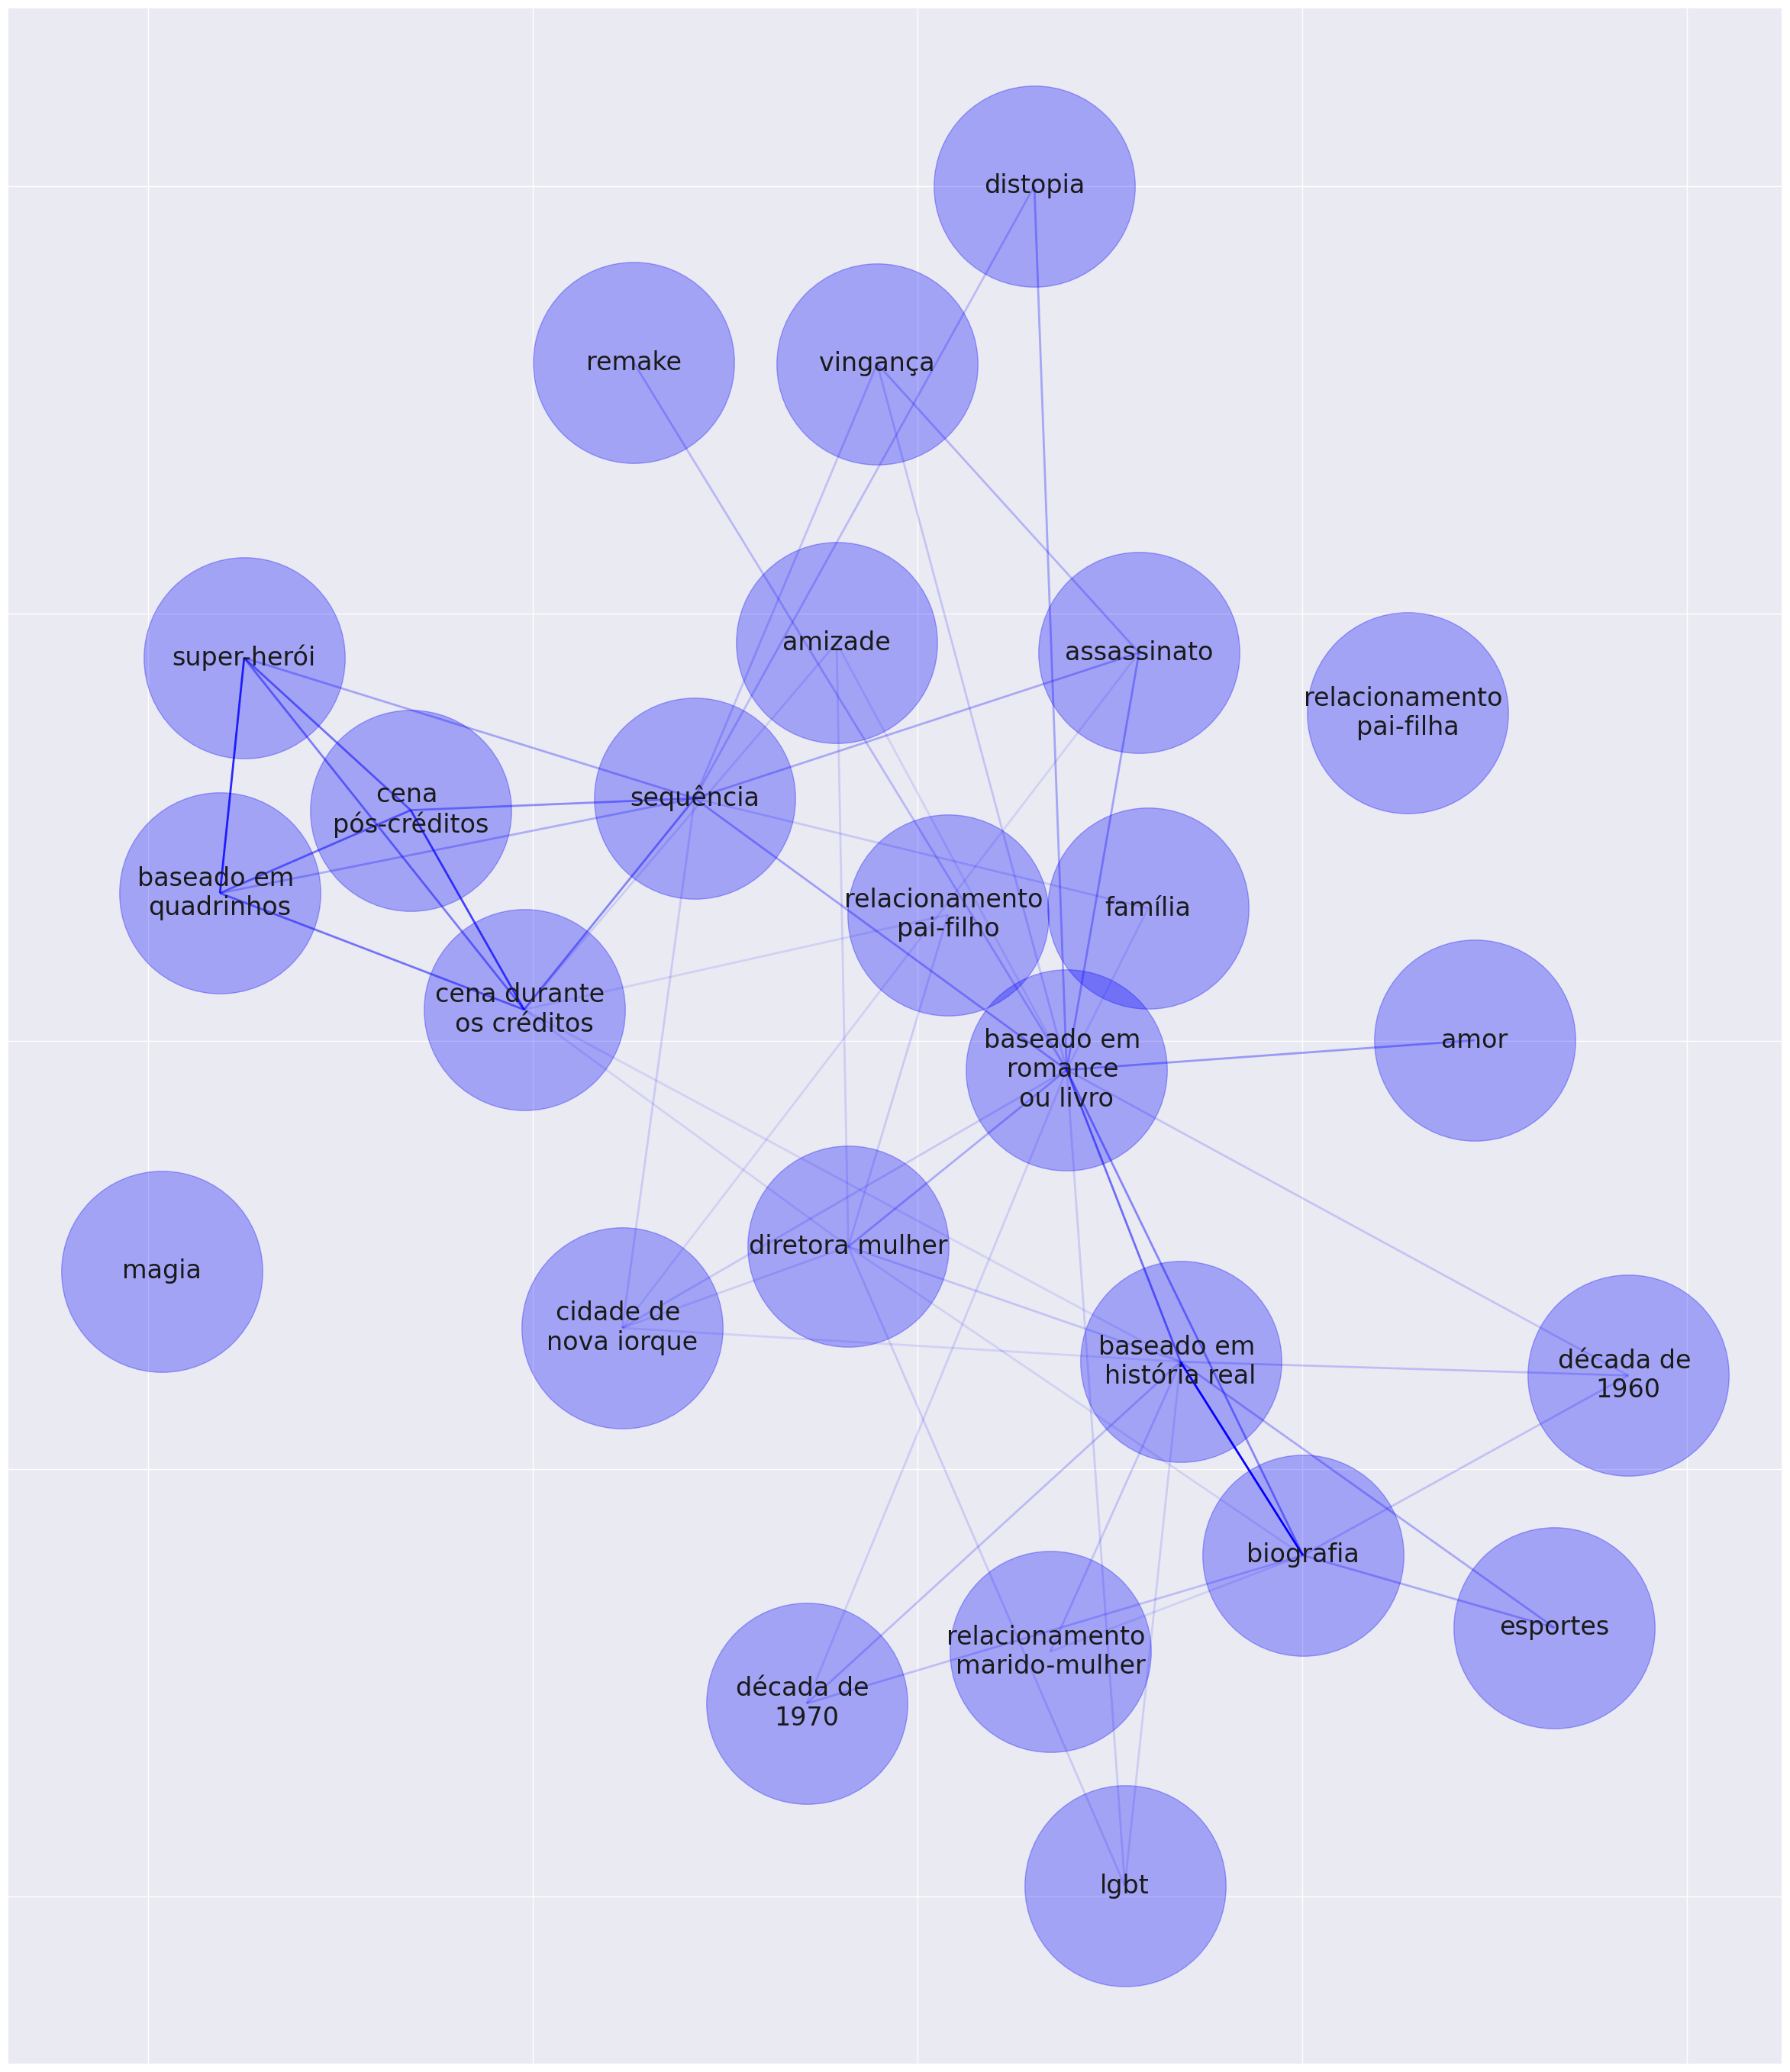

In [75]:
from wordcloud import WordCloud
from itertools import combinations
import networkx as nx

df = movies_data_by_year['all']

quantity_of_words = 25

# Mapa de palavaras para keywords
df['keywords'] =  df['keywords'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_keywords = df.explode('keywords', ignore_index=True).dropna(subset='keywords')['keywords']
all_keywords = [str(keyword).strip() for keyword in df_keywords]
keyword_counts = Counter(all_keywords)
keyword_counts_most_common = keyword_counts.most_common(quantity_of_words)

translated_keywords = {
    'based on novel or book': 'baseado em \nromance \nou livro',
    'sequel': 'sequência',
    'based on true story': 'baseado em \nhistória real',
    'woman director': 'diretora mulher',
    'biography': 'biografia',
    'duringcreditsstinger': 'cena durante \nos créditos',
    'murder': 'assassinato',
    'based on comic': 'baseado em \nquadrinhos',
    'aftercreditsstinger': 'cena \npós-créditos',
    'revenge': 'vingança',
    'new york city': 'cidade de \nnova iorque',
    'superhero': 'super-herói',
    'family': 'família',
    'friendship': 'amizade',
    'love': 'amor',
    'lgbt': 'lgbt',
    'dystopia': 'distopia',
    'remake': 'remake',
    'husband wife relationship': 'relacionamento \nmarido-mulher',
    '1970s': 'década de \n1970',
    '1960s': 'década de \n1960',
    'parent child relationship': 'relacionamento \npai-filho',
    'magic': 'magia',
    'sports': 'esportes',
    'father daughter relationship': 'relacionamento \npai-filha',
    'gay theme': 'tema gay',
    'romance': 'romance',
    'christmas': 'natal',
    'short film': 'curta-metragem',
}


keyword_counts_translated = [(translated_keywords.get(keyword, keyword).replace("\n", ""), count) for keyword, count in keyword_counts_most_common]


keyword_counts_dict = {k: v for k, v in keyword_counts_translated}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title(f'Word Cloud das Keywords')
plt.show()

keywords_filter_list = [k for k,v in keyword_counts_most_common]
print(keywords_filter_list)

co_occurrence_counts = Counter()
for keywords in df['keywords']:
    filtered_keywords = [keyword for keyword in keywords if keyword in keywords_filter_list]
    co_occurrence_counts.update(Counter(combinations(sorted(filtered_keywords), 2)))

G = nx.Graph()

print(co_occurrence_counts)

max_co_occurrence = co_occurrence_counts.most_common(1)[0][1]
for (keyword1, keyword2), count in co_occurrence_counts.items():
    # norm = float(count) / max_co_occurrence
    norm = float(count) / max_co_occurrence
    G.add_edge(translated_keywords[keyword1], translated_keywords[keyword2], weight=norm)
    
pos = nx.spring_layout(G, k=0.4)

# Desenhando o grafo
plt.figure(figsize=(30, 35))

# Desenhando as arestas com pesos
max_weight = max((data['weight'] for u, v, data in G.edges(data=True)))
edges = nx.draw_networkx_edges(
    G, pos, edge_color='blue', alpha=[G[u][v]['weight'] if G[u][v]['weight'] > 0.1 else 0 for u, v in G.edges()],
    width=2
)

# Desenhando os nós com tamanhos proporcionais à frequência
nodes = nx.draw_networkx_nodes(
    G, pos, node_size=36000,
    node_color='blue', alpha=0.3
)

# Desenhando os rótulos dos nós
labels = nx.draw_networkx_labels(G, pos, font_size=24)

# plt.title('Grafo de Co-Ocorrência das Keywords')
plt.show()



Keywords por país

/tmp/ipykernel_7248/1568636607.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_top_keywords['keywords'] = br_top_keywords['keywords'].apply(lambda keyword: translated_keywords[keyword].replace("\n", ""))
/tmp/ipykernel_7248/1568636607.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_top_keywords['keywords'] = us_top_keywords['keywords'].apply(lambda keyword: translated_keywords[keyword].replace("\n", ""))


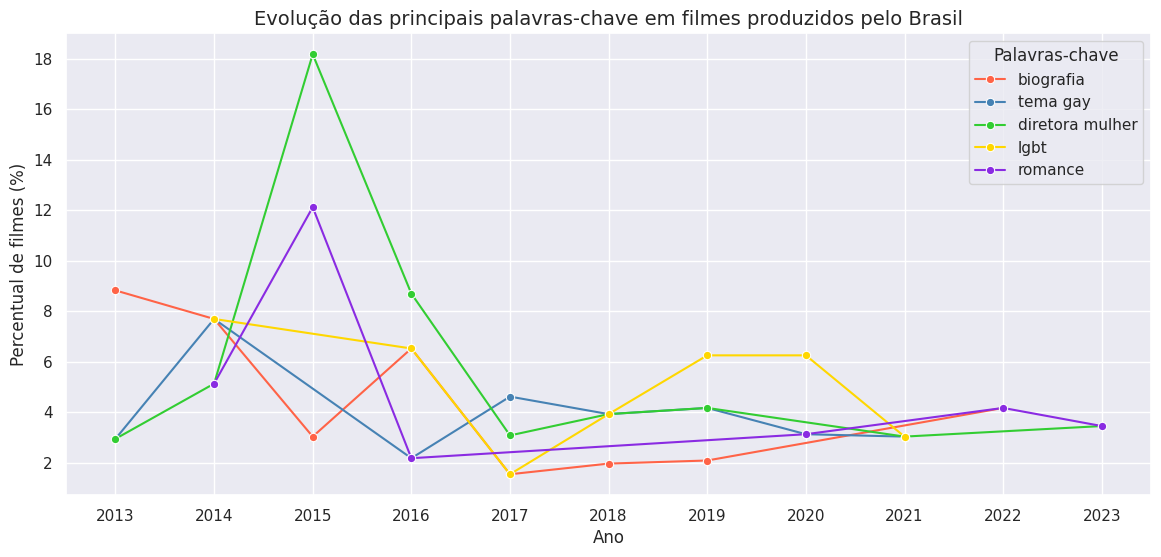

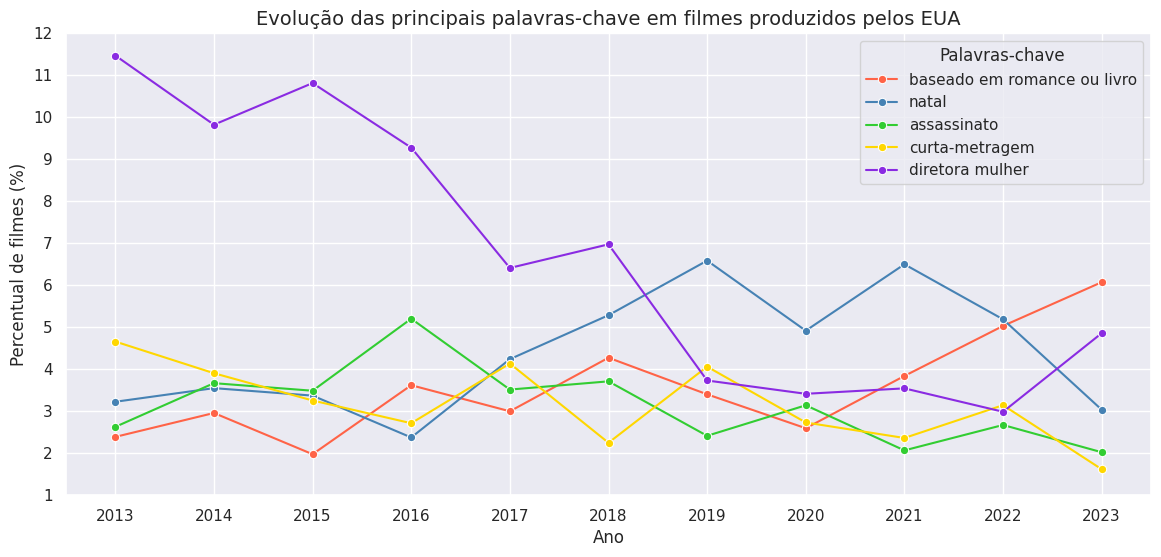

/tmp/ipykernel_7248/1568636607.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  br_top_keywords_by_year = br_keyword_percentages.groupby('year').apply(lambda x: x.nlargest(10, 'percentage')).reset_index(drop=True)


year            keywords  percentage
0    2013           biography    8.823529
1    2013     adult animation    5.882353
2    2013               2090s    2.941176
3    2013            assassin    2.941176
4    2013         black magic    2.941176
..    ...                 ...         ...
105  2023  airplane hijacking    3.448276
106  2023   amazon rainforest    3.448276
107  2023              amused    3.448276
108  2023         armored car    3.448276
109  2023         beach house    3.448276

[110 rows x 3 columns]

In [86]:
# Explodir a coluna de keywords para Brasil e EUA
def explode_keywords(data):
    data['keywords'] = data['keywords'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    exploded = data.explode('keywords', ignore_index=True).dropna(subset=['keywords'])
    return exploded

br_keywords = explode_keywords(br_movies_data_by_year['all'])
us_keywords = explode_keywords(eua_movies_data_by_year['all'])

# Contar frequências por ano para Brasil e EUA
def get_keyword_percentages(data, total_movies_per_year):
    keyword_counts = data.groupby(['year', 'keywords']).size().reset_index(name='count')
    
    keyword_counts = keyword_counts.merge(total_movies_per_year, on='year', how='left')
    keyword_counts['percentage'] = (keyword_counts['count'] / keyword_counts['total_movies']) * 100
    return keyword_counts

br_keyword_percentages = get_keyword_percentages(br_keywords, br_movies_data_by_year['all'].groupby('year').size().reset_index(name='total_movies'))
us_keyword_percentages = get_keyword_percentages(us_keywords, eua_movies_data_by_year['all'].groupby('year').size().reset_index(name='total_movies'))

def select_top_keywords(data, top_n=5):
    top_keywords = data.groupby('keywords')['count'].sum().nlargest(top_n).index
    return data[data['keywords'].isin(top_keywords)]

br_top_keywords = select_top_keywords(br_keyword_percentages)
us_top_keywords = select_top_keywords(us_keyword_percentages)

br_top_keywords['keywords'] = br_top_keywords['keywords'].apply(lambda keyword: translated_keywords[keyword].replace("\n", ""))
us_top_keywords['keywords'] = us_top_keywords['keywords'].apply(lambda keyword: translated_keywords[keyword].replace("\n", ""))

custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']


plt.figure(figsize=(14, 6))
plt.xticks(range(start_year, end_year+1, 1))
plt.yticks(range(0, 19, 2))
sns.lineplot(data=br_top_keywords, x='year', y='percentage', hue='keywords', marker='o', palette=custom_palette)
plt.title("Evolução das principais palavras-chave em filmes produzidos pelo Brasil", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Percentual de filmes (%)", fontsize=12)
plt.legend(title="Palavras-chave", loc='upper right')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.xticks(range(start_year, end_year+1, 1))
sns.lineplot(data=us_top_keywords, x='year', y='percentage', hue='keywords', marker='o', palette=custom_palette)
plt.title("Evolução das principais palavras-chave em filmes produzidos pelos EUA", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Percentual de filmes (%)", fontsize=12)
plt.legend(title="Palavras-chave", loc='upper right')
plt.grid(True)
plt.yticks(range(1, 13, 1))
plt.show()


br_top_keywords_by_year = br_keyword_percentages.groupby('year').apply(lambda x: x.nlargest(10, 'percentage')).reset_index(drop=True)

# Mostrar a tabela resultante
br_top_keywords_by_year[['year', 'keywords', 'percentage']]



0       Comédia
1         Drama
2       Romance
3         Crime
4       Comédia
         ...   
7053    Comédia
7054    Romance
7055    Comédia
7056      Drama
7057    Comédia
Name: genres, Length: 7057, dtype: object


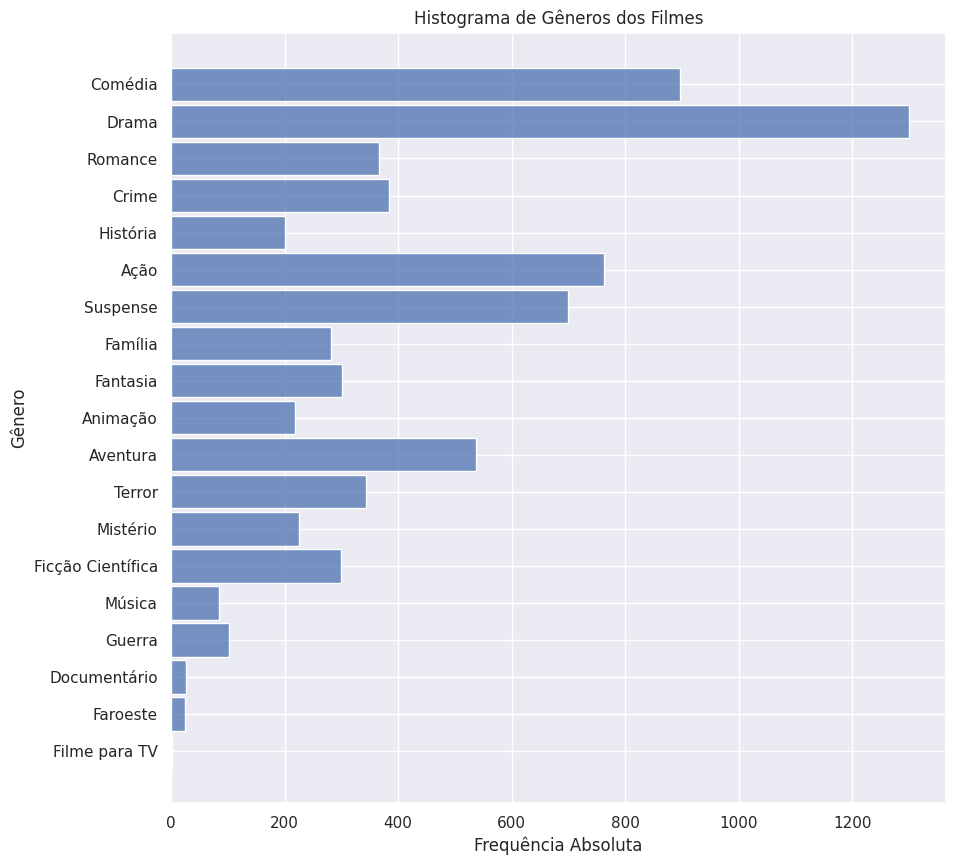

In [88]:
genre_translation = {
    'Action': 'Ação',
    'Adventure': 'Aventura',
    'Animation': 'Animação',
    'Comedy': 'Comédia',
    'Crime': 'Crime',
    'Documentary': 'Documentário',
    'Drama': 'Drama',
    'Family': 'Família',
    'Fantasy': 'Fantasia',
    'History': 'História',
    'Horror': 'Terror',
    'Music': 'Música',
    'Mystery': 'Mistério',
    'Romance': 'Romance',
    'Science Fiction': 'Ficção Científica',
    'Thriller': 'Suspense',
    'TV Movie': 'Filme para TV',
    'War': 'Guerra',
    'Western': 'Faroeste'
}

def translate_genres(genres, translation_dict):
    return [translation_dict.get(genre, genre) for genre in genres]

df = movies_data_by_year['all']
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_genres = df.explode('genres', ignore_index=True).dropna(subset='genres')
df_genres['genres'] = df_genres['genres'].apply(lambda x:genre_translation[x])
print(df_genres['genres'])
# print(df_genres)

# all_genres = [genre for sublist in df['genres'] for genre in sublist]
plt.figure(figsize=(10, 10))
sns.histplot(data=df_genres, y='genres', discrete=True, shrink=0.9)
plt.title('Histograma de Gêneros dos Filmes')
plt.xlabel('Frequência Absoluta')
plt.ylabel('Gênero')
# plt.xticks(rotation=45)
plt.show()


Evolução de gêneros por ano no Brasil e EUA

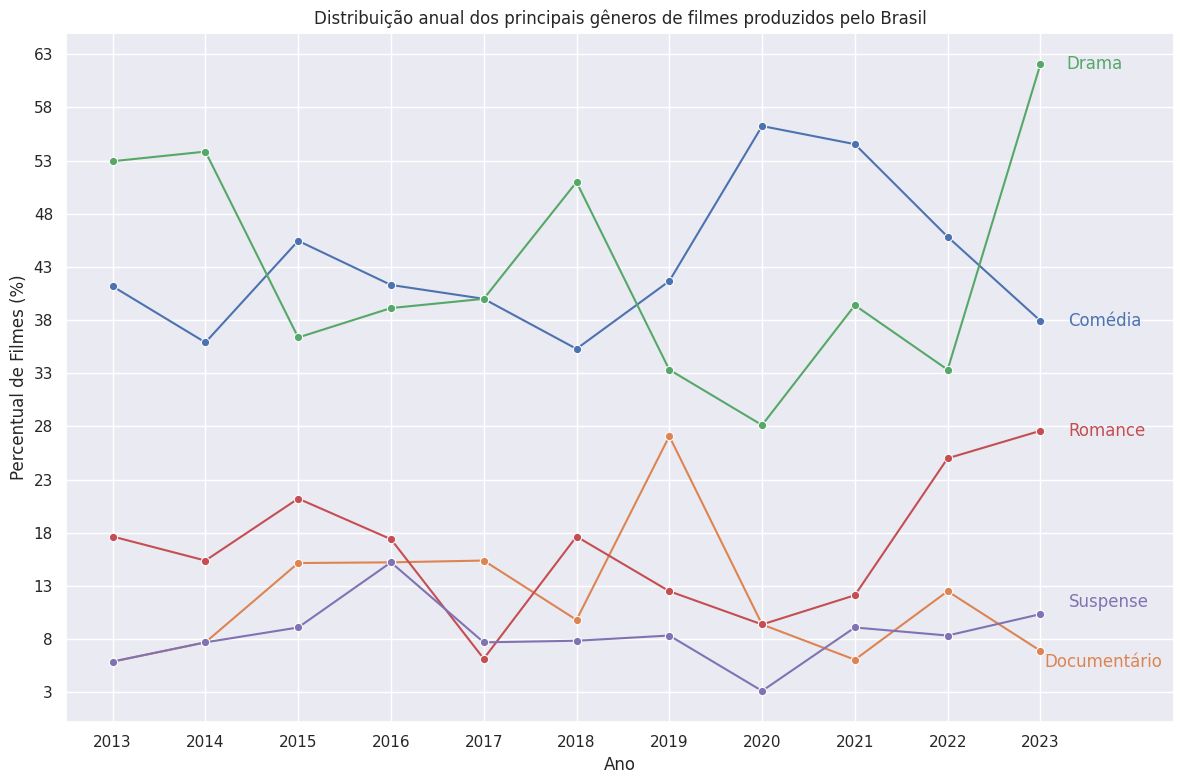

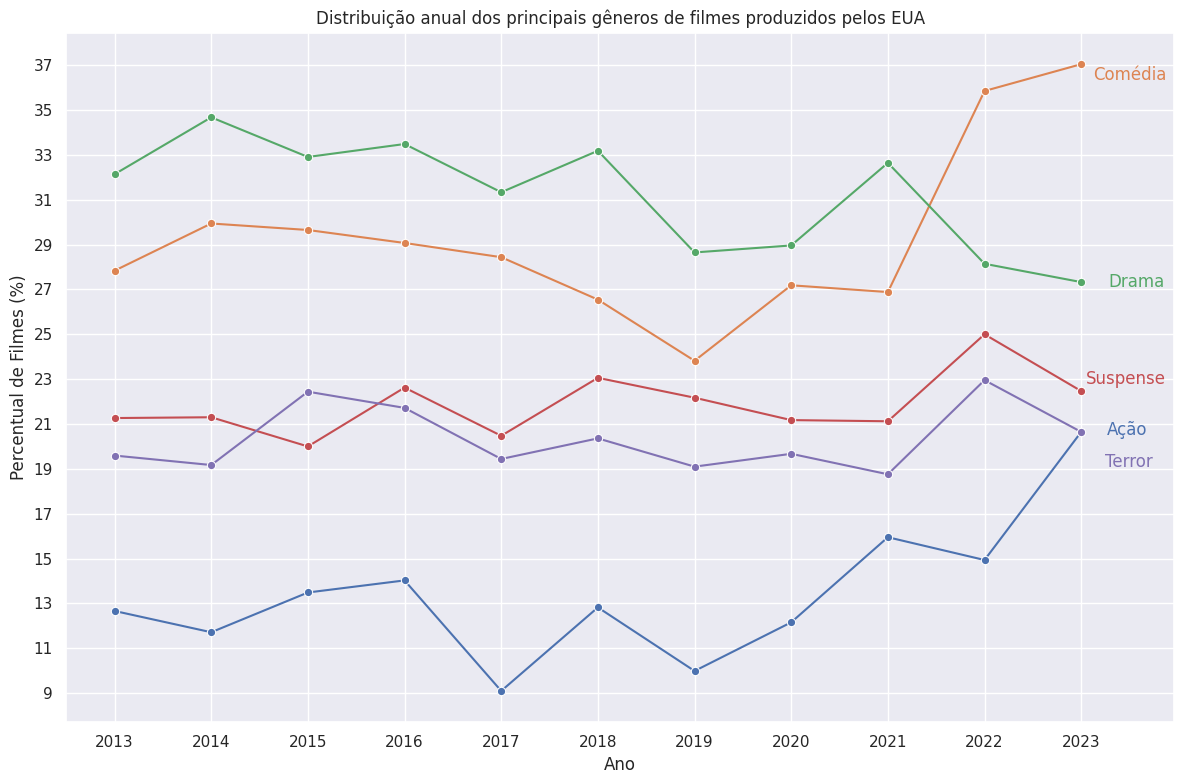

In [92]:
from adjustText import adjust_text

def show_five_most_common_genre(df, title, yticks = 2):
    df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    df_genres = df.explode('genres', ignore_index=True).dropna(subset='genres')
    df_genres['genres'] = df_genres['genres'].apply(lambda x:genre_translation[x])
    total_per_year = df.groupby('year').size()

    df_genres_percentage = (
        df_genres.groupby(['year', 'genres'])
        .size()
        .reset_index(name='count')
        .merge(total_per_year.rename('total'), on='year')
    )
    df_genres_percentage['percentage'] = (df_genres_percentage['count'] / df_genres_percentage['total']) * 100
    
    top_5_genres = df_genres_percentage.groupby('genres')['percentage'].max().nlargest(5).index
    df_top_5 = df_genres_percentage[df_genres_percentage['genres'].isin(top_5_genres)]

    plt.figure(figsize=(12, 8))
    plot = sns.lineplot(
        data=df_top_5,
        x='year',
        y='percentage',
        hue='genres',
        marker='o'
    )

    max_text_width = max(df_top_5['genres'].apply(len))

    plt.xlim(right=df_top_5['year'].max() + max_text_width * 0.12)

    texts = []
    for genre in df_top_5['genres'].unique():
        genre_data = df_top_5[df_top_5['genres'] == genre]
        texts.append(
            plt.text(
                x=genre_data['year'].iloc[-1] + 0.2,  # Ajustando o valor de x para frente
                y=genre_data['percentage'].iloc[-1],  # Última porcentagem
                s=genre,  # Nome do gênero
                fontsize=12,
                color=plot.get_lines()[df_top_5['genres'].unique().tolist().index(genre)].get_color(),
                ha='left',  # Ajusta a posição horizontal do texto
                va='center'  # Ajusta a posição vertical do texto
            )
        )

    # Ajuste automático dos textos para evitar sobreposição, com parâmetros adicionais
    adjust_text(
        texts,
        only_move={'text': 'xy', 'points': 'xy'},
        # arrowprops=dict(arrowstyle='-', color='gray'),
        force_text=0.3,  # Força os textos a se moverem mais se necessário
        lim=100,  # Limita o número de iterações
        expand_text=(1.2, 1.4),  # Expande o ajuste de texto
        ha='left',  # Coloca o texto à esquerda em relação ao ponto
        va='center'  # Coloca o texto no centro verticalmente
    )
    
    plt.xticks(range(start_year, end_year + 1, 1))
    plt.yticks(range(int(df_top_5['percentage'].min()), int(df_top_5['percentage'].max() + 2), yticks))
    
    plt.title(title)
    plt.xlabel('Ano')
    plt.ylabel('Percentual de Filmes (%)')
    plt.legend([], [], frameon=False)  # Remover legenda padrão
    plt.tight_layout()
    plt.show()

# df_genres_percentage_pivot = df_genres_percentage.pivot(index='year', columns='genres', values='percentage')
# plt.figure(figsize=(14, 10))
# sns.heatmap(df_genres_percentage_pivot, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Porcentagem (%)'})

# plt.title('Heatmap dos gêneros de filmes produzidos pelo Brasil ao longo do anos (em %)')
# plt.xlabel('Gêneros')
# plt.ylabel('Ano')
# plt.tight_layout()
# plt.show()

show_five_most_common_genre(br_movies_data_by_year['all'], 'Distribuição anual dos principais gêneros de filmes produzidos pelo Brasil', 5)
show_five_most_common_genre(eua_movies_data_by_year['all'], 'Distribuição anual dos principais gêneros de filmes produzidos pelos EUA', 2)

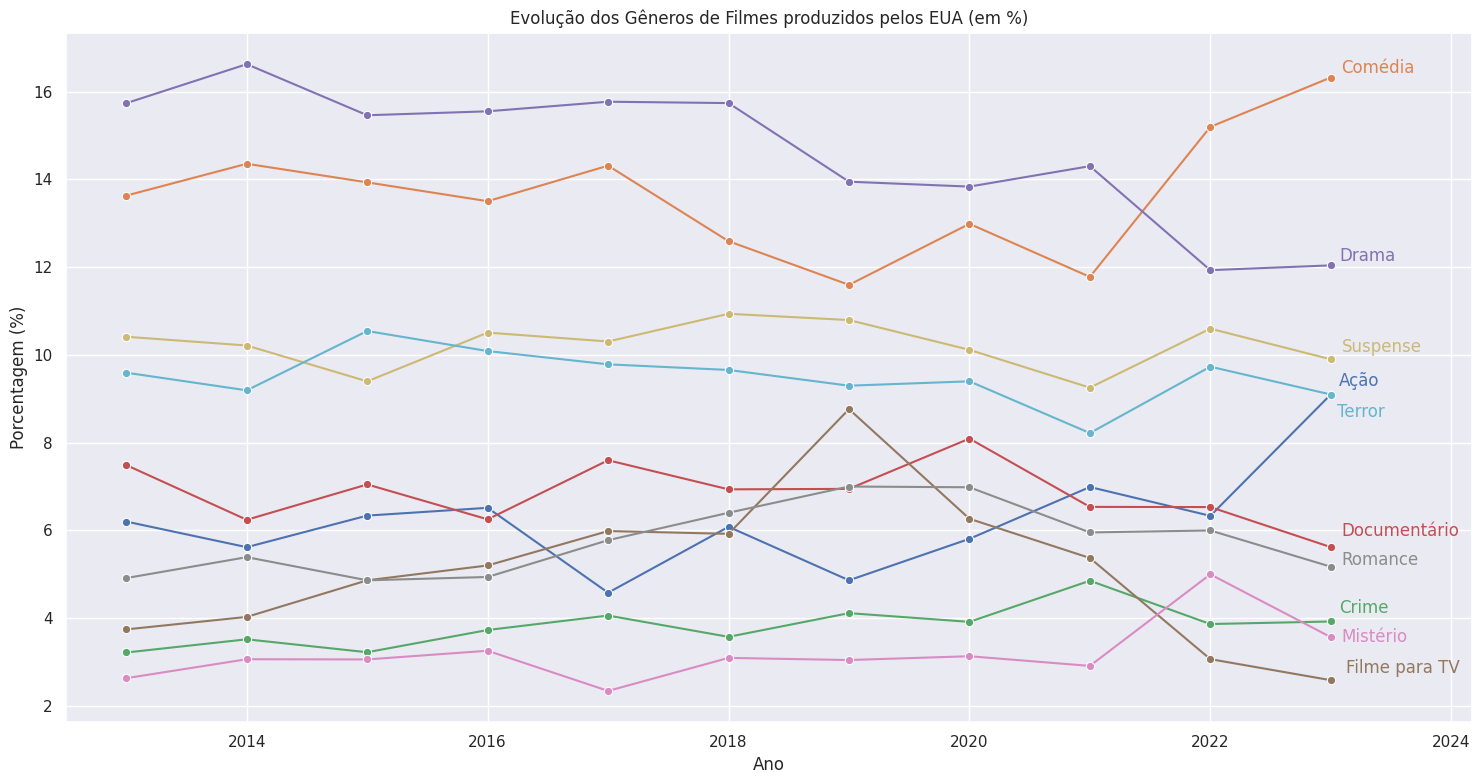

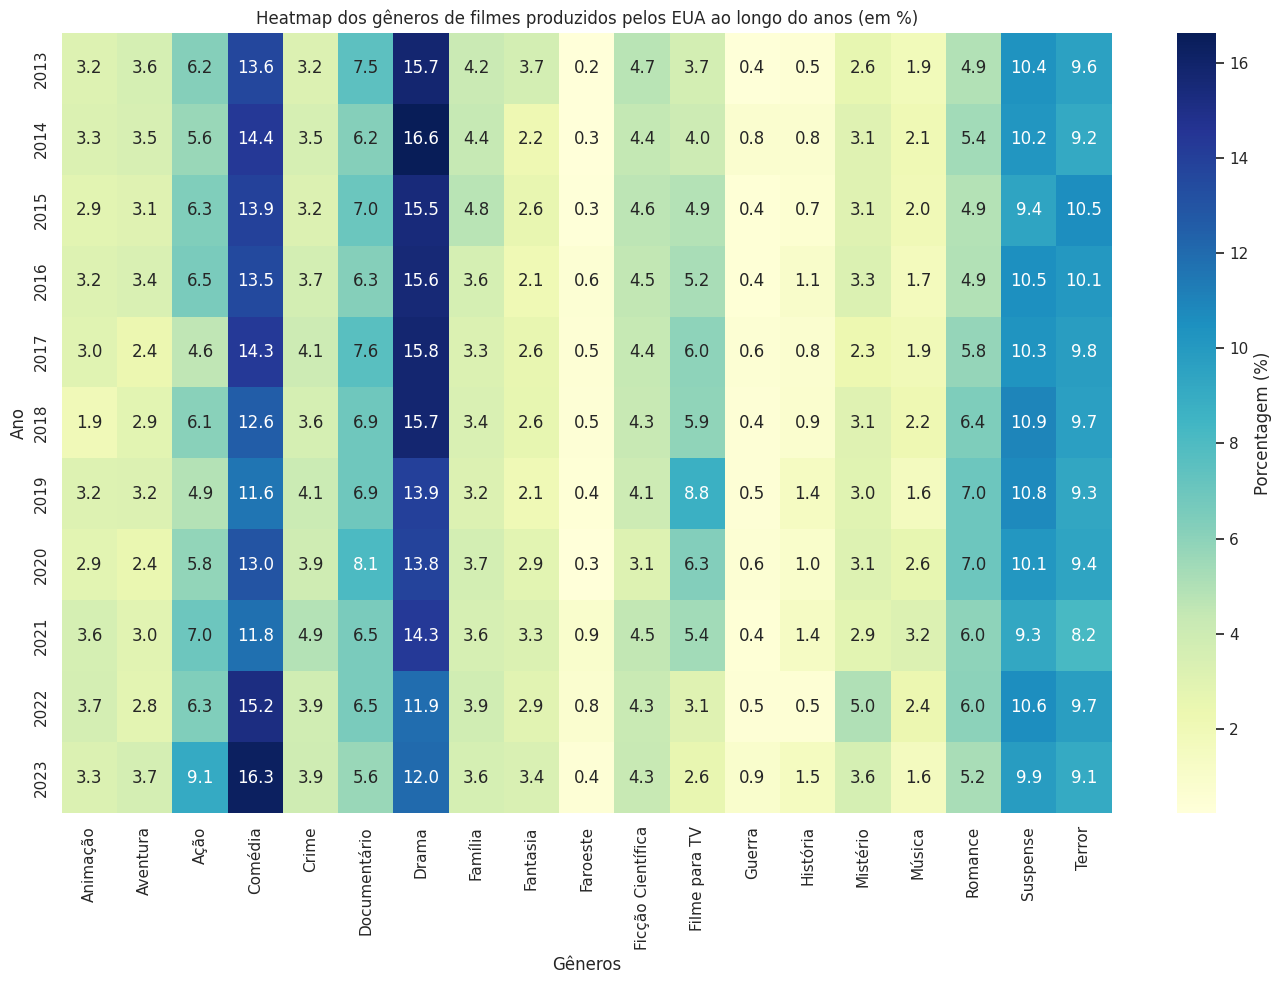

In [193]:
from adjustText import adjust_text

df = eua_movies_data_by_year['all']
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_genres = df.explode('genres', ignore_index=True).dropna(subset='genres')
df_genres['genres'] = df_genres['genres'].apply(lambda x:genre_translation[x])
total_per_year = df_genres.groupby('year').size()

df_genres_percentage = (
    df_genres.groupby(['year', 'genres'])
    .size()
    .reset_index(name='count')
    .merge(total_per_year.rename('total'), on='year')
)
df_genres_percentage['percentage'] = (df_genres_percentage['count'] / df_genres_percentage['total']) * 100

top_10_genres = df_genres_percentage.groupby('genres')['percentage'].max().nlargest(10).index
df_top_10 = df_genres_percentage[df_genres_percentage['genres'].isin(top_10_genres)]

plt.figure(figsize=(15, 8))
plot = sns.lineplot(
    data=df_top_10,
    x='year',
    y='percentage',
    hue='genres',
    marker='o'
)

max_text_width = max(df_top_10['genres'].apply(len))

plt.xlim(right=df_top_10['year'].max() + max_text_width * 0.09)

texts = []
for genre in df_top_10['genres'].unique():
    genre_data = df_top_10[df_top_10['genres'] == genre]
    texts.append(
        plt.text(
            x=genre_data['year'].iloc[-1],  # Último ano
            y=genre_data['percentage'].iloc[-1],  # Última porcentagem
            s=genre,  # Nome do gênero
            fontsize=12,
            color=plot.get_lines()[df_top_10['genres'].unique().tolist().index(genre)].get_color()
        )
    )

# Ajustar automaticamente os textos para evitar sobreposição
adjust_text(texts, only_move={'text': 'xy', 'points': 'xy'})

plt.title('Evolução dos Gêneros de Filmes produzidos pelos EUA (em %)')
plt.xlabel('Ano')
plt.ylabel('Porcentagem (%)')
plt.legend([], [], frameon=False)  # Remover legenda padrão
plt.tight_layout()
plt.show()

df_genres_percentage_pivot = df_genres_percentage.pivot(index='year', columns='genres', values='percentage')
plt.figure(figsize=(14, 10))
sns.heatmap(df_genres_percentage_pivot, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Porcentagem (%)'})

plt.title('Heatmap dos gêneros de filmes produzidos pelos EUA ao longo do anos (em %)')
plt.xlabel('Gêneros')
plt.ylabel('Ano')
plt.tight_layout()
plt.show()

Análise de Gêneros do Elenco

In [94]:
gender_translation = {
    "Not set/not specified": "Não definido / Não especificado",
    "Female": "Mulher",
    "Male": "Homem",
    "Non-binary": "Não-binário"
}

df = movies_data_by_year['all']

df["cast"] = df["cast"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('cast')

# separa cada key do objeto em uma coluna
df_normalized = pd.concat([df_exploded.drop(['cast'], axis=1), df_exploded['cast'].apply(pd.Series)], axis=1)

gender_counts_per_year_cast = df_normalized.groupby(['year', 'gender']).size().reset_index(name='count')
gender_counts_per_year_cast = gender_counts_per_year_cast.sort_values(by=['year', 'gender'])

gender_counts_per_year_cast['gender'] = gender_counts_per_year_cast['gender'].apply(lambda x:gender_translation[x])


total_counts_per_year = df_normalized.groupby('year').size().reset_index(name='total_count')


gender_counts_per_year_cast_merged = gender_counts_per_year_cast.merge(total_counts_per_year, on='year')
gender_counts_per_year_cast_merged['percentage'] = (gender_counts_per_year_cast_merged['count'] / gender_counts_per_year_cast_merged['total_count']) * 100
gender_counts_per_year_cast_merged = gender_counts_per_year_cast_merged.sort_values(by=['year', 'gender'])

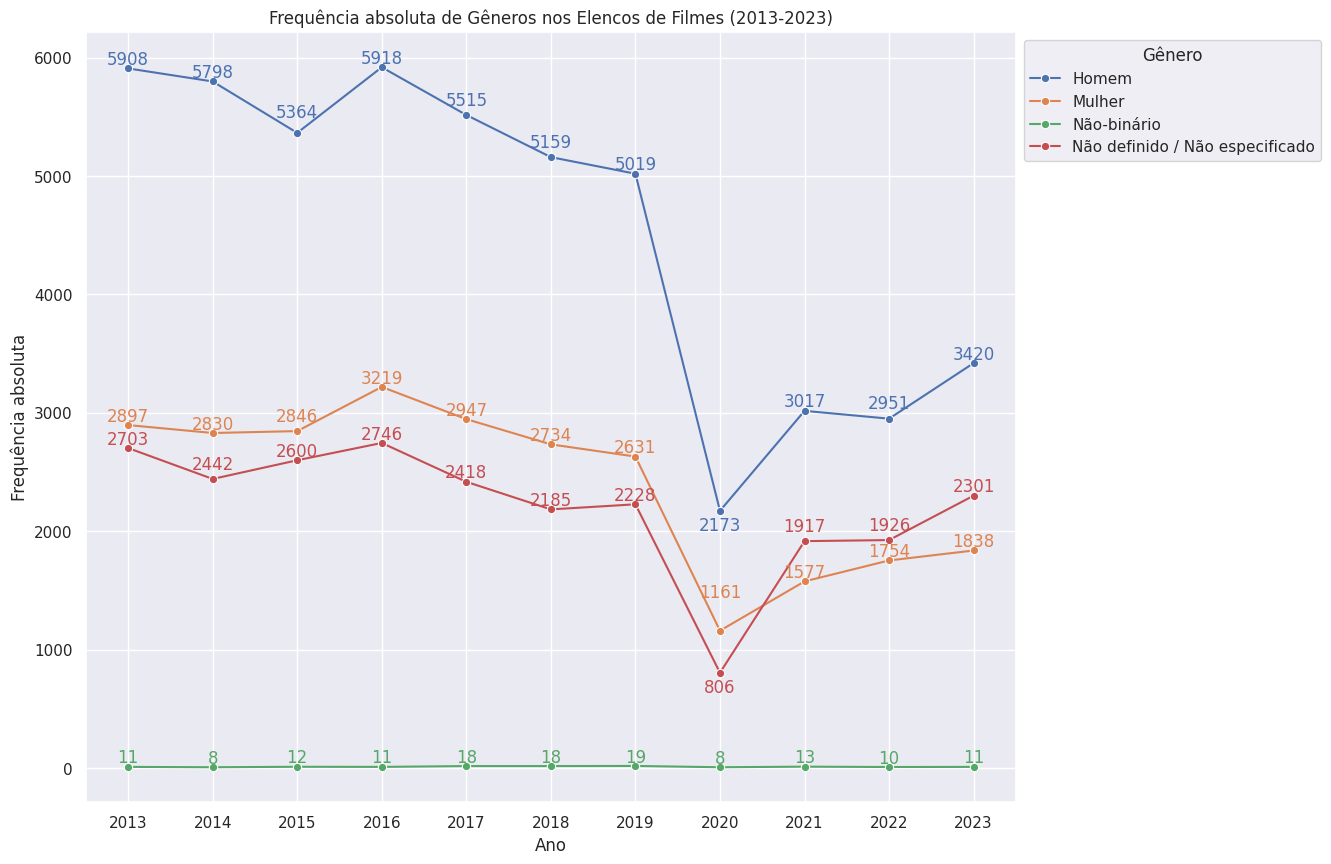

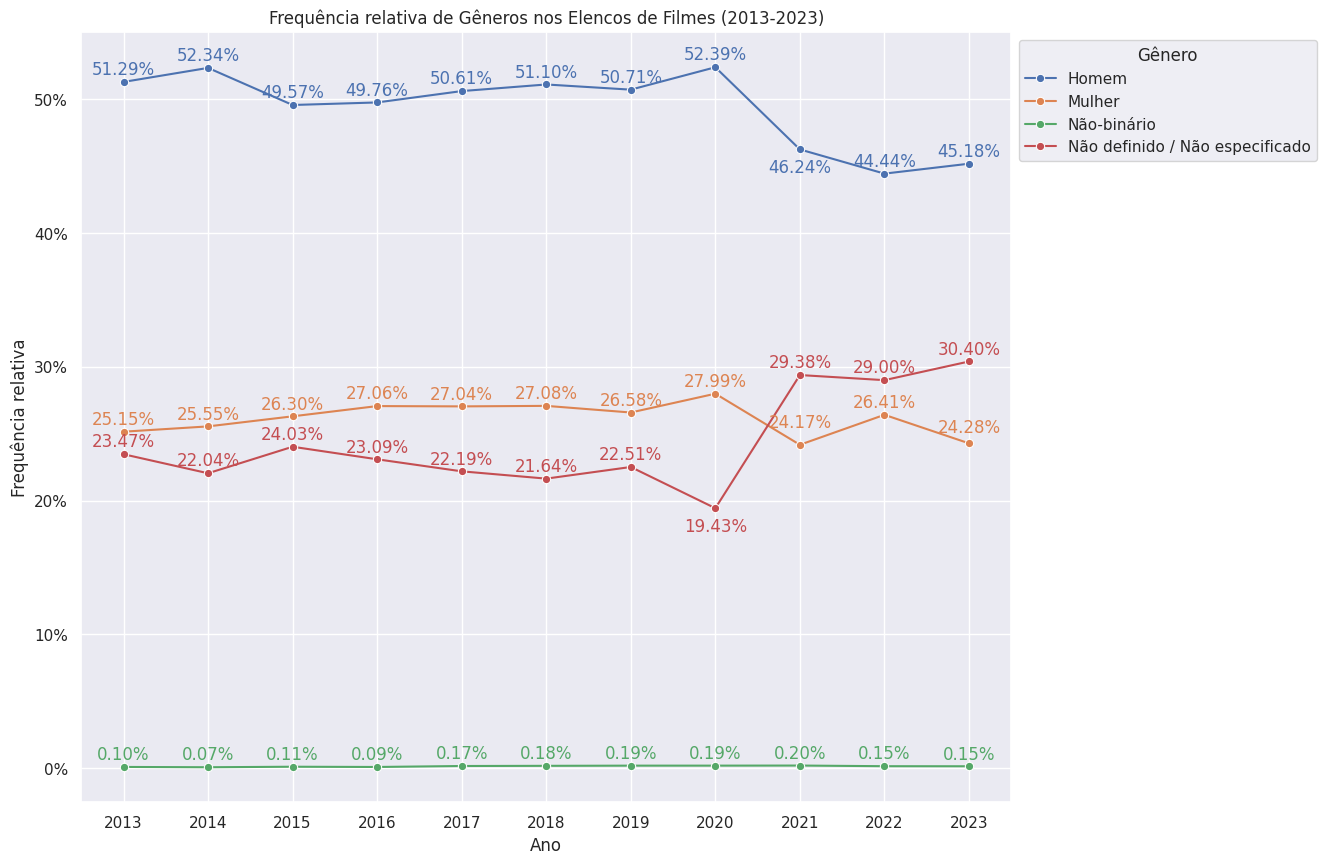

In [95]:
from matplotlib.ticker import FuncFormatter

hue_order_gender = ["Homem", "Mulher", "Não-binário", "Não definido / Não especificado"]

pos_format = {
    5364: 100,
    5515: 50,
    5159: 50,
    2173: -200,
    2951: 50,
    2442: 50,
    806: -200,
    1926: 50,
    1917: 50,
    1161: 250,
    2846: 50,
}

plt.figure(figsize=(12, 10))
plot = sns.lineplot(data=gender_counts_per_year_cast, x='year', y='count', hue='gender', marker='o', hue_order=hue_order_gender)
plt.xticks(ticks=range(gender_counts_per_year_cast['year'].min(), gender_counts_per_year_cast['year'].max() + 1))
for line in plot.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        if (int(y_value) in pos_format):
            plot.text(x_value, y_value + pos_format[int(y_value)], f'{y_value:.0f}', color=line.get_color(), ha="center", va="bottom")
        else:
            plot.text(x_value, y_value, f'{y_value:.0f}', color=line.get_color(), ha="center", va="bottom")
        

plt.title('Frequência absoluta de Gêneros nos Elencos de Filmes (2013-2023)')
plt.xlabel('Ano')
plt.ylabel('Frequência absoluta')
plt.legend(title='Gênero')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

pos_format = {
    46.24: -2,
    24.17: 1,
    19.43: -2,
    24.28: 0.5
}

plt.figure(figsize=(12, 10))
plt.xticks(ticks=range(gender_counts_per_year_cast_merged['year'].min(), gender_counts_per_year_cast['year'].max() + 1))
plot = sns.lineplot(data=gender_counts_per_year_cast_merged, x='year', y='percentage', hue='gender', marker='o', legend="full", hue_order=hue_order_gender)

def percentage_formatter(x, pos):
    return f'{x:.0f}%'

for line in plot.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        if (float(f'{y_value:.2f}') in pos_format):
            plot.text(x_value, y_value + pos_format[float(f'{y_value:.2f}')], f'{y_value:.2f}%', color=line.get_color(), ha="center", va="bottom")
        else:
            plot.text(x_value, y_value + 0.25, f'{y_value:.2f}%', color=line.get_color(), ha="center", va="bottom")
        
plot.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.title('Frequência relativa de Gêneros nos Elencos de Filmes (2013-2023)')
plt.xlabel('Ano')
plt.ylabel('Frequência relativa')
plt.legend(title='Gênero')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Grau de importância dos gêneros no elenco

/tmp/ipykernel_7248/2686093575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['order'] = (


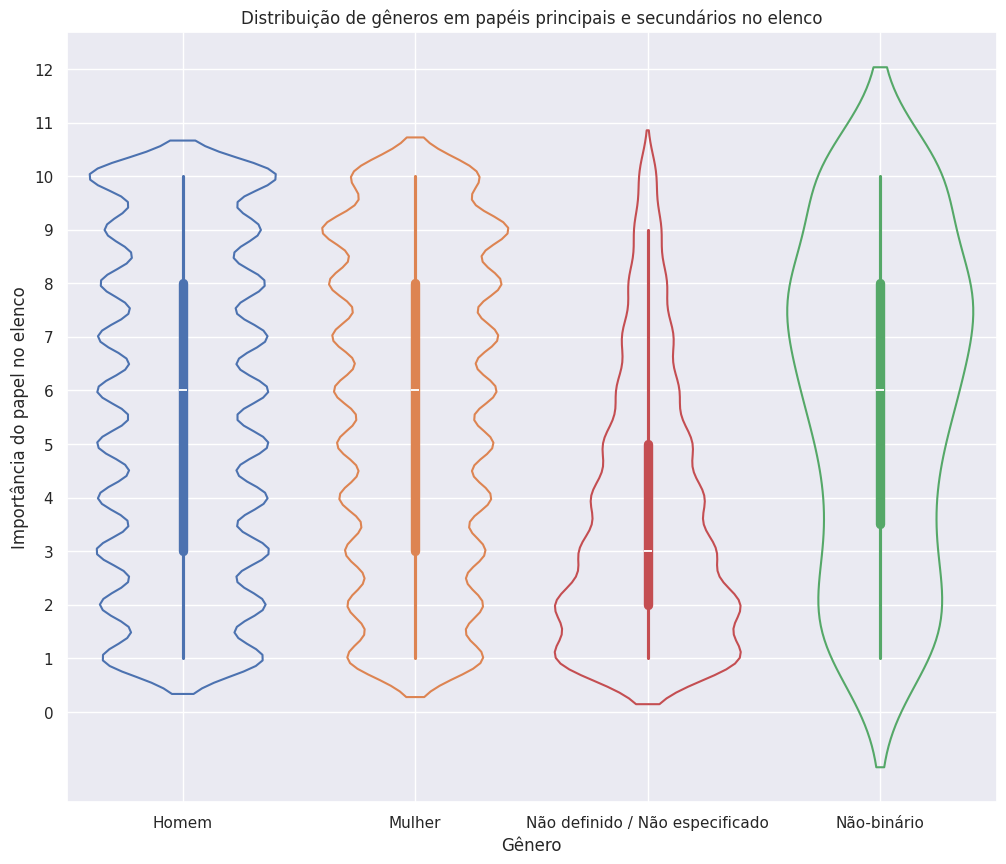

In [97]:
df_normalized_translated = df_normalized.copy()
df_normalized_translated['gender'] = df_normalized['gender'].apply(lambda x:gender_translation[x])
filtered_data  = df_normalized_translated[df_normalized_translated['order'] < 10]

filtered_data['order'] = (
    filtered_data.groupby('id')['order'].transform(lambda x: len(x) - x)
)

plt.figure(figsize=(12, 10))
sns.violinplot(data=filtered_data, x='gender', y='order', hue='gender', fill=False, hue_order=hue_order_gender, bw_adjust=.8)
plt.yticks(range(0, 13, 1))
plt.title('Distribuição de gêneros em papéis principais e secundários no elenco')
plt.xlabel('Gênero')
plt.ylabel('Importância do papel no elenco')
plt.grid(True, which='both', axis='both')

# stats = df_normalized.groupby('gender')['order'].describe()
# for gender in stats.index:
#     median = stats.loc[gender, '50%']
#     q1 = stats.loc[gender, '25%']
#     q3 = stats.loc[gender, '75%']
#     minimum = stats.loc[gender, 'min']
#     maximum = stats.loc[gender, 'max']
    
#     # Encontrar a posição no eixo x para anotar os valores
#     x_pos = df_normalized['gender'].unique().tolist().index(gender)
    
#     # Adicionar as anmotações ao gráfico
#     # plt.text(x_pos, median, f'Mediana: {median:.2f}', horizontalalignment='left', color='black')
#     plt.text(x_pos, q1, f'1Q: {q1:.2f}', horizontalalignment='left', color='blue')
#     plt.text(x_pos, q3, f'3Q: {q3:.2f}', horizontalalignment='left', color='blue')
#     plt.text(x_pos, minimum, f'Min: {minimum:.2f}', horizontalalignment='left', color='red')
#     plt.text(x_pos, maxium, f'Max: {maximum:.2f}', horizontalalignment='left', color='red')


plt.show()



# # Calculando a média da posição normalizada por filme e por gênero
# df_avg_normalized = (
#     df_normalized_translated.groupby(['id', 'gender'])['normalized_order']
#     .median()
#     .reset_index()
# )

# # Gráfico de Boxplot ou Violin Plot com a média da posição normalizada por gênero
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df_avg_normalized, x='gender', y='normalized_order', hue='gender', hue_order=hue_order_gender)
# plt.title('Importância Relativa dos Gêneros no Elenco de Filmes')
# plt.xlabel('Gênero')
# plt.ylabel('Posição Normalizada (Média por Filme)')
# plt.grid(True, which='both', axis='both')

# plt.ylim(0, 1)  # A posição normalizada varia entre 0 e 1
# plt.show()

# Ordem de importância por ano dos EUA e Brasil

/tmp/ipykernel_7248/2389659279.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized_translated_cleaned['gender'] = df_normalized_translated_cleaned['gender'].apply(lambda x:gender_translation[x])
/tmp/ipykernel_7248/2389659279.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized_translated_cleaned['role_category'] = df_normalized_translated_cleaned['order'].apply(lambda x: 'Principal' if x <= 4 else 'Secundário')


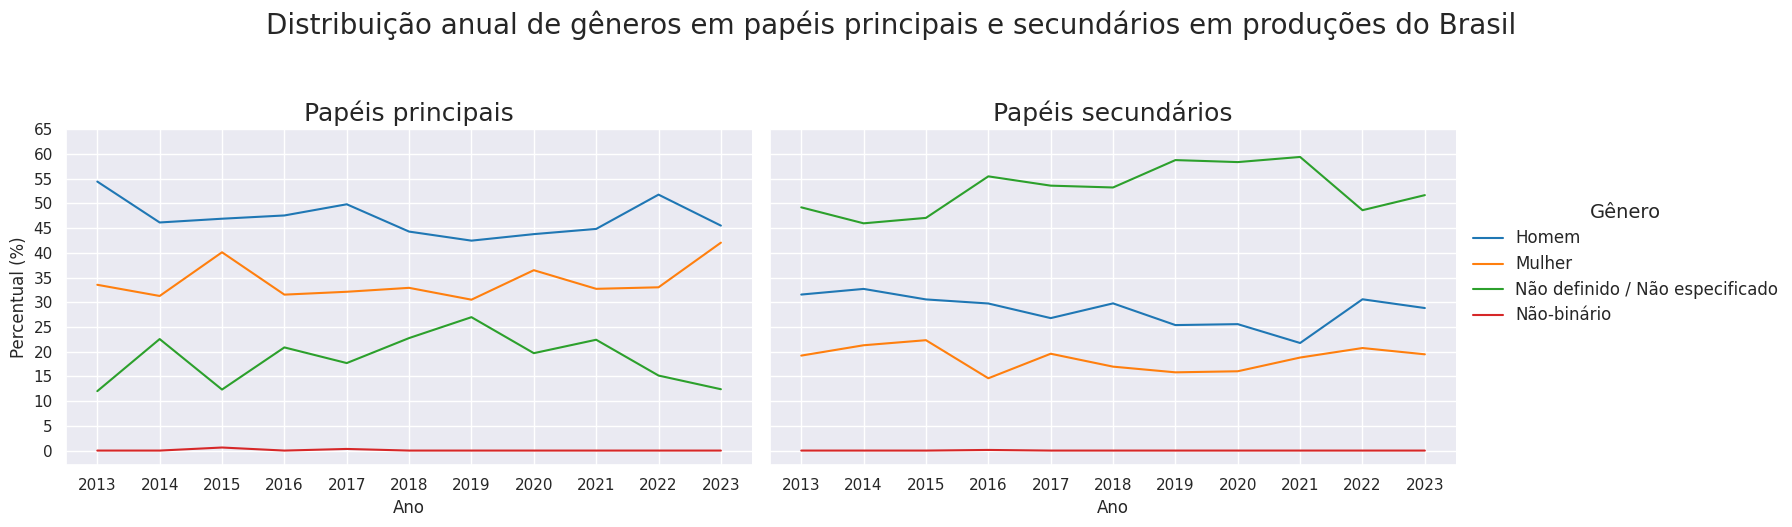

id original_language      original_title  \
295   362876                pt          Califórnia   
586   382455                pt       Mãe Só Há Uma   
1311  480941                pt  Alguma Coisa Assim   

                                               overview release_date  \
295   The year is 1984. Estela is going through the ...   2015-12-03   
586   Pierre is seventeen and in the middle of puber...   2016-07-20   
1311  Caio and Mari are two young people living in a...   2017-10-12   

                    title  vote_average  vote_count belongs_to_collection  \
295            Califórnia         7.244          43                   NaN   
586     Don't Call Me Son         6.500          69                   NaN   
1311  Something Like That         5.700          12                   NaN   

      budget  ...                                               crew  \
295      0.0  ...  [{'gender': 'Female', 'known_for_department': ...   
586      0.0  ...  [{'gender': 'Female', 'known_for_department': ...   
1311     0.0  ...  [{'gender': 'Not set/not specified', 'known_fo...   

                             keywords  year       gender  \
295   [coming of age, woman director]  2015  Não-binário   
586    [transvestism, woman director]  2016  Não-binário   
1311                               []  2017  Não-binário   

      known_for_department          name character order   0  role_category  
295                 Acting    Aren Gallo    Estela   0.0 NaN      Principal  
586                 Acting    Aren Gallo            12.0 NaN     Secundário  
1311                Acting  Jules Elting       Ida   4.0 NaN      Principal  

[3 rows x 27 columns]

In [ ]:
import itertools

df = br_movies_data_by_year['all']

df["cast"] = df["cast"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('cast')

df_normalized_br = pd.concat([df_exploded.drop(['cast'], axis=1), df_exploded['cast'].apply(pd.Series)], axis=1)

df_normalized_translated = df_normalized_br.copy()
df_normalized_translated_cleaned = df_normalized_translated.dropna(subset='gender')
df_normalized_translated_cleaned['gender'] = df_normalized_translated_cleaned['gender'].apply(lambda x:gender_translation[x])

df_normalized_translated_cleaned['role_category'] = df_normalized_translated_cleaned['order'].apply(lambda x: 'Principal' if x <= 4 else 'Secundário')

df_percentage = (
    df_normalized_translated_cleaned.groupby(['year', 'gender', 'role_category'])
    .size()
    .reset_index(name='count')
)

all_years = df_percentage['year'].unique()
all_genders = df_normalized_translated_cleaned['gender'].unique()
all_roles = df_percentage['role_category'].unique()

full_combinations = pd.DataFrame(itertools.product(all_years, all_genders, all_roles), columns=['year', 'gender', 'role_category'])

df_percentage = full_combinations.merge(df_percentage, on=['year', 'gender', 'role_category'], how='left').fillna({'count': 0})

df_percentage['total'] = df_percentage.groupby(['year', 'role_category'])['count'].transform('sum')
df_percentage['percentage'] = (df_percentage['count'] / df_percentage['total']) * 100

gender_order = sorted(df_normalized_translated_cleaned['gender'].unique())
palette = dict(zip(gender_order, sns.color_palette('tab10', n_colors=len(gender_order))))

role_titles = {"Principal": "Papéis principais", "Secundário": "Papéis secundários"}
df_percentage["role_title"] = df_percentage["role_category"].map(role_titles)

g = sns.FacetGrid(
    df_percentage,
    col="role_title",
    hue="gender",
    palette=palette,
    height=5,
    aspect=1.5
)
g.map(sns.lineplot, "year", "percentage").add_legend(title="Gênero")

for text in g._legend.get_texts():
    text.set_fontsize(12)

plt.xticks(range(start_year, end_year + 1, 1))
plt.yticks(range(0, 66, 5))

g._legend.get_title().set_fontsize(14)
g.set_titles("{col_name}", size=18)
g.set_axis_labels("Ano", "Percentual (%)")
g.fig.suptitle("Distribuição anual de gêneros em papéis principais e secundários em produções do Brasil", fontsize=20, y=1.05)

g.tight_layout()

plt.show()

df_normalized_translated_cleaned[df_normalized_translated_cleaned['gender'] == "Não-binário"]

/tmp/ipykernel_7248/3957351872.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized_translated_cleaned['gender'] = df_normalized_translated_cleaned['gender'].apply(lambda x:gender_translation[x])
/tmp/ipykernel_7248/3957351872.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized_translated_cleaned['role_category'] = df_normalized_translated_cleaned['order'].apply(lambda x: 'Principal' if x <= 4 else 'Secundário')


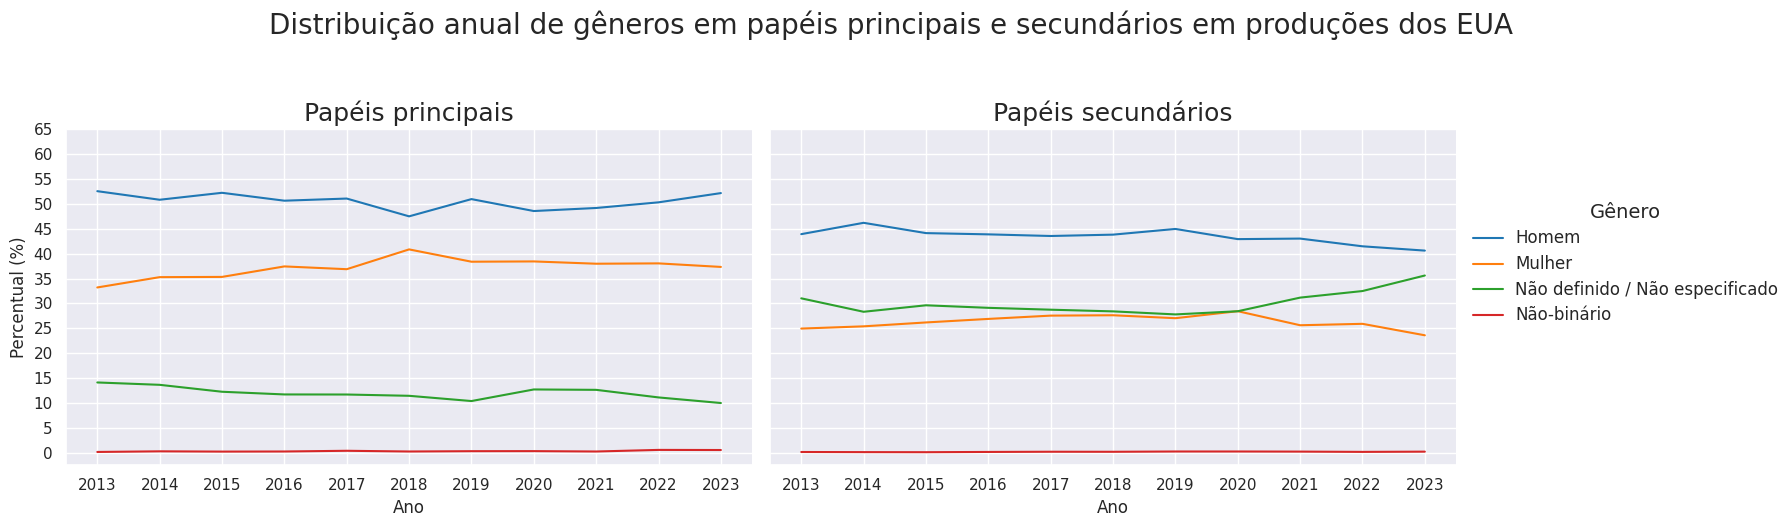

id original_language                                 original_title  \
17    284019                en               Phineas and Ferb: Mission Marvel   
20    207871                en                                       Savannah   
61    300090                en                                   White Rabbit   
89    111479                en                                           CBGB   
160   229408                en                       Minions: Training Wheels   
..       ...               ...                                            ...   
492   682286                en                                       Daughter   
549  1005575                en                   WWE WrestleMania 39 Saturday   
564  1100287                en                       Making of The Last of Us   
634   929230                en  Onyx the Fortuitous and the Talisman of Souls   
641  1112125                en               Hannah Gadsby: Something Special   

                                              overview release_date  \
17   Phineas and Ferb team up with the Avengers to ...   2013-08-16   
20   Savannah is the true story of Ward Allen, a ro...   2013-04-25   
61   A bullied student sees visions of a rabbit he ...   2013-09-20   
89   A look at New York's dynamic punk rock scene t...   2013-10-11   
160  Margo, Edith, and Agnes spot an ice cream truc...   2013-12-10   
..                                                 ...          ...   
492  A young woman is kidnapped and inducted into a...   2023-02-10   
549  WrestleMania goes Hollywood as WWE Superstars ...   2023-04-01   
564  Featuring extensive interviews with the cast a...   2023-03-12   
634  Onyx joins a group of fellow occultists to att...   2023-10-19   
641  A panicky proposal. A novelty wedding cake. A ...   2023-05-09   

                                             title  vote_average  vote_count  \
17                Phineas and Ferb: Mission Marvel         6.500         162   
20                                        Savannah         6.300          27   
61                                    White Rabbit         6.000          42   
89                                            CBGB         6.352         159   
160                       Minions: Training Wheels         6.966         174   
..                                             ...           ...         ...   
492                                       Daughter         4.800          10   
549                   WWE WrestleMania 39 Saturday         7.700          25   
564                       Making of The Last of Us         6.600          18   
634  Onyx the Fortuitous and the Talisman of Souls         6.545          11   
641               Hannah Gadsby: Something Special         6.500          16   

                                 belongs_to_collection      budget  ...  \
17   {'id': 715146, 'name': 'Phineas and Ferb Colle...         0.0  ...   
20                                                 NaN   5000000.0  ...   
61                                                 NaN   2000000.0  ...   
89                                                 NaN   5000000.0  ...   
160                                                NaN         0.0  ...   
..                                                 ...         ...  ...   
492                                                NaN         0.0  ...   
549                                                NaN  10000000.0  ...   
564                                                NaN         0.0  ...   
634                                                NaN    610467.0  ...   
641                                                NaN         0.0  ...   

                                                  crew  \
17   [{'gender': 'Male', 'known_for_department': 'D...   
20   [{'gender': 'Female', 'known_for_department': ...   
61   [{'gender': 'Male', 'known_for_department': 'D...   
89   [{'gender': 'Female', 'known_for_department': ...   
160  [{'gender': 'Not set/not sp

In [104]:
df = eua_movies_data_by_year['all']

df["cast"] = df["cast"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('cast')

df_normalized_br = pd.concat([df_exploded.drop(['cast'], axis=1), df_exploded['cast'].apply(pd.Series)], axis=1)

df_normalized_translated = df_normalized_br.copy()
df_normalized_translated_cleaned = df_normalized_translated.dropna(subset='gender')
df_normalized_translated_cleaned['gender'] = df_normalized_translated_cleaned['gender'].apply(lambda x:gender_translation[x])

df_normalized_translated_cleaned['role_category'] = df_normalized_translated_cleaned['order'].apply(lambda x: 'Principal' if x <= 4 else 'Secundário')

df_percentage = (
    df_normalized_translated_cleaned.groupby(['year', 'gender', 'role_category'])
    .size()
    .reset_index(name='count')
)

df_percentage['total'] = df_percentage.groupby(['year', 'role_category'])['count'].transform('sum')
df_percentage['percentage'] = (df_percentage['count'] / df_percentage['total']) * 100

gender_order = sorted(df_normalized_translated_cleaned['gender'].unique())
palette = dict(zip(gender_order, sns.color_palette('tab10', n_colors=len(gender_order))))

role_titles = {"Principal": "Papéis principais", "Secundário": "Papéis secundários"}
df_percentage["role_title"] = df_percentage["role_category"].map(role_titles)

g = sns.FacetGrid(
    df_percentage,
    col="role_title",
    hue="gender",
    palette=palette,
    height=5,
    aspect=1.5
)
g.map(sns.lineplot, "year", "percentage").add_legend(title="Gênero")

for text in g._legend.get_texts():
    text.set_fontsize(12)

plt.xticks(range(start_year, end_year + 1, 1))
plt.yticks(range(0, 66, 5))

g._legend.get_title().set_fontsize(14)
g.set_titles("{col_name}", size=18)
g.set_axis_labels("Ano", "Percentual (%)")
g.fig.suptitle("Distribuição anual de gêneros em papéis principais e secundários em produções dos EUA", fontsize=20, y=1.05)

g.tight_layout()

plt.show()

df_normalized_translated_cleaned[df_normalized_translated_cleaned['gender'] == "Não-binário"]

In [108]:
df_normalized_translated_cleaned[df_normalized_translated_cleaned['gender'] == "Não-binário"].groupby('year').count()

id  original_language  original_title  overview  release_date  title  \
year                                                                         
2013  20                 20              20        20            20     20   
2014  22                 22              22        22            22     22   
2015  18                 18              18        18            18     18   
2016  27                 27              27        27            27     27   
2017  40                 40              40        40            40     40   
2018  31                 31              31        31            31     31   
2019  43                 43              43        43            43     43   
2020  34                 34              34        34            34     34   
2021  28                 28              28        28            28     28   
2022  30                 30              30        30            30     30   
2023  30                 30              30        30            30     30   

      vote_average  vote_count  belongs_to_collection  budget  ...  tagline  \
year                                                           ...            
2013            20          20                      4      20  ...       14   
2014            22          22                      5      22  ...       16   
2015            18          18                      2      18  ...       13   
2016            27          27                      5      27  ...       17   
2017            40          40                      1      40  ...       29   
2018            31          31                      2      31  ...       27   
2019            43          43                      5      43  ...       31   
2020            34          34                      2      34  ...       19   
2021            28          28                      6      28  ...       22   
2022            30          30                      4      30  ...       22   
2023            30          30                      7      30  ...       22   

      crew  keywords  gender  known_for_department  name  character  order  0  \
year                                                                            
2013    20        20      20                    20    20         20     20  0   
2014    22        22      22                    22    22         22     22  0   
2015    18        18      18                    18    18         18     18  0   
2016    27        27      27                    27    27         27     27  0   
2017    40        40      40                    40    40         40     40  0   
2018    31        31      31                    31    31         31     31  0   
2019    43        43      43                    43    43         43     43  0   
2020    34        34      34                    34    34         34     34  0   
2021    28        28      28                    28    28         28     28  0   
2022    30        30      30                    30    30         30     30  0   
2023    30        30      30                    30    30         30     30  0   

      role_category  
year                 
2013             20  
2014             22  
2015             18  
2016             27  
2017             40  
2018             31  
2019             43  
2020             34  
2021             28  
2022             30  
2023             30  

[11 rows x 26 columns]

/tmp/ipykernel_1560/963969623.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gênero')


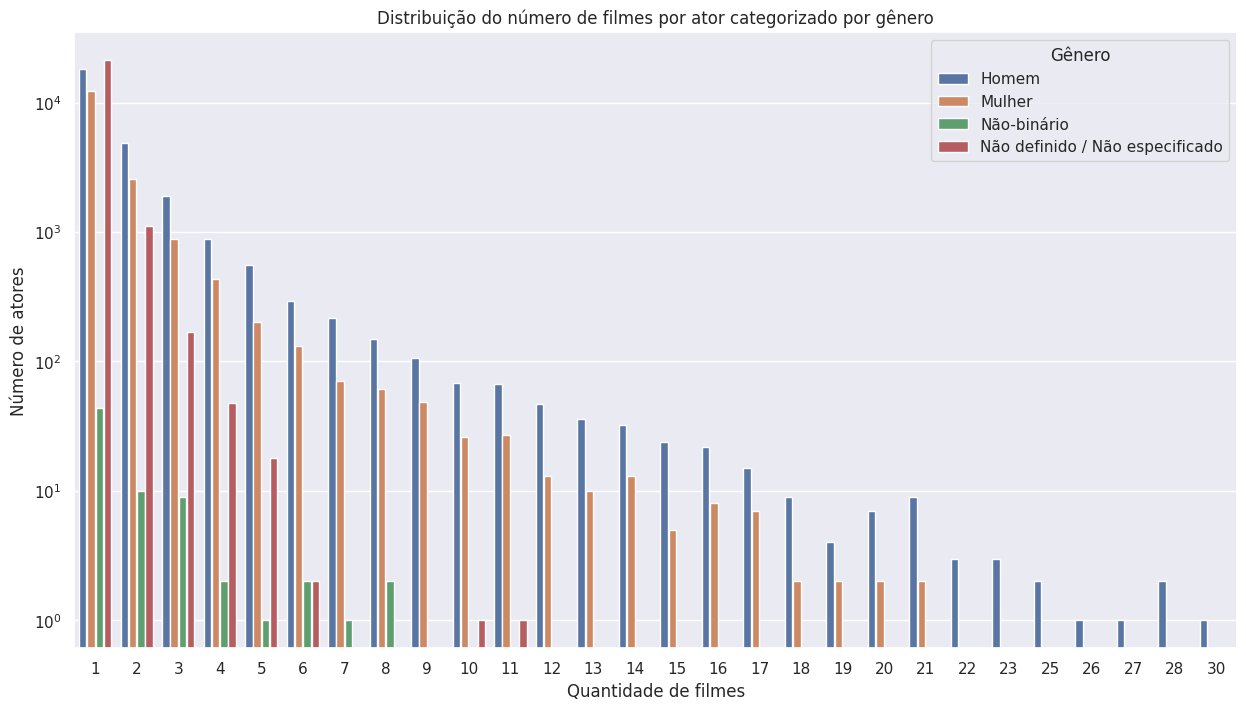

In [199]:
df_normalized_translated = df_normalized.copy()
df_normalized_translated['gender'] = df_normalized_translated['gender'].apply(lambda x:gender_translation[x])
plt.figure(figsize=(15, 8))
plt.title('Distribuição do número de filmes por ator categorizado por gênero')
plt.xlabel('Quantidade de filmes')
plt.ylabel('Número de atores')
plt.yscale('log')
plt.legend(title='Gênero')

top_names = df_normalized_translated[["gender", "name"]].value_counts().reset_index(name='movies_amount')
movies_count = top_names[['movies_amount', 'gender']].value_counts().reset_index()
movies_count
movies_count.columns = ['movies_amount', 'gender', 'num_actors']
plt.yscale('log')
ax = sns.barplot(x='movies_amount', y='num_actors', data=movies_count, hue="gender", gap= 0.1, hue_order=hue_order_gender)
ax.get_legend().set_title("Gênero")
plt.show()

Análise Gênero da produção

In [111]:
gender_translation = {
    "Not set/not specified": "Não definido / Não especificado",
    "Female": "Mulher",
    "Male": "Homem",
    "Non-binary": "Não-binário"
}

df = movies_data_by_year['all']

df["crew"] = df["crew"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('crew')

# separa cada key do objeto em uma coluna
df_normalized = pd.concat([df_exploded.drop(['crew'], axis=1), df_exploded['crew'].apply(pd.Series)], axis=1)

gender_counts_per_year_crew = df_normalized.groupby(['year', 'gender']).size().reset_index(name='count')
gender_counts_per_year_crew = gender_counts_per_year_crew.sort_values(by=['year', 'gender'])

gender_counts_per_year_crew['gender'] = gender_counts_per_year_crew['gender'].apply(lambda x:gender_translation[x])


total_counts_per_year = df_normalized.groupby('year').size().reset_index(name='total_count')


gender_counts_per_year_crew_merged = gender_counts_per_year_crew.merge(total_counts_per_year, on='year')
gender_counts_per_year_crew_merged['percentage'] = (gender_counts_per_year_crew_merged['count'] / gender_counts_per_year_crew_merged['total_count']) * 100
gender_counts_per_year_crew_merged = gender_counts_per_year_crew_merged.sort_values(by=['year', 'gender'])

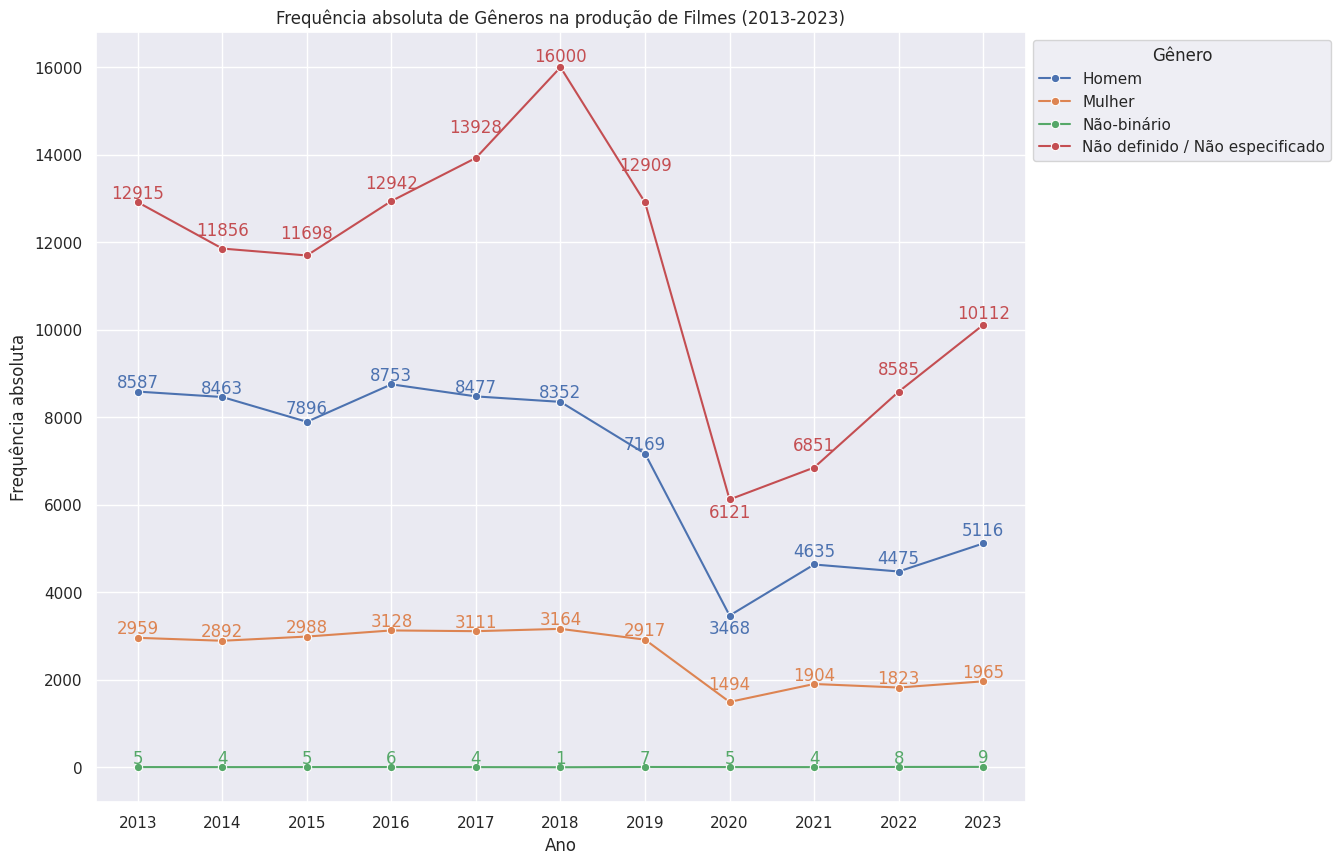

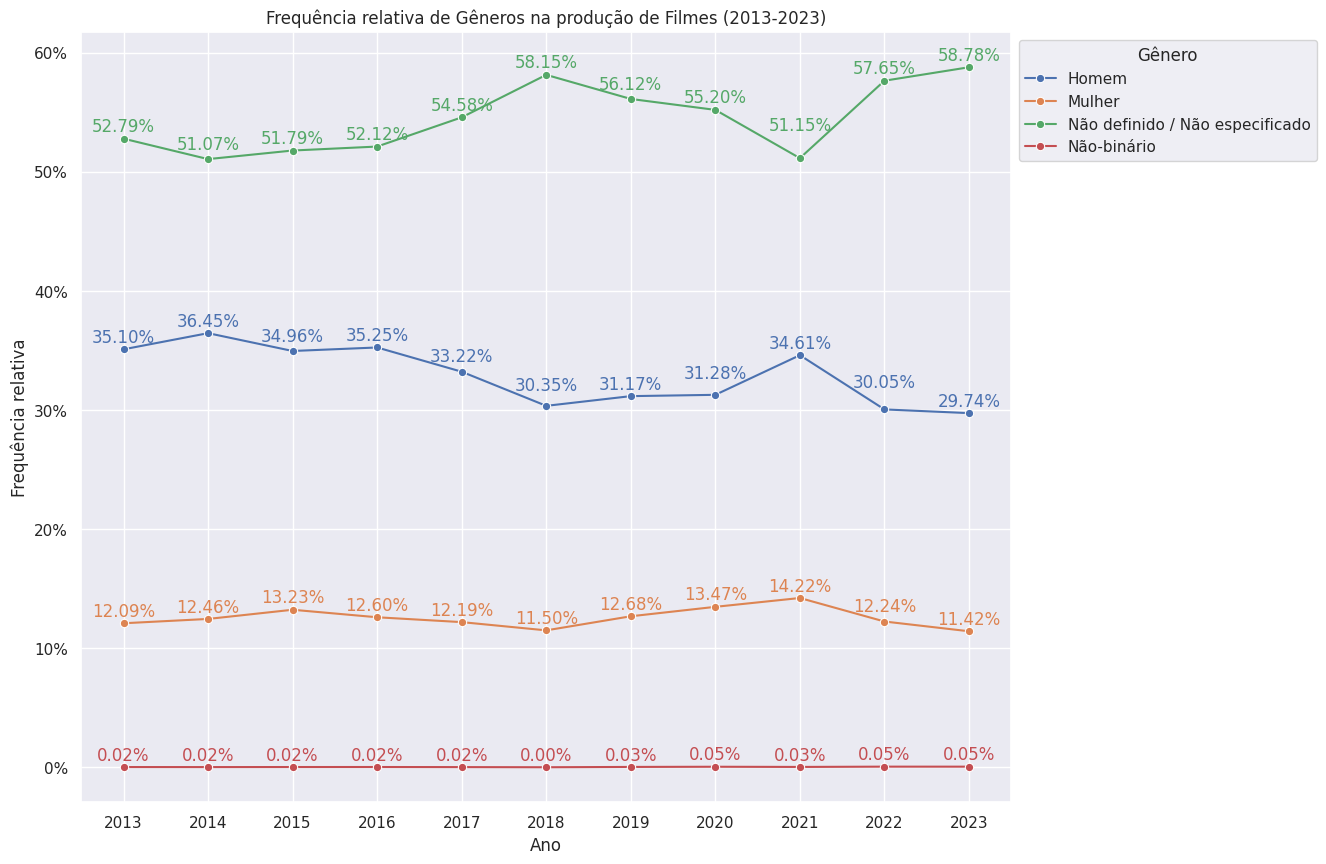

In [112]:
from matplotlib.ticker import FuncFormatter

pos_format = {
    11856: 200,
    11698: 300,
    12942: 200,
    13928: 500,
    16000: 50,
    12909: 650,
    6121: -500,
    6851: 300,
    8585: 300,
    10112: 50,
    7896: 100,
    3468: -500,
    4475: 100,
    4635: 100,
    5116: 100,
    1494: 200
}

plt.figure(figsize=(12, 10))
plot = sns.lineplot(data=gender_counts_per_year_crew, x='year', y='count', hue='gender', marker='o', hue_order=hue_order_gender)
plt.xticks(ticks=range(gender_counts_per_year_crew['year'].min(), gender_counts_per_year_crew['year'].max() + 1))
for line in plot.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        if (int(y_value) in pos_format):
            plot.text(x_value, y_value + pos_format[int(y_value)], f'{y_value:.0f}', color=line.get_color(), ha="center", va="bottom")
        else:
            plot.text(x_value, y_value, f'{y_value:.0f}', color=line.get_color(), ha="center", va="bottom")
        

plt.title('Frequência absoluta de Gêneros na produção de Filmes (2013-2023)')
plt.xlabel('Ano')
plt.ylabel('Frequência absoluta')
plt.legend(title='Gênero')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

pos_format = {
    51.07: 0.5,
    51.15: 2,
    34.96: 0.5,
    30.35: 1,
    56.12: 0.5,
    30.05: 1.5,
    33.22: 0.5,
    31.28: 1,
    12.24: 0.5
}

plt.figure(figsize=(12, 10))
plt.xticks(ticks=range(gender_counts_per_year_crew_merged['year'].min(), gender_counts_per_year_crew['year'].max() + 1))
plot = sns.lineplot(data=gender_counts_per_year_crew_merged, x='year', y='percentage', hue='gender', marker='o', legend="full")

def percentage_formatter(x, pos):
    return f'{x:.0f}%'

for line in plot.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        if (float(f'{y_value:.2f}') in pos_format):
            plot.text(x_value, y_value + pos_format[float(f'{y_value:.2f}')], f'{y_value:.2f}%', color=line.get_color(), ha="center", va="bottom")
        else:
            plot.text(x_value, y_value + 0.25, f'{y_value:.2f}%', color=line.get_color(), ha="center", va="bottom")
        
plot.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.title('Frequência relativa de Gêneros na produção de Filmes (2013-2023)')
plt.xlabel('Ano')
plt.ylabel('Frequência relativa')
plt.legend(title='Gênero')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipykernel_7248/312217217.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["job"] = filtered["job"].apply(lambda x: jobs_translation[x] if x in jobs_translation else x)


[]

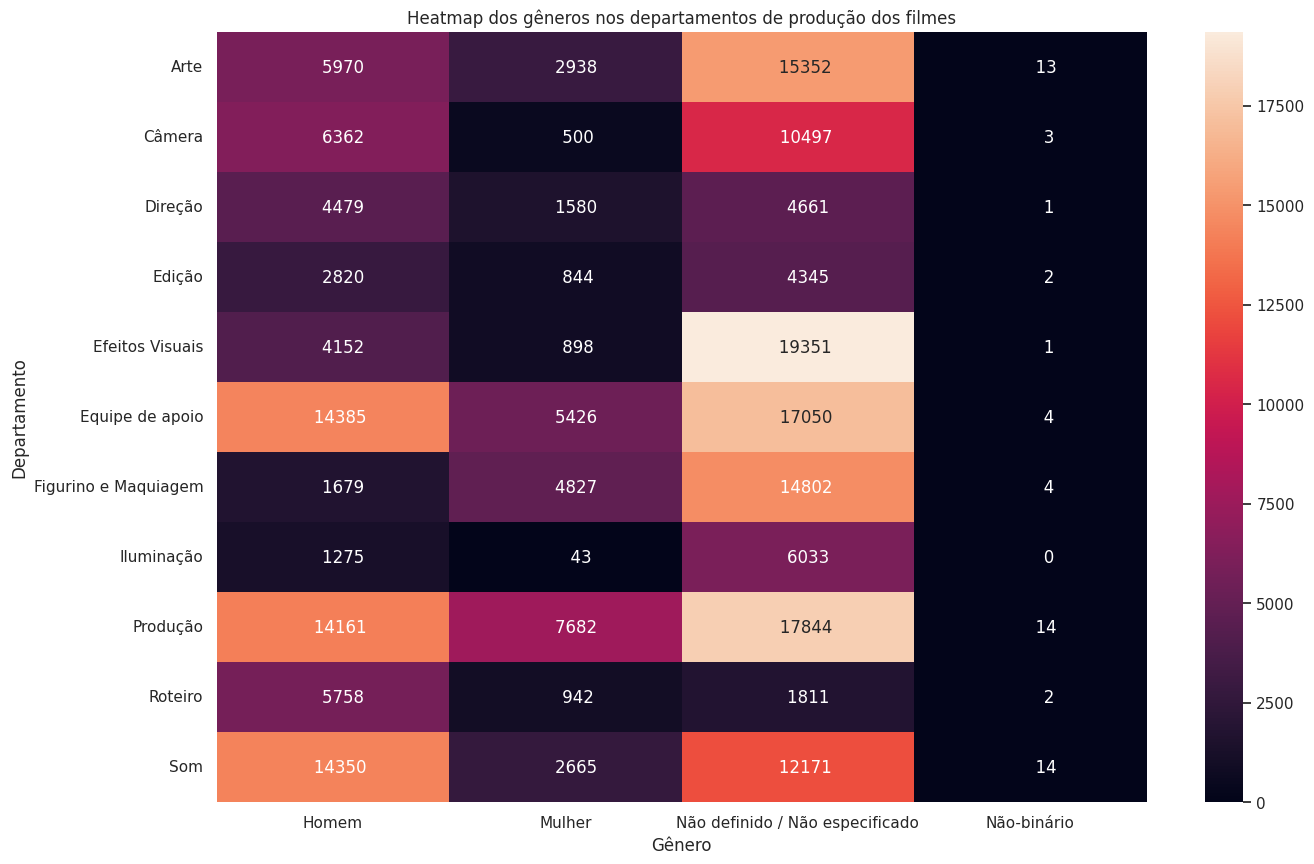

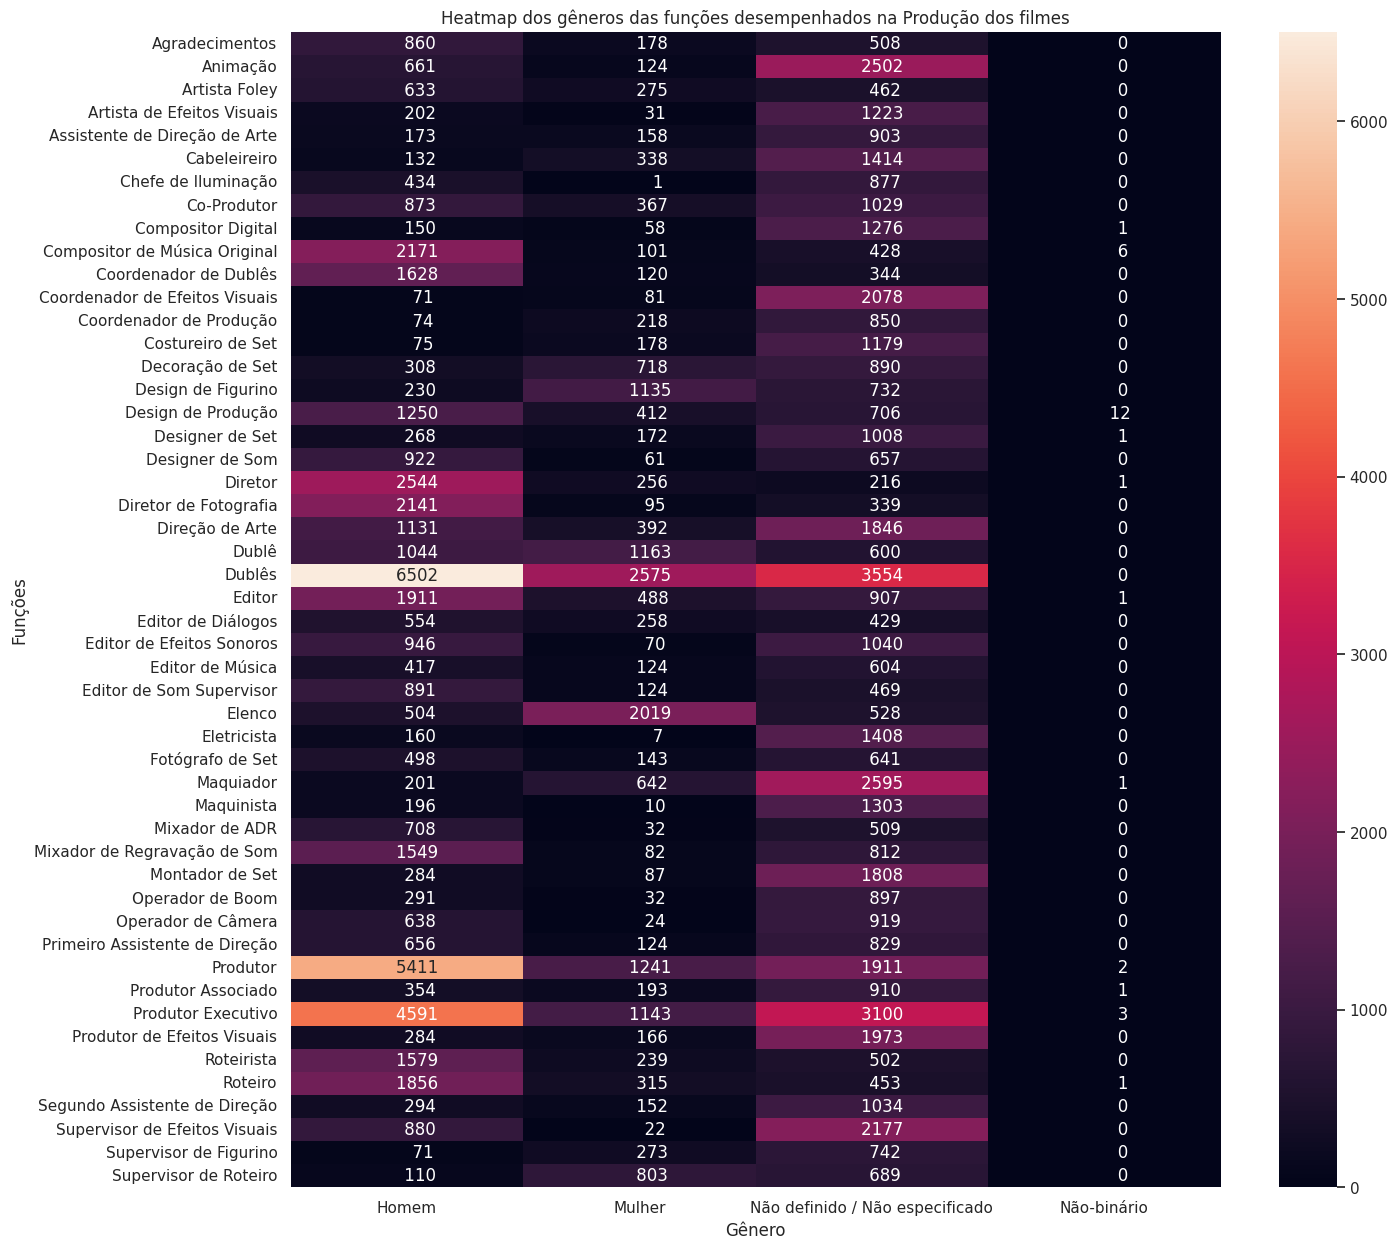

In [113]:
departments_translation = {
    "Art": "Arte",
    "Camera": "Câmera",
    "Costume & Make-Up": "Figurino e Maquiagem",
    "Crew": "Equipe de apoio",
    "Directing": "Direção",
    "Editing": "Edição",
    "Lighting": "Iluminação",
    "Production": "Produção",
    "Sound": "Som",
    "Visual Effects": "Efeitos Visuais",
    "Writing": "Roteiro"
}

jobs_translation = {
    "ADR Mixer": "Mixador de ADR",
    "Animation": "Animação",
    "Art Direction": "Direção de Arte",
    "Assistant Art Director": "Assistente de Direção de Arte",
    "Associate Producer": "Produtor Associado",
    "Boom Operator": "Operador de Boom",
    "Camera Operator": "Operador de Câmera",
    "Casting": "Elenco",
    "Co-Producer": "Co-Produtor",
    "Costume Design": "Design de Figurino",
    "Costume Supervisor": "Supervisor de Figurino",
    "Dialogue Editor": "Editor de Diálogos",
    "Digital Compositor": "Compositor Digital",
    "Director": "Diretor",
    "Director of Photography": "Diretor de Fotografia",
    "Editor": "Editor",
    "Electrician": "Eletricista",
    "Executive Producer": "Produtor Executivo",
    "First Assistant Director": "Primeiro Assistente de Direção",
    "Foley Artist": "Artista Foley",
    "Gaffer": "Chefe de Iluminação",
    "Grip": "Maquinista",
    "Hairstylist": "Cabeleireiro",
    "Makeup Artist": "Maquiador",
    "Music Editor": "Editor de Música",
    "Original Music Composer": "Compositor de Música Original",
    "Producer": "Produtor",
    "Production Coordinator": "Coordenador de Produção",
    "Production Design": "Design de Produção",
    "Screenplay": "Roteiro",
    "Script Supervisor": "Supervisor de Roteiro",
    "Second Assistant Director": "Segundo Assistente de Direção",
    "Set Costumer": "Costureiro de Set",
    "Set Decoration": "Decoração de Set",
    "Set Designer": "Designer de Set",
    "Set Dresser": "Montador de Set",
    "Sound Designer": "Designer de Som",
    "Sound Effects Editor": "Editor de Efeitos Sonoros",
    "Sound Re-Recording Mixer": "Mixador de Regravação de Som",
    "Still Photographer": "Fotógrafo de Set",
    "Stunt Coordinator": "Coordenador de Dublês",
    "Stunt Double": "Dublê",
    "Stunts": "Dublês",
    "Supervising Sound Editor": "Editor de Som Supervisor",
    "Thanks": "Agradecimentos",
    "VFX Artist": "Artista de Efeitos Visuais",
    "Visual Effects Coordinator": "Coordenador de Efeitos Visuais",
    "Visual Effects Producer": "Produtor de Efeitos Visuais",
    "Visual Effects Supervisor": "Supervisor de Efeitos Visuais",
    "Writer": "Roteirista"
}

df_normalized_translated = df_normalized.copy()
df_normalized_translated['gender'] = df_normalized['gender'].apply(lambda x:gender_translation[x])

df = df_normalized_translated.copy()

df['department'] = df['department'].apply(lambda x: departments_translation[x] if x in departments_translation else x)

plt.figure(figsize=(15, 10))
sns.heatmap(df.pivot_table(index="department", columns="gender", aggfunc='size', fill_value=0), annot=True, fmt="8.0f")

plt.title('Heatmap dos gêneros nos departamentos de produção dos filmes')
plt.xlabel('Gênero')
plt.ylabel('Departamento')

plt.plot()

value_counts = df["job"].value_counts()


# plt.figure(figsize=(12, 10))
# sns.heatmap(df_normalized_translated.pivot_table(index="job", columns="gender", aggfunc='size', fill_value=0), annot=True, fmt="8.0f")
# plt.plot()

values_to_keep = value_counts.head(50).index

filtered = df_normalized_translated[df_normalized_translated["job"].isin(values_to_keep)]

filtered["job"] = filtered["job"].apply(lambda x: jobs_translation[x] if x in jobs_translation else x)

plt.figure(figsize=(15, 15))
sns.heatmap(filtered.pivot_table(index="job", columns="gender", aggfunc='size', fill_value=0), annot=True, fmt="8.0f")

plt.title('Heatmap dos gêneros das funções desempenhados na Produção dos filmes')
plt.xlabel('Gênero')
plt.ylabel('Funções')

plt.plot()



Genero por departamento ao longo dos anos

<Figure size 1200x1200 with 0 Axes>

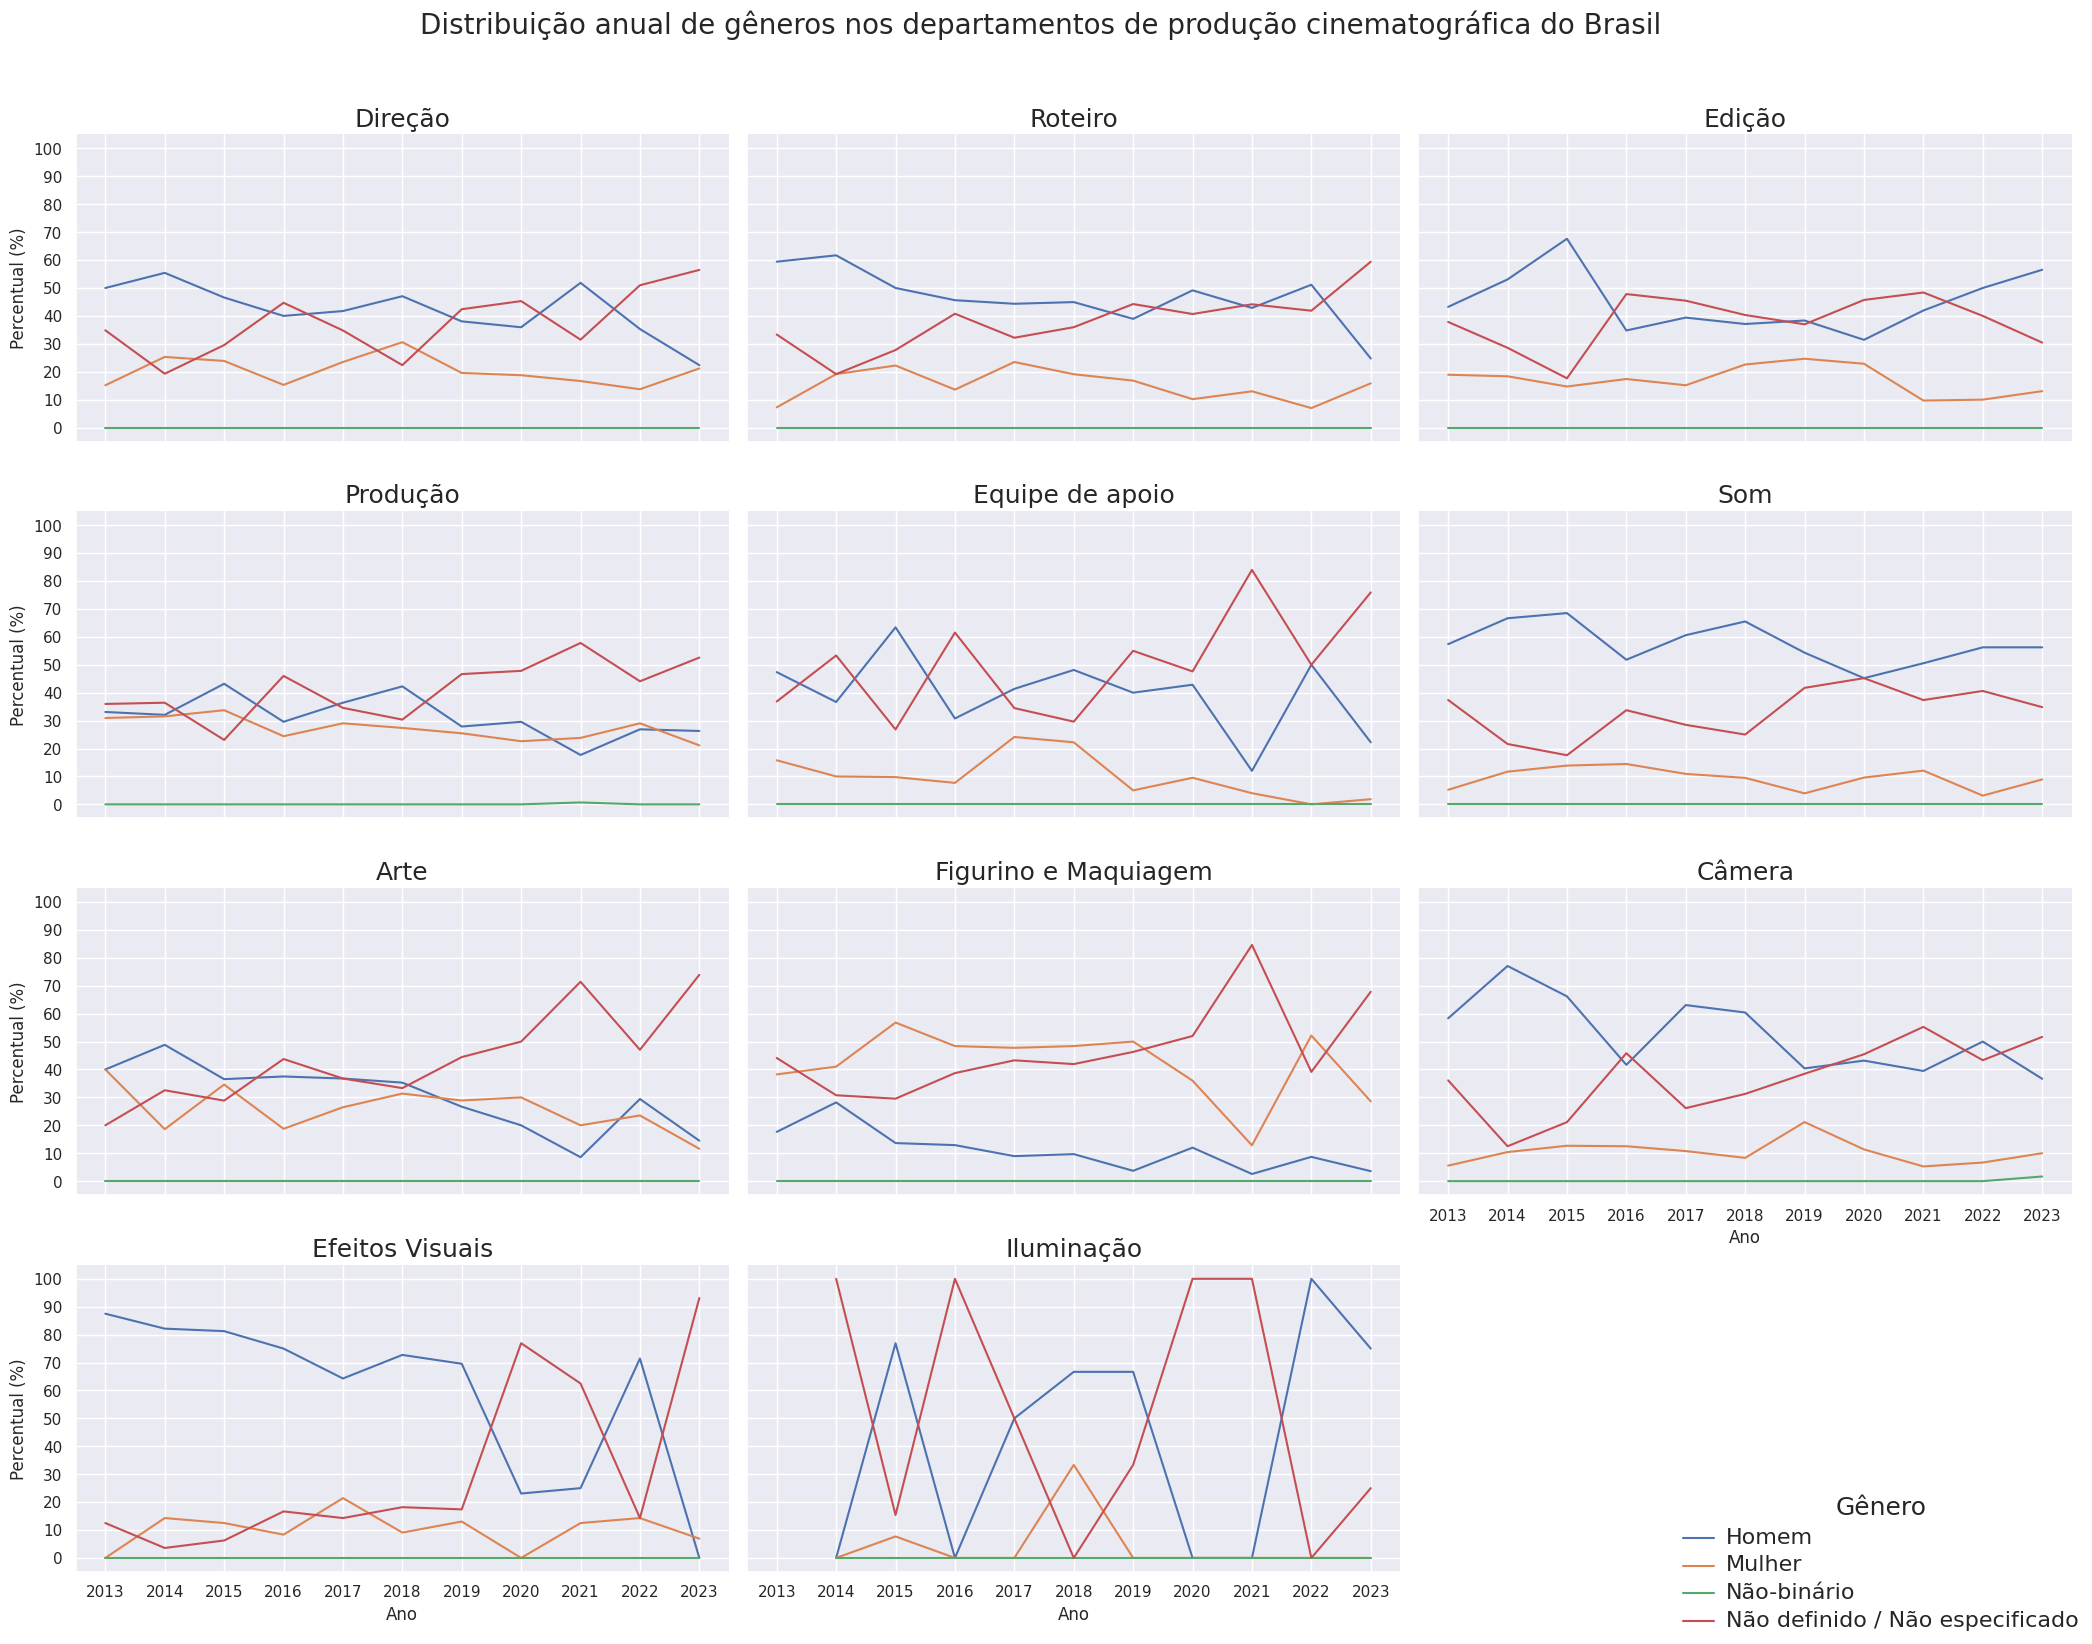

In [117]:
df_br = br_movies_data_by_year['all']

df_br["crew"] = df_br["crew"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_br_exploded = df_br.explode('crew')

# separa cada key do objeto em uma coluna
df_br_normalized = pd.concat([df_br_exploded.drop(['crew'], axis=1), df_br_exploded['crew'].apply(pd.Series)], axis=1)


df_br_normalized_translated = df_br_normalized.copy()

df_br_normalized_translated['gender'] = df_br_normalized_translated['gender'].apply(lambda x:gender_translation[x])
df_br_normalized_translated['department'] = df_br_normalized_translated['department'].apply(lambda x: departments_translation[x] if x in departments_translation else x)

all_years = df_br_normalized_translated['year'].unique()
all_departments = df_br_normalized_translated['department'].unique()
all_genders = df_br_normalized_translated['gender'].unique()

full_combinations = pd.DataFrame(itertools.product(all_years, all_departments, all_genders), columns=['year', 'department', 'gender'])

df_counts = df_br_normalized_translated.groupby(['year', 'department', 'gender']).size().reset_index(name='count')
df_counts = full_combinations.merge(df_counts, on=['year', 'department', 'gender'], how='left').fillna({'count': 0})

df_counts['total'] = df_counts.groupby(['year', 'department'])['count'].transform('sum')
df_counts['percentage'] = (df_counts['count'] / df_counts['total']) * 100

plt.figure(figsize=(12, 12))
# Criando o FacetGrid
g = sns.FacetGrid(
    df_counts, 
    col="department", 
    hue="gender",
    hue_order=hue_order_gender,
    col_wrap=3,
    height=4, 
    aspect=1.5
)

# Adicionando gráficos de linha
g.map(sns.lineplot, "year", "percentage")

for ax in g.axes.flatten():
    ax.set_xticks(sorted(df['year'].unique()))
    ax.set_yticks(range(0, 101, 10))
    ax.set_xlabel("Ano")

# Ajustando a legenda e os rótulos
g.add_legend(title="Gênero")
g._legend.set_loc("lower right")

g._legend.get_title().set_fontsize(18)

for text in g._legend.get_texts():
    text.set_fontsize(16)
    # text.set_fontfamily('serif')
    
g.fig.suptitle(
    "Distribuição anual de gêneros nos departamentos de produção cinematográfica do Brasil",
    fontsize=20,  # Tamanho da fonte do título
    # fontweight='bold',  # Estilo da fonte
    y=1.02  # Ajusta a posição vertical do título
)


g.set_axis_labels("Ano", "Percentual (%)")
g.set_titles("{col_name}", size=18)  # Nome de cada departamento no título do subplot
plt.tight_layout()

# Exibindo o gráfico
plt.show()

/tmp/ipykernel_7248/3749261142.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized_translated_cleaned['gender'] = df_normalized_translated_cleaned['gender'].apply(lambda x:gender_translation[x])
/tmp/ipykernel_7248/3749261142.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized_translated_cleaned['department'] = df_normalized_translated_cleaned['department'].apply(lambda x: departments_translation[x] if x in departments_translation else x)


<Figure size 1200x1200 with 0 Axes>

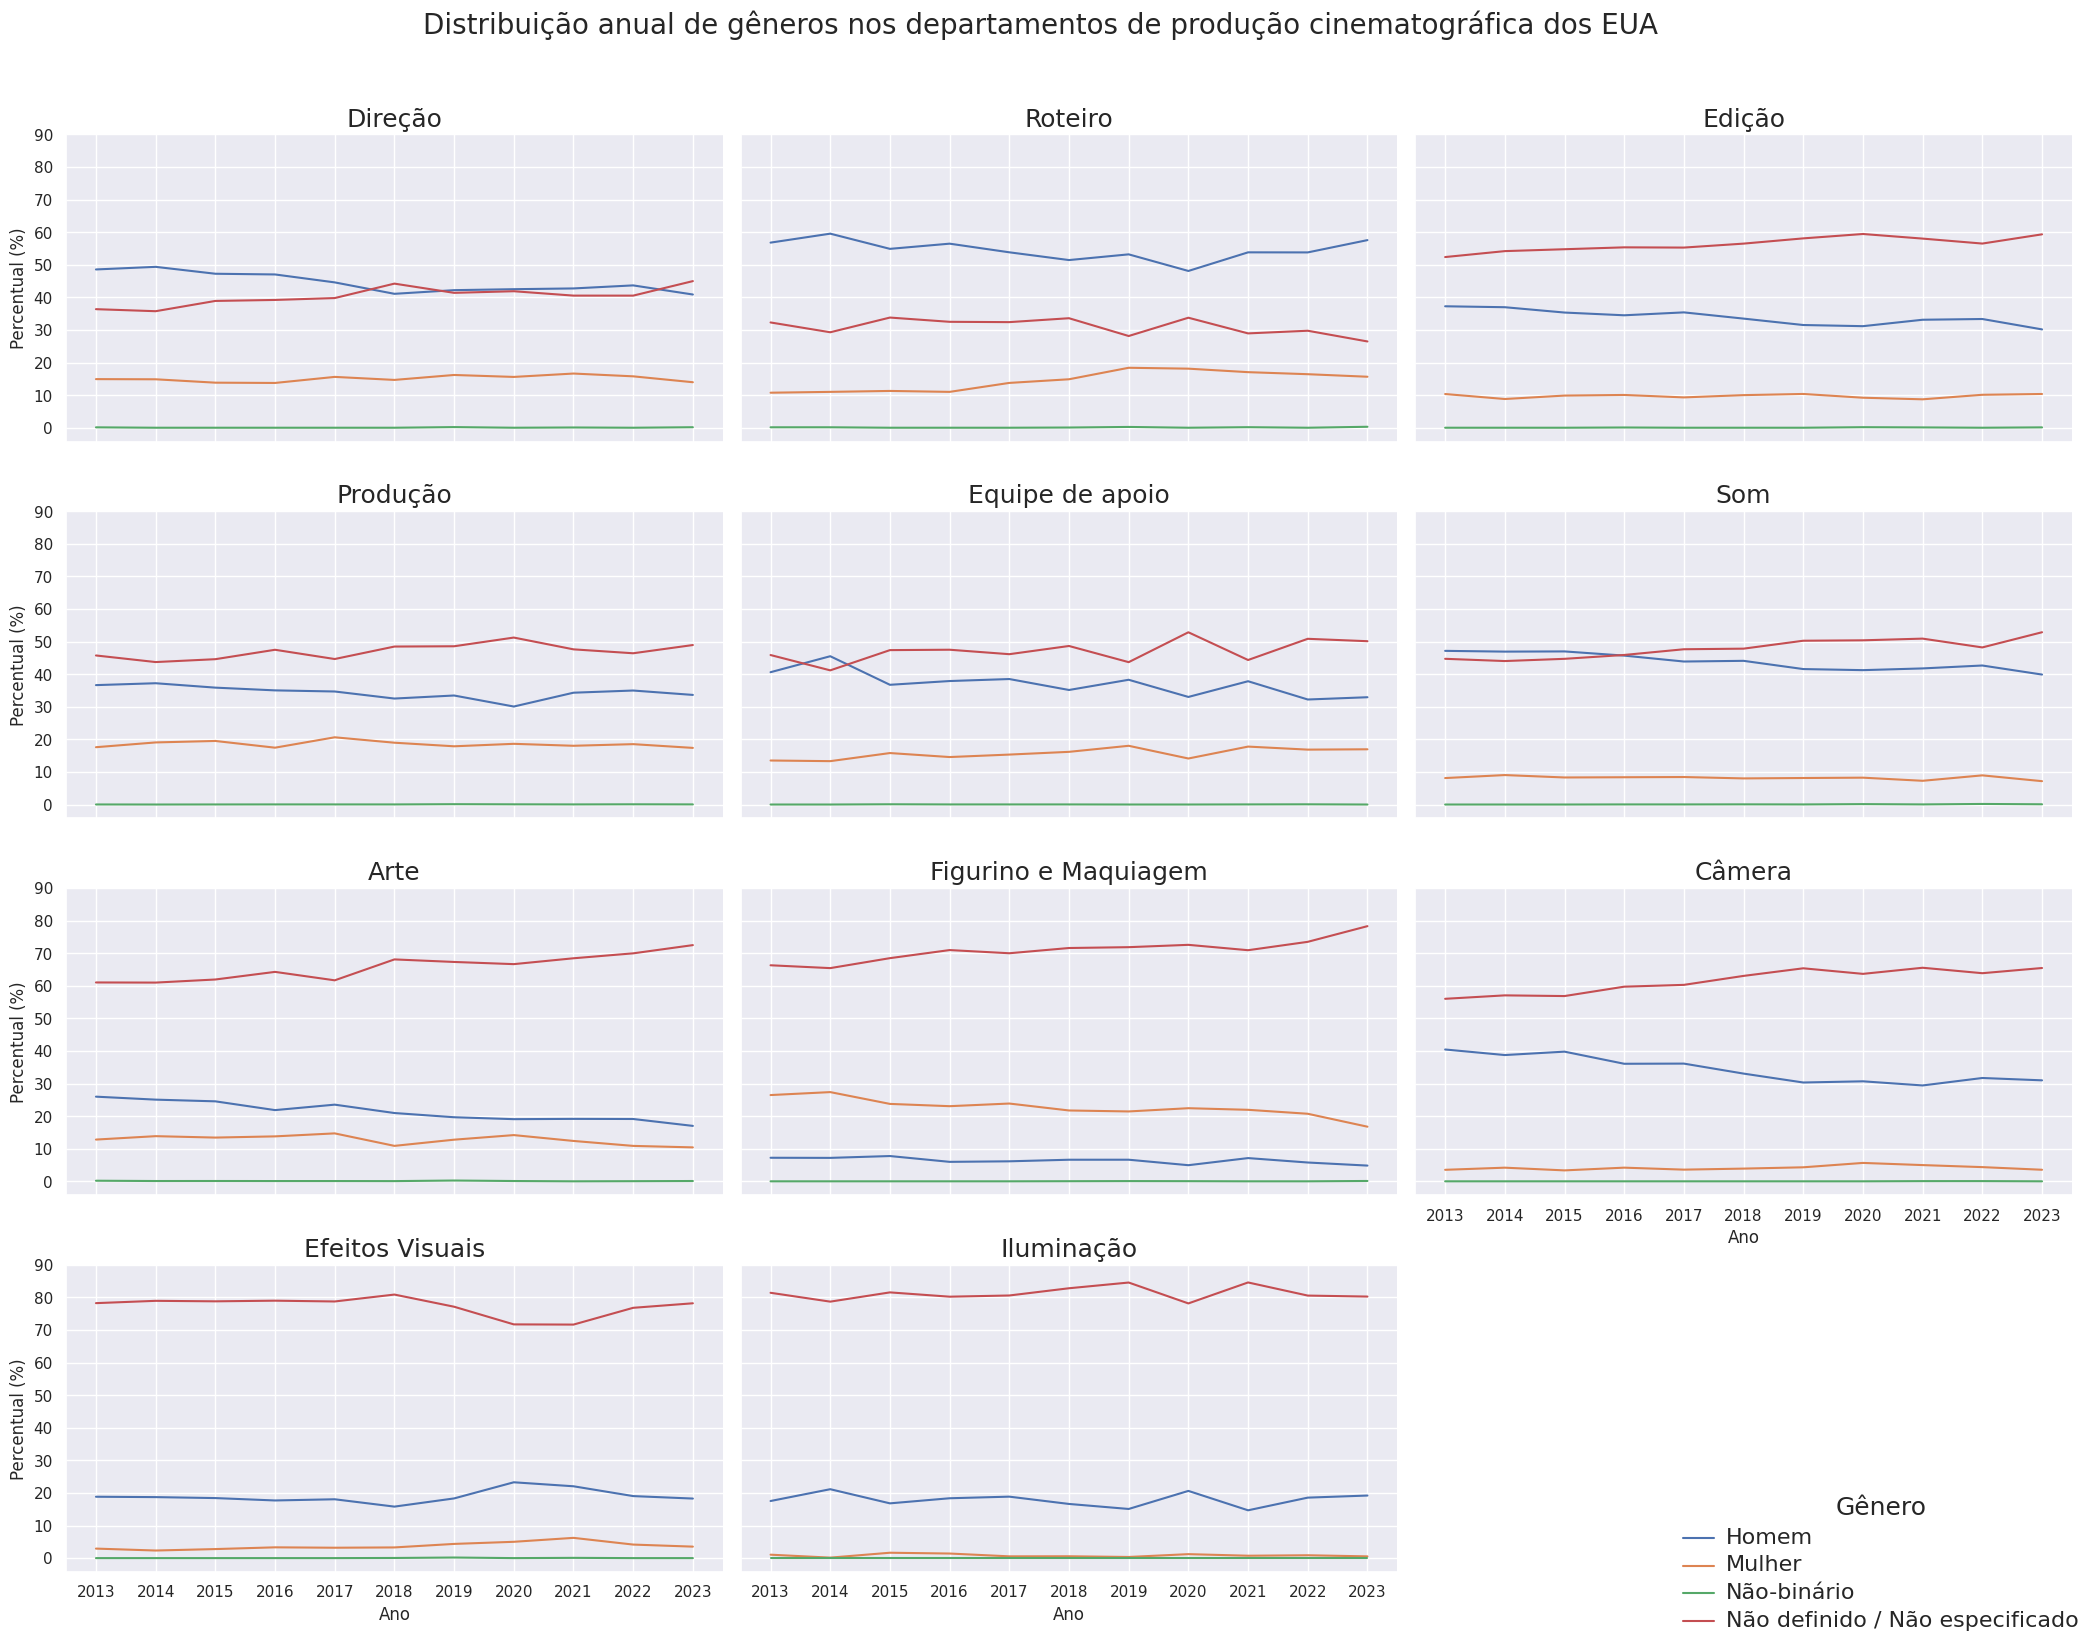

In [115]:
df_eua = eua_movies_data_by_year['all']

df_eua["crew"] = df_eua["crew"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_eua_exploded = df_eua.explode('crew')

df_eua_normalized = pd.concat([df_eua_exploded.drop(['crew'], axis=1), df_eua_exploded['crew'].apply(pd.Series)], axis=1)


# separa cada key do objeto em uma coluna
df_eua_normalized_translated = df_eua_normalized.copy()
df_normalized_translated_cleaned = df_eua_normalized_translated.dropna(subset='gender')

df_normalized_translated_cleaned['gender'] = df_normalized_translated_cleaned['gender'].apply(lambda x:gender_translation[x])
df_normalized_translated_cleaned['department'] = df_normalized_translated_cleaned['department'].apply(lambda x: departments_translation[x] if x in departments_translation else x)

all_years = df_br_normalized_translated['year'].unique()
all_departments = df_br_normalized_translated['department'].unique()
all_genders = df_br_normalized_translated['gender'].unique()

full_combinations = pd.DataFrame(itertools.product(all_years, all_departments, all_genders), columns=['year', 'department', 'gender'])

df_counts = df_normalized_translated_cleaned.groupby(['year', 'department', 'gender']).size().reset_index(name='count')
df_counts = full_combinations.merge(df_counts, on=['year', 'department', 'gender'], how='left').fillna({'count': 0})

df_counts['total'] = df_counts.groupby(['year', 'department'])['count'].transform('sum')
df_counts['percentage'] = (df_counts['count'] / df_counts['total']) * 100

plt.figure(figsize=(12, 12))
# Criando o FacetGrid
g = sns.FacetGrid(
    df_counts, 
    col="department", 
    hue="gender",
    hue_order=hue_order_gender,
    col_wrap=3,
    height=4, 
    aspect=1.5
)

# Adicionando gráficos de linha
g.map(sns.lineplot, "year", "percentage")

for ax in g.axes.flatten():
    ax.set_xticks(sorted(df['year'].unique()))
    ax.set_yticks(range(0, 91, 10))
    ax.set_xlabel("Ano")

# Ajustando a legenda e os rótulos
g.add_legend(title="Gênero")
g._legend.set_loc("lower right")

g._legend.get_title().set_fontsize(18)

for text in g._legend.get_texts():
    text.set_fontsize(16)
    # text.set_fontfamily('serif')
    
g.fig.suptitle(
    "Distribuição anual de gêneros nos departamentos de produção cinematográfica dos EUA",
    fontsize=20,  # Tamanho da fonte do título
    # fontweight='bold',  # Estilo da fonte
    y=1.02  # Ajusta a posição vertical do título
)


g.set_axis_labels("Ano", "Percentual (%)")
g.set_titles("{col_name}", size=18)  # Nome de cada departamento no título do subplot
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [205]:
# plt.figure(figsize=(12, 8))
# plt.title('Distribuição do número de filmes por pessoa da produção categorizado por gênero')
# plt.xlabel('Quantidade de filmes')
# plt.ylabel('Número de pessoas')
# plt.yscale('log')
# plt.legend(title='Gênero')

# # plt.yticks(np.arange(0, 11, 1))
# movies_count = top_names[['movies_amount', 'gender']].value_counts().reset_index()
# movies_count
# movies_count.columns = ['movies_amount', 'gender', 'num_actors']
# plt.yscale('log')
# ax = sns.barplot(x='movies_amount', y='num_actors', data=movies_count, hue="gender", gap= 0.1)
# ax.get_legend().set_title("Gênero")
df_normalized


id original_language        original_title  \
0     87567                en       The Big Wedding   
0     87567                en       The Big Wedding   
0     87567                en       The Big Wedding   
0     87567                en       The Big Wedding   
0     87567                en       The Big Wedding   
..      ...               ...                   ...   
204  925263                it  Il sol dell'avvenire   
204  925263                it  Il sol dell'avvenire   
204  925263                it  Il sol dell'avvenire   
204  925263                it  Il sol dell'avvenire   
204  925263                it  Il sol dell'avvenire   

                                              overview release_date  \
0    To the amusement of their adult children and f...   2013-04-25   
0    To the amusement of their adult children and f...   2013-04-25   
0    To the amusement of their adult children and f...   2013-04-25   
0    To the amusement of their adult children and f...   2013-04-25   
0    To the amusement of their adult children and f...   2013-04-25   
..                                                 ...          ...   
204  An old film director unhappy with the movie he...   2023-04-20   
204  An old film director unhappy with the movie he...   2023-04-20   
204  An old film director unhappy with the movie he...   2023-04-20   
204  An old film director unhappy with the movie he...   2023-04-20   
204  An old film director unhappy with the movie he...   2023-04-20   

                   title  vote_average  vote_count belongs_to_collection  \
0        The Big Wedding         5.869        1111                   NaN   
0        The Big Wedding         5.869        1111                   NaN   
0        The Big Wedding         5.869        1111                   NaN   
0        The Big Wedding         5.869        1111                   NaN   
0        The Big Wedding         5.869        1111                   NaN   
..                   ...           ...         ...                   ...   
204  A Brighter Tomorrow         7.100         263                   NaN   
204  A Brighter Tomorrow         7.100         263                   NaN   
204  A Brighter Tomorrow         7.100         263                   NaN   
204  A Brighter Tomorrow         7.100         263                   NaN   
204  A Brighter Tomorrow         7.100         263                   NaN   

         budget  ...                                   spoken_languages  \
0    35000000.0  ...                    ['English', 'Spanish', 'Latin']   
0    35000000.0  ...                    ['English', 'Spanish', 'Latin']   
0    35000000.0  ...                    ['English', 'Spanish', 'Latin']   
0    35000000.0  ...                    ['English', 'Spanish', 'Latin']   
0    35000000.0  ...                    ['English', 'Spanish', 'Latin']   
..          ...  ...                                                ...   
204  13266839.0  ...  ['Korean', 'French', 'Hungarian', 'Italian', '...   
204  13266839.0  ...  ['Korean', 'French', 'Hungarian', 'Italian', '...   
204  13266839.0  ...  ['Korean', 'French', 'Hungarian', 'Italian', '...   
204  13266839.0  ...  ['Korean', 'French', 'Hungarian', 'Italian', '...   
204  13266839.0  ...  ['Korean', 'French', 'Hungarian', 'Italian', '...   

                                               tagline  \
0    It's never too late to start acting like a fam...   
0    It's never too late to start acting like a fam...   
0    It's never too late to start acting like a fam...   
0    It's never too late to start acting like a fam...   
0    It's never too late to start acting like a fam...   
..                                                 ...   
204                                                NaN   
204                                                NaN   
204                                                NaN   
204                                                NaN   
204                                        

Stripplot de genero e orçamento dos filmes

In [206]:
# def count_genders(people_list):
#     gender_count = {}
        
#     for person in people_list:
#         gender = person['gender']
        
#         if gender in gender_count:
#             gender_count[gender] += 1
#         else:
#             gender_count[gender] = 1
    
#     return pd.Series(gender_count)

# df = movies_data_by_year['all']
# df["crew"] = df["crew"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# df["cast"] = df["cast"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# df

# # count_genders(df['cast'])
# # print(count_genders(df['cast'].head(1)[0]))

# cast_count = df['cast'].apply(count_genders).fillna(0)
# crew_count = df['crew'].apply(count_genders).fillna(0)

# gender_sum = crew_count + cast_count


# # df.concat(crew_count + cast_count)

# df = pd.concat([df, gender_sum], axis=1)

# df


# plt.figure(figsize=(10, 6))

# # Plot budget vs female count
# sns.scatterplot(data=df, x='budget', y='Female', color='blue', label='Female Count')

# # Plot budget vs male count
# sns.scatterplot(data=df, x='budget', y='Male', color='green', label='Male Count')

# # Plot budget vs not specified count
# # sns.scatterplot(data=df, x='budget', y='Not set/not specified', color='orange', label='Not Specified Count')

# sns.scatterplot(data=df, x='budget', y='Non-binary', color='red', label='Non-binary Count')

# # Add labels and title
# plt.title('Relationship between Gender Counts and Budget')
# plt.xlabel('Budget')
# plt.ylabel('Number of People')
# plt.legend()

# # Show the plot
# plt.show()




Análise econômica

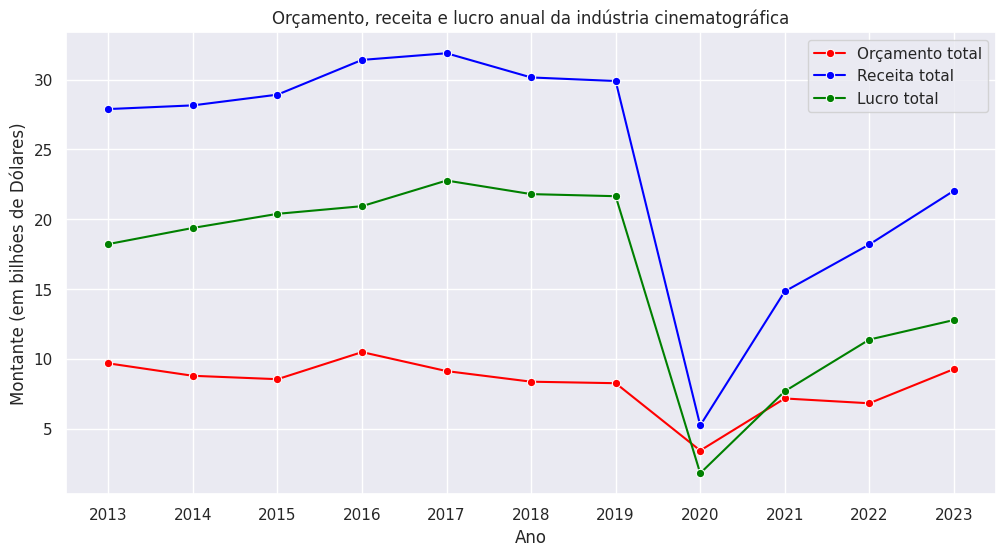

In [207]:
#Evolução anual do investimento dos filmes

totals = []

for year in range(start_year, end_year+1):
    billion = 1000000000
    df = movies_data_by_year[year]
    total_budget = df['budget'].sum() / billion
    total_revenue = df['revenue'].sum() / billion
    total_profit = total_revenue - total_budget
    totals.append({'year': year, 'total_budget': total_budget, 'total_revenue': total_revenue, 'total_profit': total_profit})
    
financial_totals = pd.DataFrame(totals)

# Crie o line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=financial_totals, x='year', y='total_budget', marker='o', label='Orçamento total', color='red')
sns.lineplot(data=financial_totals, x='year', y='total_revenue', marker='o', label='Receita total', color='blue')
sns.lineplot(data=financial_totals, x='year', y='total_profit', marker='o', label='Lucro total', color='green')


plt.title('Orçamento, receita e lucro anual da indústria cinematográfica')
plt.xlabel('Ano')
plt.ylabel('Montante (em bilhões de Dólares)')
plt.xticks(financial_totals['year'])
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()


Sucesso financeiro dos filmes em relação ao gênero

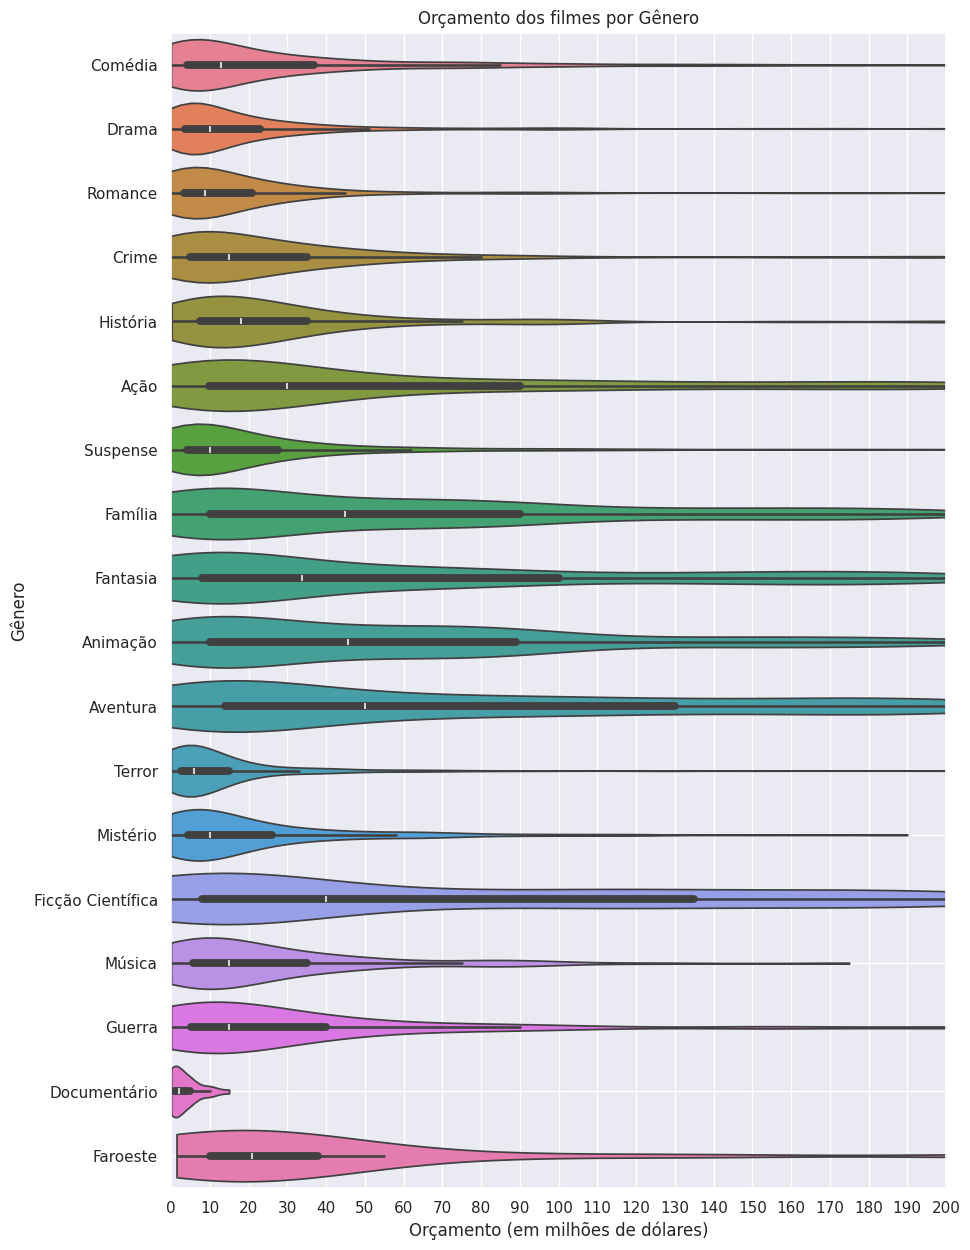

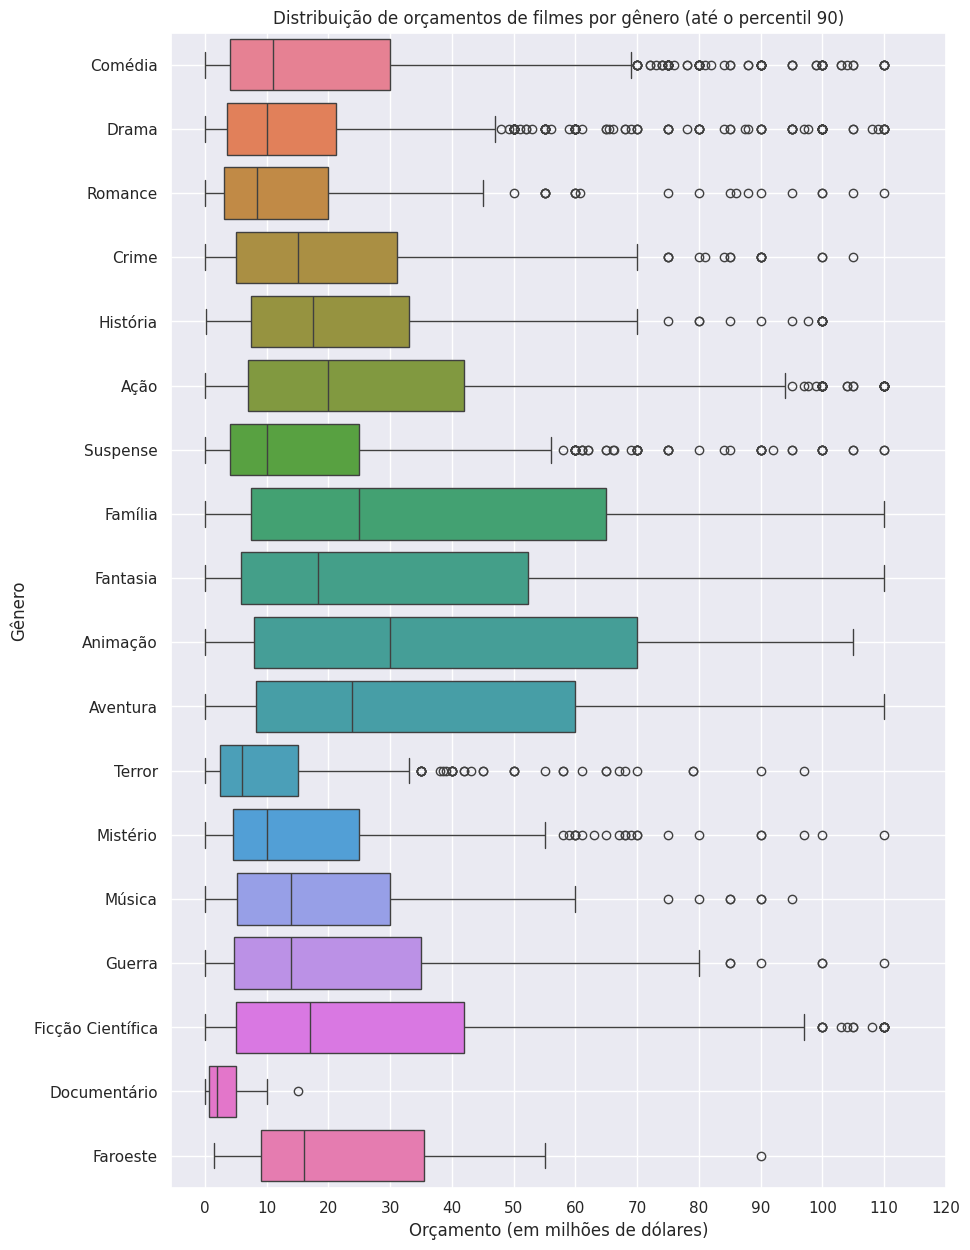

          id original_language        original_title  \
0      87567                en       The Big Wedding   
1     152742                it   La migliore offerta   
2     152742                it   La migliore offerta   
3     152742                it   La migliore offerta   
4     140823                en      Saving Mr. Banks   
...      ...               ...                   ...   
7053  990326                cn                  毒舌大狀   
7054  965489                te                  ఖుషి   
7055  965489                te                  ఖుషి   
7056  965489                te                  ఖుషి   
7057  925263                it  Il sol dell'avvenire   

                                               overview release_date  \
0     To the amusement of their adult children and f...   2013-04-25   
1     Virgil Oldman is a world renowned antiques exp...   2013-01-01   
2     Virgil Oldman is a world renowned antiques exp...   2013-01-01   
3     Virgil Oldman is a world renowned

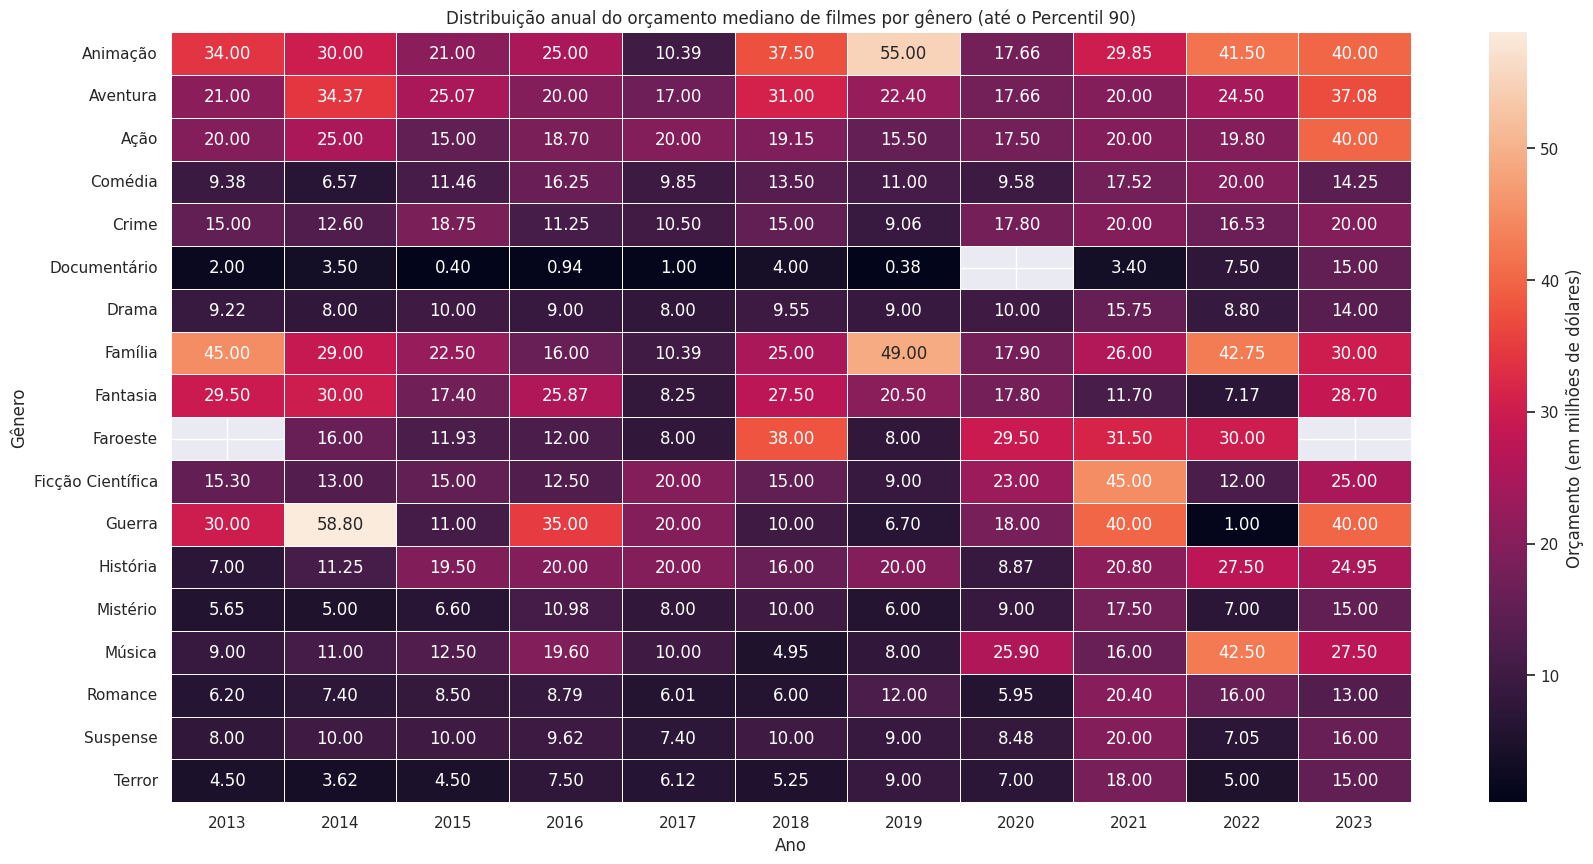

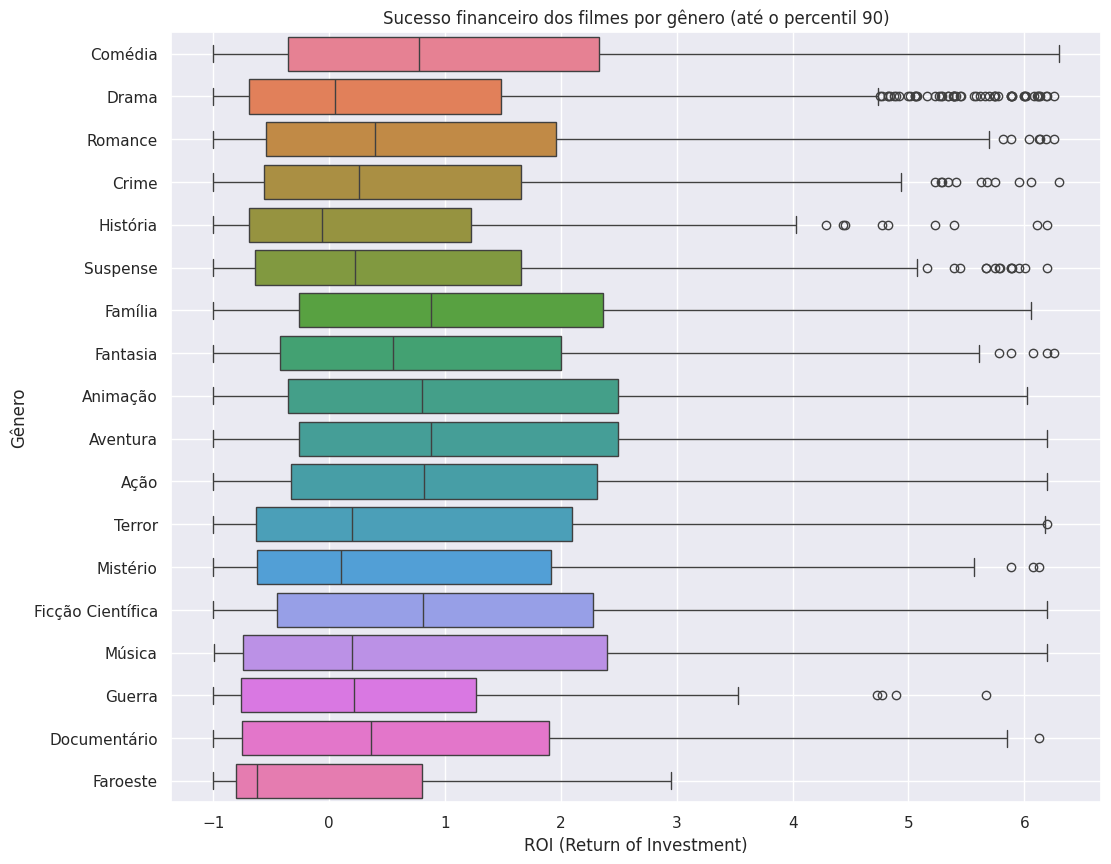

In [120]:
# Violin plot
million = 1000000
df = movies_data_by_year['all'].copy()
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_genres = df.explode('genres', ignore_index=True).dropna(subset='genres')
df_genres['genres'] = df_genres['genres'].apply(lambda x:genre_translation[x])

df_genres_roi = df_genres.copy()
roi = (df_genres_roi['revenue'] - df_genres_roi['budget']) / df_genres_roi['budget']
df_genres_roi['roi'] = roi
df_genres_roi['budget'] = df_genres_roi['budget'] / million

df_genres_roi = df_genres_roi[df_genres_roi.genres != 'Filme para TV']

plt.figure(figsize=(10, 15))
sns.violinplot(data=df_genres_roi, x='budget', y='genres', hue='genres', cut=0)
plt.title('Orçamento dos filmes por Gênero')
plt.xlabel('Orçamento (em milhões de dólares)')
plt.ylabel('Gênero')
plt.grid(True, which='both', axis='both')
plt.xlim(0, 2 * 100000000 / million)
plt.xticks(range(0, 201, 10))
plt.show()

p90_budget = df_genres_roi['budget'].quantile(0.90)

p90_df_genres_roi = df_genres_roi[df_genres_roi['budget'] <= p90_budget]

# Boxplot p90 do orçamento
plt.figure(figsize=(10, 15))
sns.boxplot(data=p90_df_genres_roi, x='budget', y='genres', hue='genres')
plt.title('Distribuição de orçamentos de filmes por gênero (até o percentil 90)')
plt.xlabel('Orçamento (em milhões de dólares)')
plt.ylabel('Gênero')
plt.xticks(range(0, 121, 10))
plt.grid(True, which='both', axis='both')
plt.show()

print(df_genres_roi[df_genres_roi['budget'] <= p90_budget])


# Heatmap
plt.figure(figsize=(20, 10))
df_genres_median_budget = p90_df_genres_roi.groupby(['year', 'genres'])['budget'].median().reset_index()
df_pivot = df_genres_median_budget.pivot(index='genres', columns='year', values='budget')
sns.heatmap(df_pivot, annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Orçamento (em milhões de dólares)'})

plt.title('Distribuição anual do orçamento mediano de filmes por gênero (até o Percentil 90)')
plt.xlabel('Ano')
plt.ylabel('Gênero')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

p90_roi = df_genres_roi['roi'].quantile(0.90)
p90_df_genres_roi_roi = df_genres_roi[df_genres_roi['roi'] <= p90_roi]

## Sucesso financeiro por genero
plt.figure(figsize=(12, 10))
sns.boxplot(data=p90_df_genres_roi_roi, x='roi', y='genres', hue='genres')
# plt.xlim(-2, 16)
# plt.xticks(range(-1, 16, 1))
plt.title('Sucesso financeiro dos filmes por gênero (até o percentil 90)')
plt.xlabel('ROI (Return of Investment)')
plt.ylabel('Gênero')
plt.grid(True, which='both', axis='both')



plt.show()



Sucesso financeiro dos filmes em relação a coleções

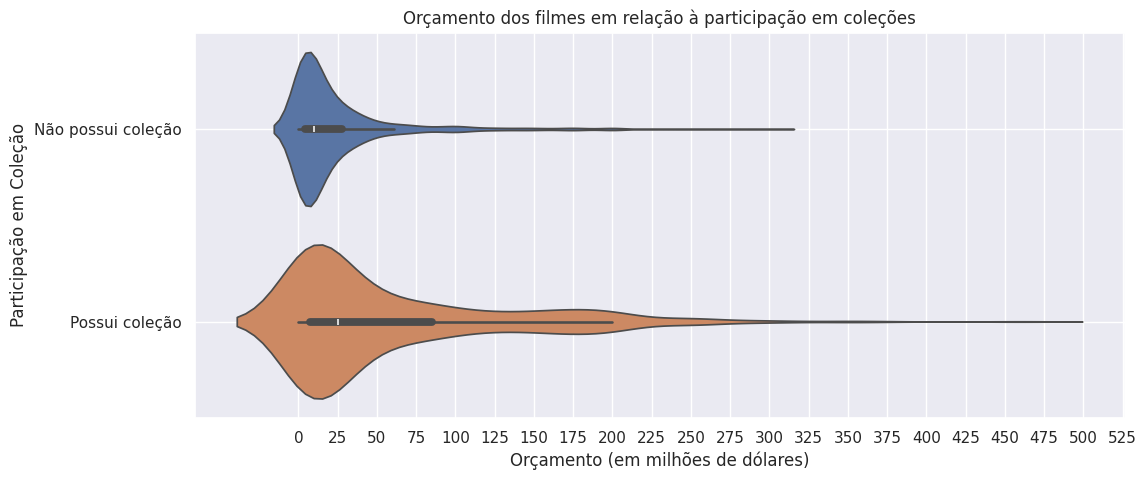

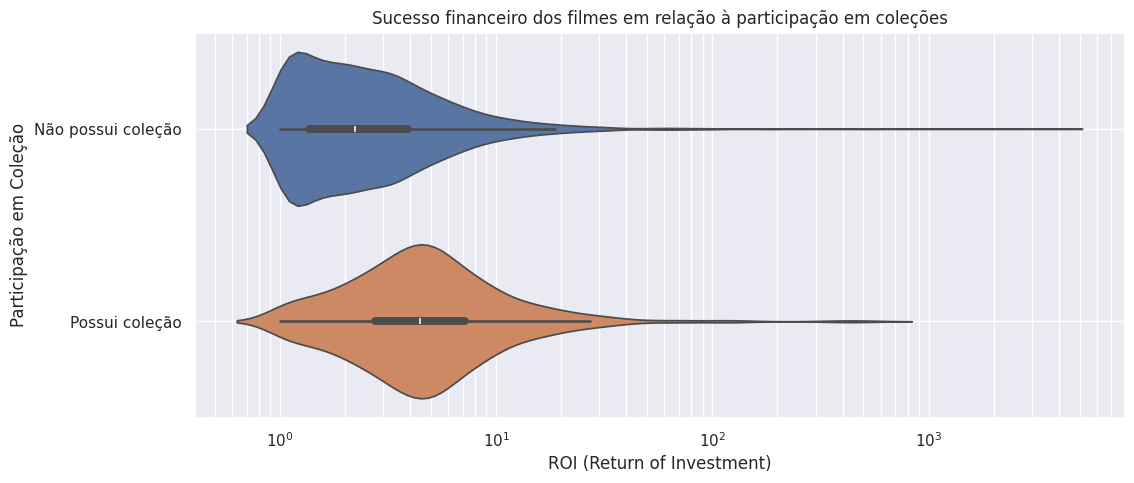

In [209]:
df = movies_data_by_year['all']

df['belongs_to_collection'] = df['belongs_to_collection'].fillna(False).apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['in_collection'] = df['belongs_to_collection'].apply(lambda x: 'Possui coleção' if x else 'Não possui coleção')
df['roi'] = ((df['revenue'] - df['budget']) / df['budget'])

df[['roi', 'in_collection']]
million = 1000000

plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x=df['budget']/million, y='in_collection', hue='in_collection')
plt.title('Orçamento dos filmes em relação à participação em coleções')
plt.xlabel('Orçamento (em milhões de dólares)')
plt.ylabel('Participação em Coleção')
plt.grid(True, which='both', axis='both')
plt.xticks(range(0, 550, 25))

plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x=df['roi'] + 2, y='in_collection', hue='in_collection', log_scale=True)
plt.title('Sucesso financeiro dos filmes em relação à participação em coleções')
plt.xlabel('ROI (Return of Investment)')
plt.ylabel('Participação em Coleção')
plt.grid(True, which='both', axis='both')
# plt.xticks(range(-1, 30, 1))



Sucesso financeiro por companhias produtoras

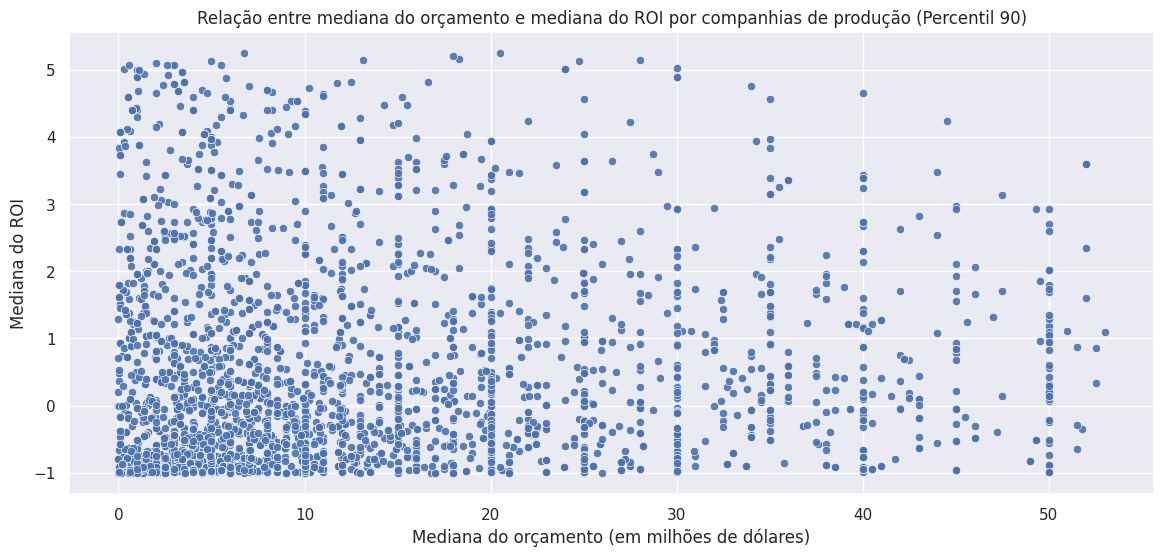

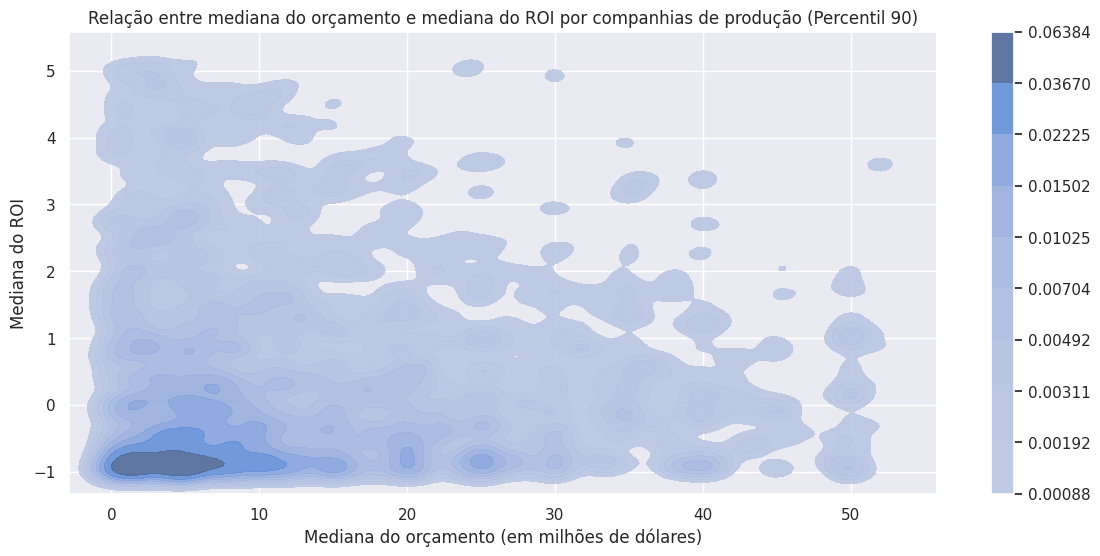

In [133]:
df = movies_data_by_year['all']
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['roi'] = ((df['revenue'] - df['budget']) / df['budget'])
df_exploded = df.explode('production_companies')
df_exploded['company_name'] = df_exploded['production_companies'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

# df_exploded = pd.concat([df_exploded.drop(['production_companies'], axis=1), df_exploded['production_companies'].apply(pd.Series)], axis=1)



company_stats = df_exploded.groupby('company_name').agg(
    median_budget=('budget', 'median'),
    median_roi=('roi', 'median'),
).reset_index()

p90_roi = company_stats['median_roi'].quantile(0.9)
p90_budget = company_stats['median_budget'].quantile(0.9)

company_stats = company_stats[company_stats['median_roi'] <= p90_roi]
company_stats = company_stats[company_stats['median_budget'] <= p90_budget]

plt.figure(figsize=(14, 6))
# plt.yticks(range(-1, 25, 1))
sns.scatterplot(
    data=company_stats,
    x=company_stats['median_budget'] / million,
    y='median_roi',
    # fill=True,
    alpha=0.9,
    # log_scale=[True, False],
    # clip=((0, 56), (-1, 7)),
    # bw_adjust=.5,
    # cbar=True
)

plt.xlabel('Mediana do orçamento (em milhões de dólares)')
plt.ylabel('Mediana do ROI')
plt.title('Relação entre mediana do orçamento e mediana do ROI por companhias de produção (Percentil 90)')
plt.show()

plt.figure(figsize=(14, 6))
sns.kdeplot(
    data=company_stats,
    x=company_stats['median_budget'] / million,
    y='median_roi',
    fill=True,
    alpha=0.9,
    # clip=((0, 56), (-1, 7)),
    bw_adjust=.3,
    cbar=True,
)

# plt.xticks(range(0, 55, 2))
# plt.yticks(range(-1, 6, 0.5))

plt.xlabel('Mediana do orçamento (em milhões de dólares)')
plt.ylabel('Mediana do ROI')
plt.title('Relação entre mediana do orçamento e mediana do ROI por companhias de produção (Percentil 90)')
plt.show()

Sucesso financeiro por países produtores

In [145]:
df = movies_data_by_year["all"]

df['production_countries'] = df['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['roi'] = ((df['revenue'] - df['budget']) / df['budget'])
df_countries = df.explode('production_countries', ignore_index=True)
df_countries['production_countries'].replace(country_mapping)


p90_roi = df_countries['roi'].quantile(0.90)

country_stats = df_countries.groupby('production_countries').agg(
    median_budget=('budget', 'median'),
    median_roi=('roi', 'median'),
).reset_index()

# country_stats['avg_budget'] = np.log10(country_stats['avg_budget'])
# country_stats['avg_roi'] = np.log10(country_stats['avg_roi'] + 2)

### Budget

m = folium.Map(location=[45, -90], zoom_start=1.5)

Choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=country_stats,
    columns=['production_countries', 'median_budget'],
    key_on='feature.properties.production_country',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mediana do orçamento em dólares',
).add_to(m)

folium.LayerControl().add_to(m)

m.save(f'choropleth/choropleth_budget.html')

display(m)


### ROI

m = folium.Map(location=[45, -90], zoom_start=1.5)

Choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=country_stats[country_stats['median_roi'] <= p90_roi],
    columns=['production_countries', 'median_roi'],
    key_on='feature.properties.production_country',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mediana do ROI',
).add_to(m)

folium.LayerControl().add_to(m)

m.save(f'choropleth/choropleth_roi.html')
display(m)


Sucesso financeiro por duração do filme

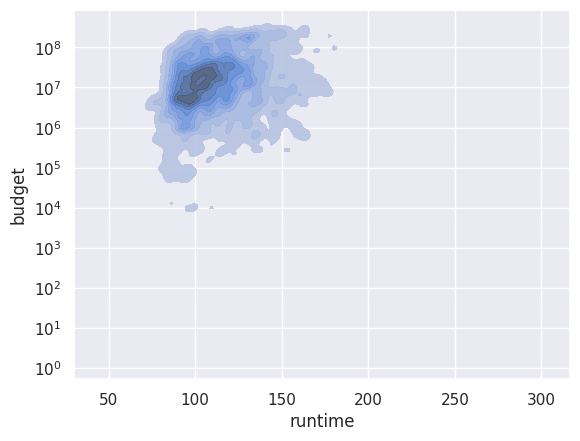

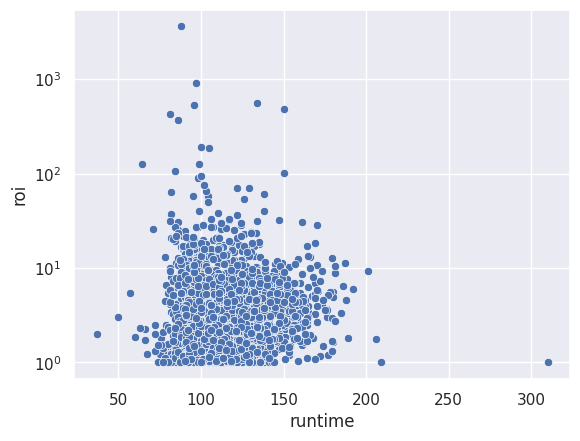

In [212]:
df = movies_data_by_year["all"]
df['roi'] = ((df['revenue'] - df['budget']) / df['budget']) + 2


# sns.scatterplot(
#     data=df,
#     x='runtime',
#     y='budget',
# )

sns.kdeplot(
    data=df,
    x='runtime',
    y='budget',
    fill=True,
    alpha=0.9,
    log_scale=[False, True],
    # clip=((5, 9), (-1, 25)),
    bw_adjust=.4
)

plt.show()

ax = sns.scatterplot(
    data=df,
    x='runtime',
    y='roi',
    # fill=True,
    # alpha=0.9,
    # log_scale=[False, True],
    # clip=((5, 9), (-1, 25)),
)

ax.set_yscale('log')

plt.show()



Regressão linear

/tmp/ipykernel_1560/3606699203.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['budget'] = np.log(X['budget'])


Intercept: 119.83436543936449
Coefficients: [ 0.86723337  1.12278533  0.34111963 -0.05985848  0.02230321  0.11316135
  0.09163801  0.367352    0.49973067 -0.25639889 -0.05613723 -0.14862322
 -0.04099022  0.11084218 -0.1009383   0.42054691  0.20559969  0.11549281
  0.07464548 -0.17043623  0.02620092 -0.03526003 -1.31548726  0.04463639]
R² Score: 0.6545098878751947
Mean Squared Error: 2.918895369338946
Adjusted R² Score: 0.6514859043992665


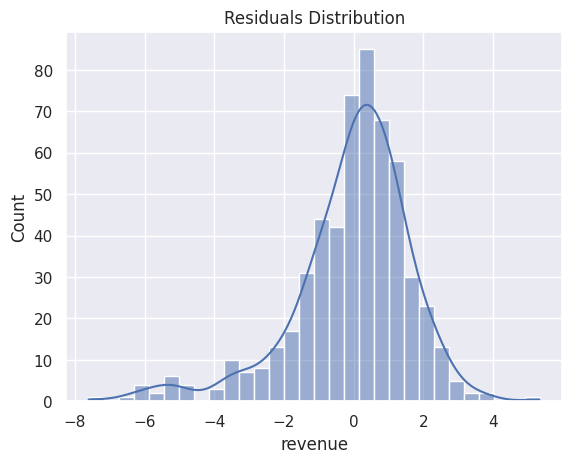

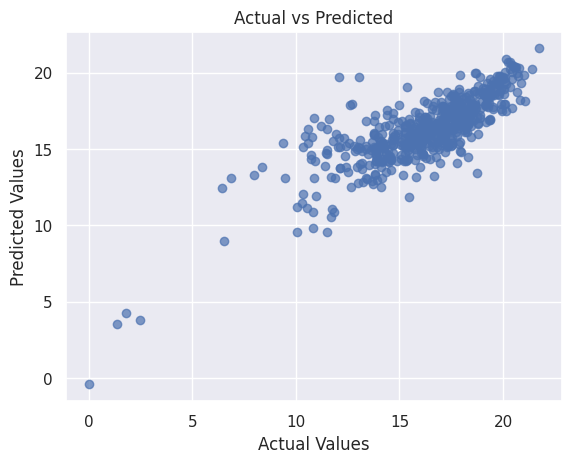

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

df = movies_data_by_year["all"]
df['roi'] = ((df['revenue'] - df['budget']) / df['budget'])

df['belongs_to_collection'] =  df['belongs_to_collection'].apply(lambda x: 1 if x else 0)
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


df = pd.get_dummies(df, columns=['original_language'], drop_first=True)

## Dummies de genero
df_exploded = df.explode('genres')
dummies = pd.get_dummies(df_exploded['genres'], prefix='genre')
dummies_grouped = dummies.groupby(df_exploded['original_title']).sum()


df_original = df.drop(columns=['genres'])
df_original = df_original.drop_duplicates(subset='original_title')
df_final = df_original.merge(dummies_grouped, on='original_title', how='left')


## Dummies de companies
# df_exploded = df.explode('production_companies')
# dummies = pd.get_dummies(df_exploded['production_companies'], prefix='production_companies')
# dummies_grouped = dummies.groupby(df_exploded['original_title']).sum()


# df_original = df.drop(columns=['genres'])
# df_original = df_original.drop_duplicates(subset='original_title')
# df_final = df_original.merge(dummies_grouped, on='original_title', how='left')


# filtered_df = df[df['budget'] > threshold]




X = df_final[['budget', 'belongs_to_collection', 'original_language_en', 'year', 'runtime', 'genre_Action', 'genre_Adventure', 'genre_Animation', 
    'genre_Comedy', 'genre_Crime', 'genre_Documentary', 
    'genre_Drama', 'genre_Family', 'genre_Fantasy', 
    'genre_History', 'genre_Horror', 'genre_Music', 
    'genre_Mystery', 'genre_Romance', 'genre_Science Fiction', 
    'genre_Thriller', 'genre_War', 
    'genre_Western', 'original_language_es']]
y = np.log(df_final['revenue'])
X['budget'] = np.log(X['budget'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)
print("Mean Squared Error:", mse)

adjusted_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R² Score:", adjusted_r2)

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# roi_pred = ((np.exp(y_pred) - np.exp(X_test['budget'])) / np.exp(X_test['budget']))
# roi_real = ((np.exp(y_test) - np.exp(X_test['budget'])) / np.exp(X_test['budget']))

# mse_roi = mean_squared_error(roi_real, roi_pred)
# r2_roi = r2_score(roi_real, roi_pred)
# print("Mean Squared Error (ROI):", mse_roi)
# print("R² (ROI):", r2_roi)

# plt.scatter(roi_real, roi_pred, alpha=0.7)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs Predicted - ROI")
# plt.show()

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from statsmodels.stats.diagnostic import het_breuschpagan
# import statsmodels.api as sm

# df = movies_data_by_year["all"]


# df_evaluated = df.copy().reset_index()

# df_evaluated['roi'] = ((df_evaluated['revenue'] - df_evaluated['budget']) / df_evaluated['budget'])

# dummie_variables = ['cast', 'crew', 'original_language', 'belongs_to_collection', 'production_companies', 'genres', 'keywords', 'production_countries', 'spoken_languages']

# dummie_to_ignore_eval = ['original_language'] # Dummies que são string
# dummie_variables_threshold = {
#     'production_companies': {
#         'name': 40
#     },
#     'cast': {
#         'name': 20,
#         'gender': 0,
#     },
#     'crew': {
#         'name': 40,
#         'gender': 0
#     },
#     'keywords': {
#         'value': 60,
#     },
#     'spoken_languages': {
#         'value': 60
#     },
#     'production_countries': {
#         'value': 50,
#     },
#     'original_language': {
#         'value': 10,
#     },
#     'genres': {
#         'value': 20,
#     }
# }

# for dummie in dummie_variables:
#     if not dummie in dummie_to_ignore_eval:
#         df_evaluated[dummie] = df_evaluated[dummie].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# df_evaluated['belongs_to_collection'] = df_evaluated['belongs_to_collection'].notna().astype(int)

# processed_dummies = []

# # Nao ta considerando variaveis fora do dummie_variables_threshold
# for dummie in dummie_variables:
#     df_explode = df_evaluated.explode(dummie)
    
#     if dummie in dummie_variables_threshold:
#         variable_threshold = dummie_variables_threshold[dummie]
        
#         for field_name, threshold in variable_threshold.items():
#             field_col = f'{dummie}_{field_name}'
#             df_explode[field_col] = df_explode[dummie].apply(lambda x: x[field_name] if isinstance(x, dict) else x)
#             dummie_counts = df_explode[field_col].value_counts().to_dict()
            
#             df_explode[field_col] = df_explode[field_col].apply(lambda x: x if x in dummie_counts and dummie_counts[x] > threshold else 'Other')
            
#             dummie_df = pd.get_dummies(df_explode[field_col], drop_first=True, prefix=field_col)
#             dummie_grouped = dummie_df.groupby(df_evaluated['id']).sum()
#             print(field_col, len(dummie_grouped.columns))
#             processed_dummies.append(dummie_grouped)

# numerical_columns = df_evaluated[['id', 'budget', 'revenue', 'runtime', 'roi', 'year', 'belongs_to_collection']].set_index('id')

# df_final = processed_dummies[0]

# for i in range(1, len(processed_dummies)):
#     df_final = df_final.merge(processed_dummies[i], on="id")
    
# df_final = df_final.merge(numerical_columns, on="id")
    
# y_revenue = np.log(df_final['revenue'])
# y_roi = np.log(df_final['roi'] + 2)
# df_final_without_revenue_and_roi = df_final.drop(['revenue', 'roi'], axis=1)
# df_final_without_revenue_and_roi['budget'] = np.log(df_final_without_revenue_and_roi['budget'])

# X = df_final_without_revenue_and_roi

# X_train_revenue, X_test_revenue, y_train_revenue, y_test_revenue = train_test_split(X, y_revenue, test_size=0.2, random_state=42)
# X_train_roi, X_test_roi, y_train_roi, y_test_roi = train_test_split(X, y_roi, test_size=0.2, random_state=42)

KeyboardInterrupt: 

In [146]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import ast



def define_threshold(series, percentile=0.05):
    value_counts = series.value_counts()
    threshold = value_counts.quantile(1 - percentile)
    return threshold

df = movies_data_by_year["all"]


df_evaluated = df.copy().reset_index()

df_evaluated['roi'] = ((df_evaluated['revenue'] - df_evaluated['budget']) / df_evaluated['budget'])

dummie_variables = ['cast', 'crew', 'original_language', 'belongs_to_collection', 'production_companies', 'genres', 'keywords', 'production_countries', 'spoken_languages']

dummie_to_ignore_eval = ['original_language'] # Dummies que são string
dummie_variables_threshold = {
    'production_companies': {
        'name': 40
    },
    'cast': {
        'name': 20,
        'gender': 0,
    },
    'crew': {
        'name': 40,
        'gender': 0
    },
    'keywords': {
        'value': 60,
    },
    'spoken_languages': {
        'value': 60
    },
    'production_countries': {
        'value': 50,
    },
    'original_language': {
        'value': 10,
    },
    'genres': {
        'value': 20,
    }
}

for dummie in dummie_variables:
    if not dummie in dummie_to_ignore_eval:
        df_evaluated[dummie] = df_evaluated[dummie].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_evaluated['belongs_to_collection'] = df_evaluated['belongs_to_collection'].notna().astype(int)

processed_dummies = []

# Nao ta considerando variaveis fora do dummie_variables_threshold
for dummie in dummie_variables:
    df_explode = df_evaluated.explode(dummie)
    
    if dummie in dummie_variables_threshold:
        variable_threshold = dummie_variables_threshold[dummie]
        
        for field_name, _ in variable_threshold.items():
            field_col = f'{dummie}_{field_name}'
            df_explode[field_col] = df_explode[dummie].apply(lambda x: x[field_name] if isinstance(x, dict) else x)
            dummie_counts = df_explode[field_col].value_counts().to_dict()
            
            threshold = define_threshold(df_explode[field_col], percentile=0.001)
            df_explode[field_col] = df_explode[field_col].apply(lambda x: x if x in dummie_counts and dummie_counts[x] > threshold else 'Other')
            
            dummie_df = pd.get_dummies(df_explode[field_col], drop_first=True, prefix=field_col)
            dummie_grouped = dummie_df.groupby(df_evaluated['id']).sum()
            print(field_col, threshold, len(dummie_grouped.columns))
            processed_dummies.append(dummie_grouped)

numerical_columns = df_evaluated[['id', 'budget', 'revenue', 'runtime', 'roi', 'year', 'belongs_to_collection']].set_index('id')

df_final = processed_dummies[0]

for i in range(1, len(processed_dummies)):
    df_final = df_final.merge(processed_dummies[i], on="id")
    
df_final = df_final.merge(numerical_columns, on="id")
    
y_revenue = np.log(df_final['revenue'])
y_roi = np.log(df_final['roi'] + 2)
df_final_without_revenue_and_roi = df_final.drop(['revenue', 'roi'], axis=1)
df_final_without_revenue_and_roi['budget'] = np.log(df_final_without_revenue_and_roi['budget'])

X = df_final_without_revenue_and_roi

X_train_revenue, X_test_revenue, y_train_revenue, y_test_revenue = train_test_split(X, y_revenue, test_size=0.2, random_state=42)
X_train_roi, X_test_roi, y_train_roi, y_test_roi = train_test_split(X, y_roi, test_size=0.2, random_state=42)

cast_name 17.0 50
cast_gender 50170.57600000001 1
crew_name 30.0 102
crew_gender 123771.42200000002 1
original_language_value 1792.7800000000093 1
production_companies_name 79.35900000000038 5
genres_value 1292.7280000000012 1
keywords_value 106.45900000000074 8
production_countries_value 1632.3320000000151 1
spoken_languages_value 1916.975000000011 1


# Previsão utilizando budget com OLS (Ordinary Least Squares) e p-value pra teste de Homogeneidade de Variância

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     2241.
Date:                Tue, 28 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:20:53   Log-Likelihood:                -4673.0
No. Observations:                2218   AIC:                             9350.
Df Residuals:                    2216   BIC:                             9361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4589      0.336      1.367      0.1

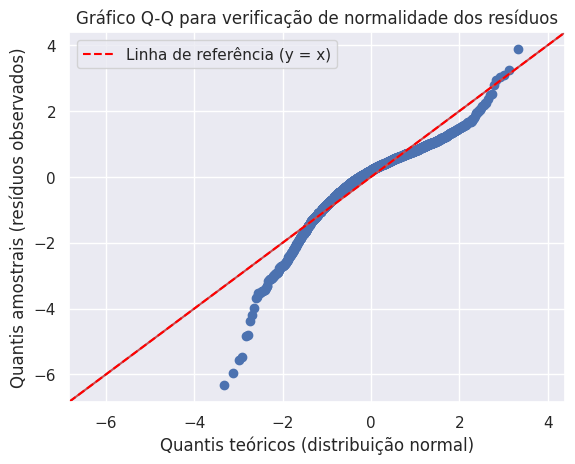

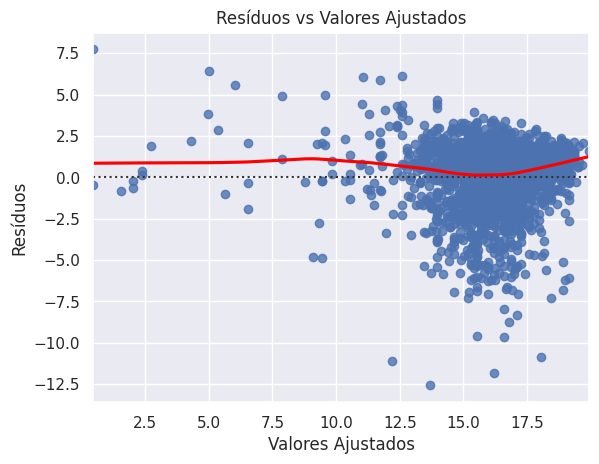

                            OLS Regression Results                            
Dep. Variable:                    roi   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     41.88
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.19e-10
Time:                        23:20:55   Log-Likelihood:                -2818.2
No. Observations:                2218   AIC:                             5640.
Df Residuals:                    2216   BIC:                             5652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0093      0.145     13.812      0.0

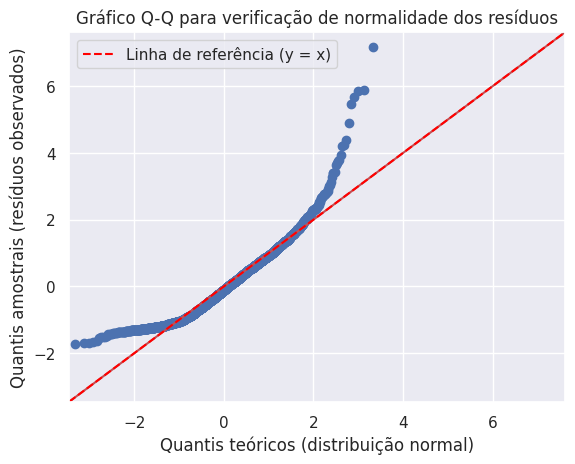

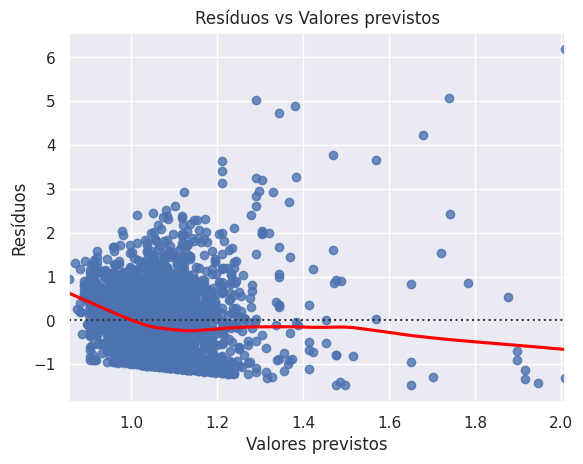

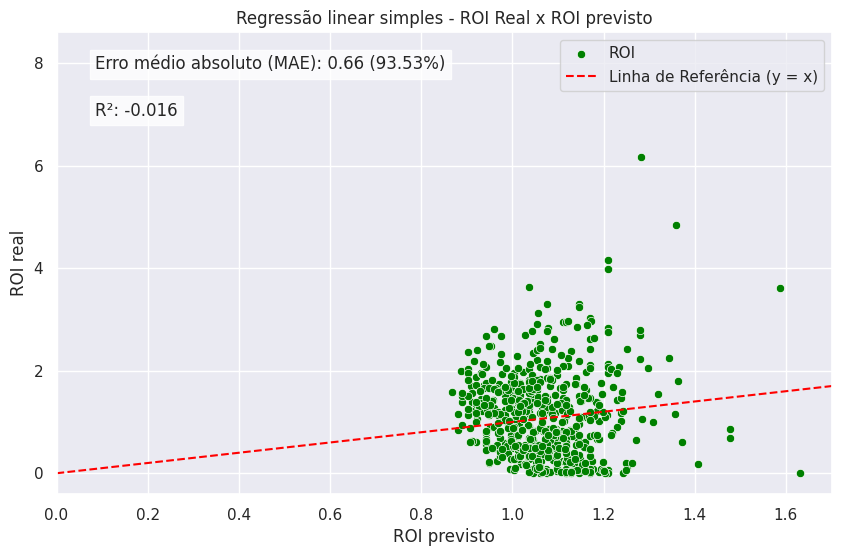

In [149]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error

# Receita
X_train_with_const = sm.add_constant(X_train_revenue['budget'])  # Add a constant for the intercept
X_test_with_const = sm.add_constant(X_test_revenue['budget'])

model_ols_sm = sm.OLS(y_train_revenue, X_train_with_const).fit()

print(model_ols_sm.summary())

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = het_breuschpagan(model_ols_sm.resid, model_ols_sm.model.exog)
print(lzip(name, test))

name = ["Multicollinearity Condition Number"]
test = [np.linalg.cond(model_ols_sm.model.exog)]
print(lzip(name, test))

fig = sm.qqplot(model_ols_sm.resid, line='45', fit=True)
plt.title("Gráfico Q-Q para verificação de normalidade dos resíduos")
plt.xlabel("Quantis teóricos (distribuição normal)")
plt.ylabel("Quantis amostrais (resíduos observados)")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label="Linha de referência (y = x)")
plt.legend()
plt.show()

## Residuos x Fitted Values
sns.residplot(x=model_ols_sm.fittedvalues, y=model_ols_sm.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados")
plt.show()


# =============================================================================================================== #
# ROI - Regresão linear

X_train_with_const = sm.add_constant(X_train_roi['budget'])  # Add a constant for the intercept
X_test_with_const = sm.add_constant(X_test_roi['budget'])

# Fit the model using statsmodels
model_ols_sm = sm.OLS(y_train_roi, X_train_with_const).fit()

# Print the summary with p-values
print(model_ols_sm.summary())

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = het_breuschpagan(model_ols_sm.resid, model_ols_sm.model.exog)
print(lzip(name, test))

name = ["Multicollinearity Condition Number"]
test = [np.linalg.cond(model_ols_sm.model.exog)]
print(lzip(name, test))

fig = sm.qqplot(model_ols_sm.resid, line='45', fit=True)
plt.title("Gráfico Q-Q para verificação de normalidade dos resíduos")
plt.xlabel("Quantis teóricos (distribuição normal)")
plt.ylabel("Quantis amostrais (resíduos observados)")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label="Linha de referência (y = x)")
plt.legend()
plt.show()

## Residuos x Fitted Values
sns.residplot(x=model_ols_sm.fittedvalues, y=model_ols_sm.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores previstos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores previstos")
plt.show()


y_pred_sm = model_ols_sm.predict(X_test_with_const)
mae = mean_absolute_error(y_test_roi, y_pred_sm)
r2 = r2_score(y_test_roi, y_pred_sm)  # Cálculo do R² no conjunto de teste


plt.figure(figsize=(10, 6))
plt.text(0.05, 0.95, f'Erro médio absoluto (MAE): {mae:.2f} ({((math.exp(mae) - 1)*100):.2f}%)', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
# plt.text(0.05, 0.85, f'Erro médio percentual: {((math.exp(mae) - 1)*100):.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.05, 0.85, f'R²: {r2:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))  # Adicionando R² Score


sns.scatterplot(x=y_pred_sm, y=y_test_roi, color='green', label='ROI')
plt.plot([min(y_train_roi), max(y_train_roi)], [min(y_train_roi), max(y_train_roi)], color='red', linestyle='--', label='Linha de Referência (y = x)')
plt.xlim(0, 1.7)
plt.xlabel("ROI previsto")
plt.ylabel("ROI real")
plt.title("Regressão linear simples - ROI Real x ROI previsto")
plt.legend()
plt.show()


# Previsão utilizando as dummie com OLS

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     18.91
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.88e-315
Time:                        23:21:20   Log-Likelihood:                -4379.6
No. Observations:                2218   AIC:                             9111.
Df Residuals:                    2042   BIC:                         1.012e+04
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

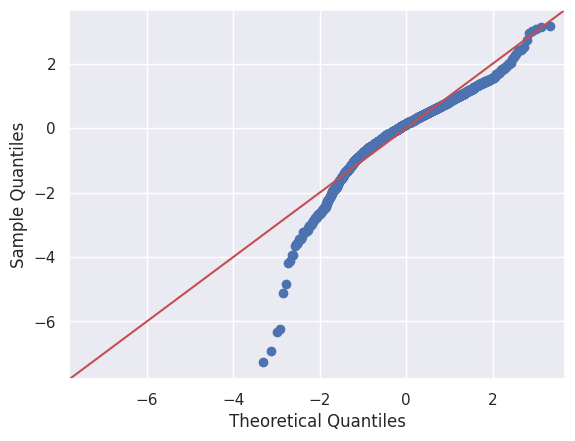

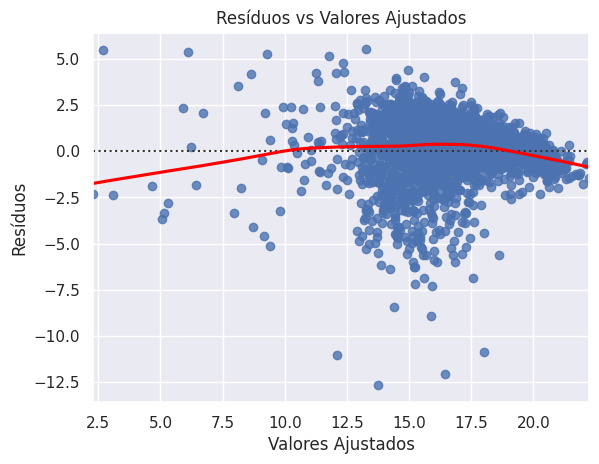

                            OLS Regression Results                            
Dep. Variable:                    roi   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4.688
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           7.89e-67
Time:                        23:21:23   Log-Likelihood:                -2464.4
No. Observations:                2218   AIC:                             5281.
Df Residuals:                    2042   BIC:                             6285.
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

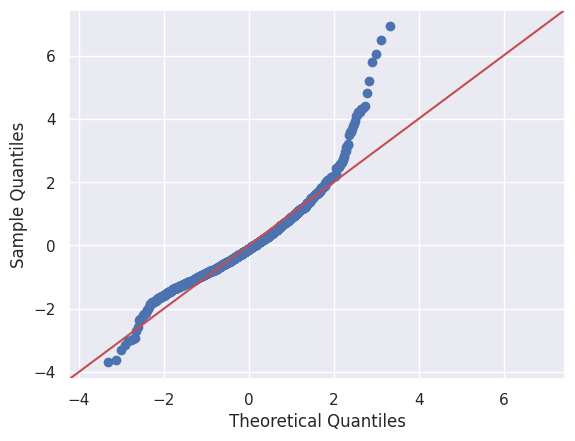

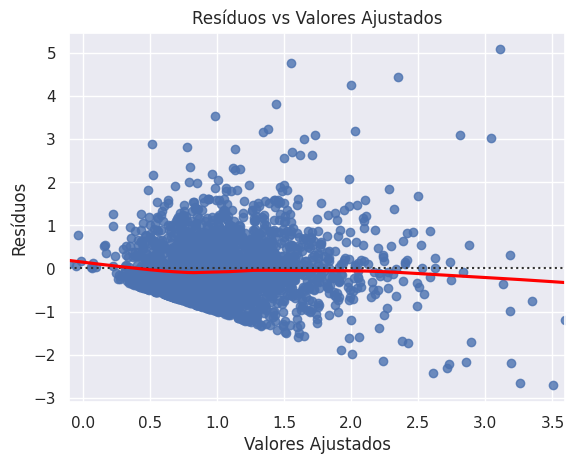

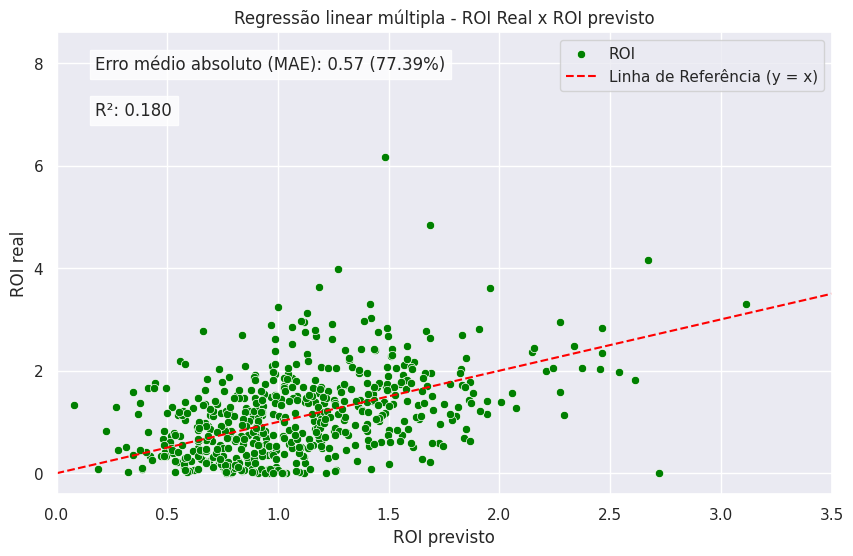

In [150]:
from statsmodels.compat import lzip


# Use PCA-transformed components as predictors
X_train_with_const = sm.add_constant(X_train_revenue)
X_test_with_const = sm.add_constant(X_test_revenue)

# Fit the model using statsmodels
model_ols_sm = sm.OLS(y_train_revenue, X_train_with_const).fit()

# Print the summary with p-values
print(model_ols_sm.summary())

# Teste de Heteroskedasticity Breush-Pagan test:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = het_breuschpagan(model_ols_sm.resid, model_ols_sm.model.exog)
print(lzip(name, test))

name = ["Multicollinearity Condition Number"]
test = [np.linalg.cond(model_ols_sm.model.exog)]
print(lzip(name, test))

sm.qqplot(model_ols_sm.resid, line='45', fit=True)
plt.show()


## Residuos x Fitted Values
sns.residplot(x=model_ols_sm.fittedvalues, y=model_ols_sm.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados")
plt.show()


### ROI

X_train_with_const = sm.add_constant(X_train_roi)
X_test_with_const = sm.add_constant(X_test_roi)

model_ols_sm = sm.OLS(y_train_roi, X_train_with_const).fit()

print(model_ols_sm.summary())

# Teste de Heteroskedasticity Breush-Pagan test:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = het_breuschpagan(model_ols_sm.resid, model_ols_sm.model.exog)
print(lzip(name, test))

name = ["Multicollinearity Condition Number"]
test = [np.linalg.cond(model_ols_sm.model.exog)]
print(lzip(name, test))

sm.qqplot(model_ols_sm.resid, line='45', fit=True)
plt.show()


## Residuos x Fitted Values
sns.residplot(x=model_ols_sm.fittedvalues, y=model_ols_sm.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados")
plt.show()


y_pred_sm = model_ols_sm.predict(X_test_with_const)
mae = mean_absolute_error(y_test_roi, y_pred_sm)
r2 = r2_score(y_test_roi, y_pred_sm)  # Cálculo do R² no conjunto de teste

plt.figure(figsize=(10, 6))
plt.text(0.05, 0.95, f'Erro médio absoluto (MAE): {mae:.2f} ({((math.exp(mae) - 1)*100):.2f}%)', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
# plt.text(0.05, 0.85, f'Erro médio percentual: {((math.exp(mae) - 1)*100):.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.05, 0.85, f'R²: {r2:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))  # Adicionando R² Score


sns.scatterplot(x=y_pred_sm, y=y_test_roi, color='green', label='ROI')
plt.plot([min(y_train_roi), max(y_train_roi)], [min(y_train_roi), max(y_train_roi)], color='red', linestyle='--', label='Linha de Referência (y = x)')
plt.xlim(0, 3.5)
plt.xlabel("ROI previsto")
plt.ylabel("ROI real")
plt.title("Regressão linear múltipla - ROI Real x ROI previsto")
plt.legend()
plt.show()

# Análise de componentes principais pra resolver multicolinearidade

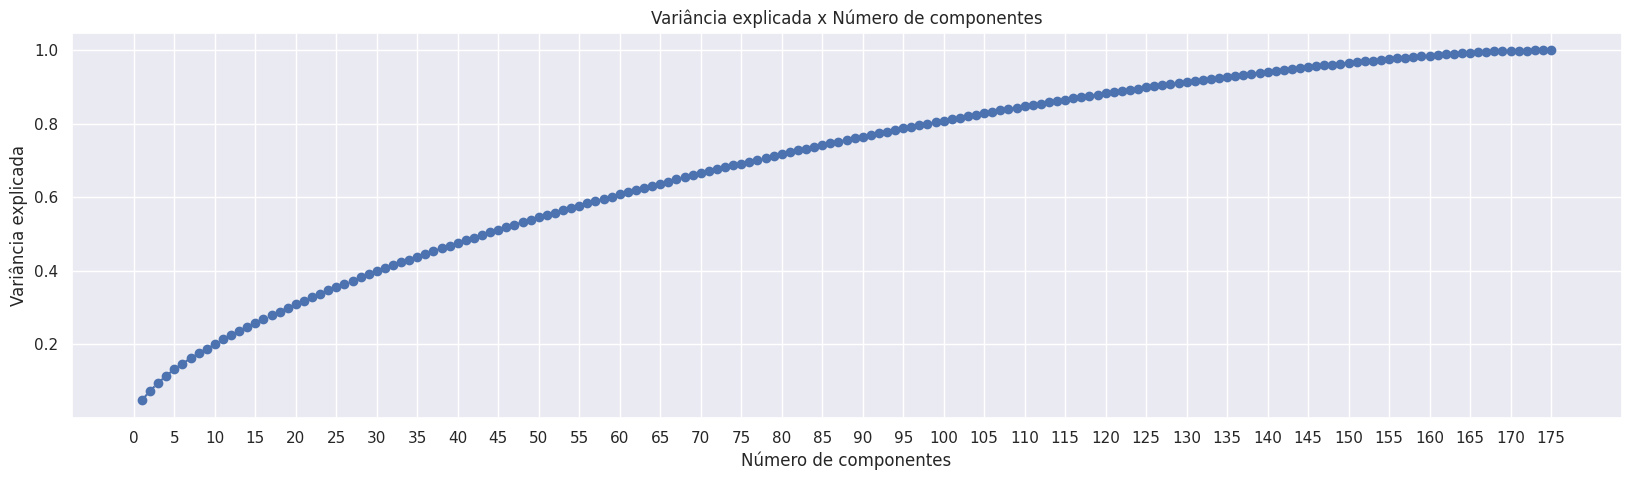

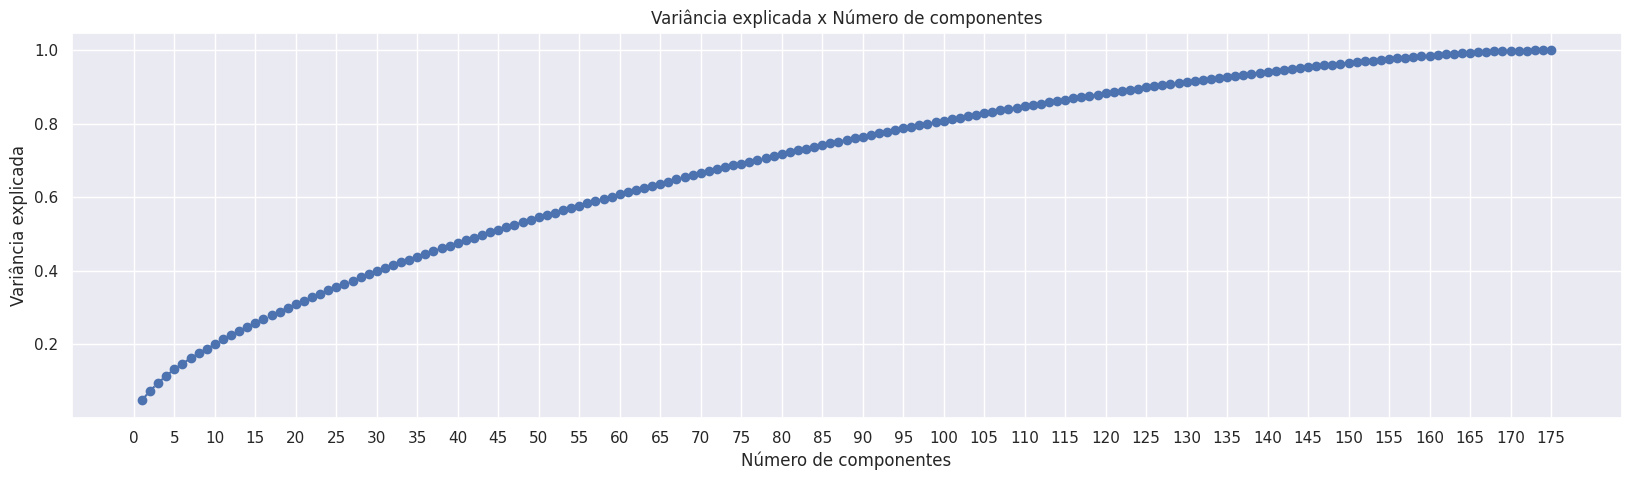

In [26]:
## Gráfico de componentes principais x Variancia

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_train_revenue)

pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X_standardized)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(20, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada')
plt.title('Variância explicada x Número de componentes')
plt.xticks(range(0, len(cumulative_variance) + 1, 5))
plt.show()



scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_train_roi)

pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X_standardized)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(20, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada')
plt.title('Variância explicada x Número de componentes')
plt.xticks(range(0, len(cumulative_variance) + 1, 5))
plt.show()


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     20.83
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.62e-319
Time:                        23:21:44   Log-Likelihood:                -4403.0
No. Observations:                2218   AIC:                             9118.
Df Residuals:                    2062   BIC:                         1.001e+04
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2264      0.039    418.291      0.0

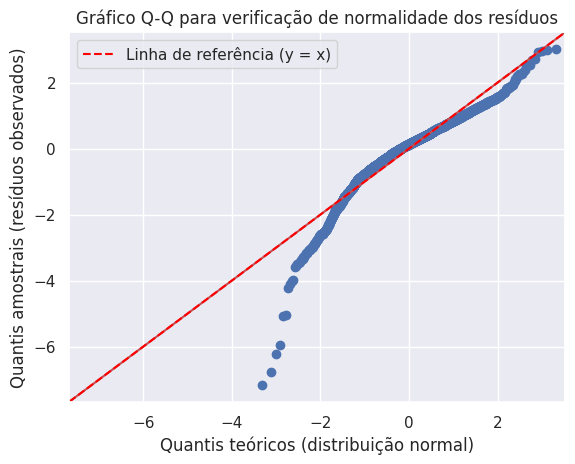

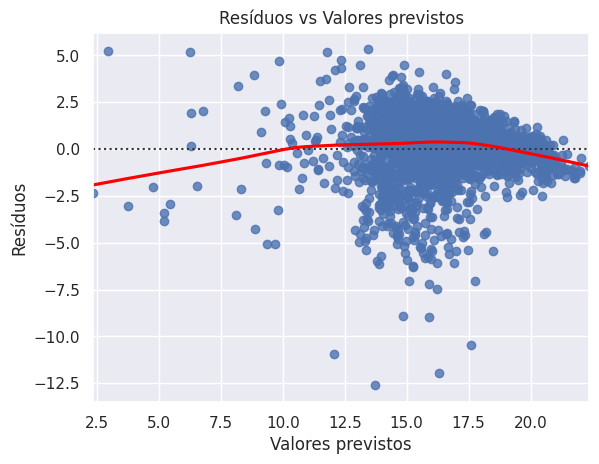

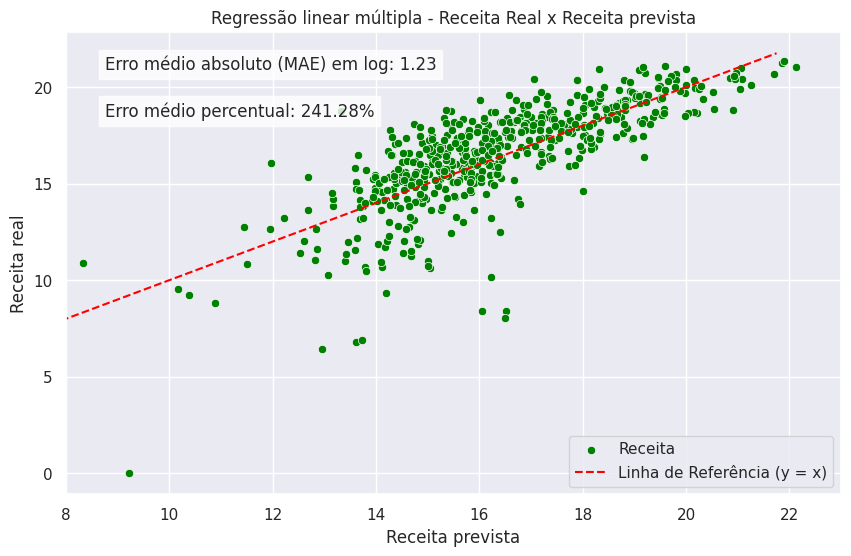

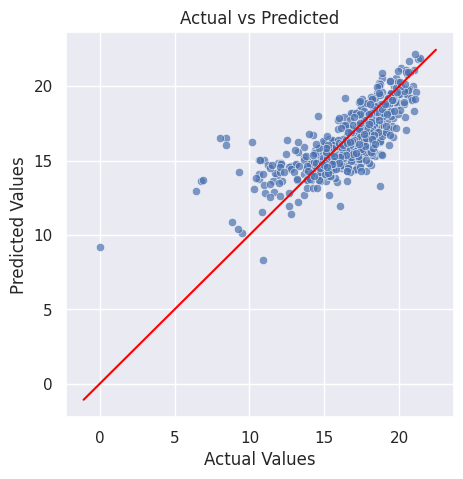

0.32253770552461736
                            OLS Regression Results                            
Dep. Variable:                    roi   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     4.998
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           4.76e-67
Time:                        23:21:48   Log-Likelihood:                -2485.2
No. Observations:                2218   AIC:                             5282.
Df Residuals:                    2062   BIC:                             6172.
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0753      0.016

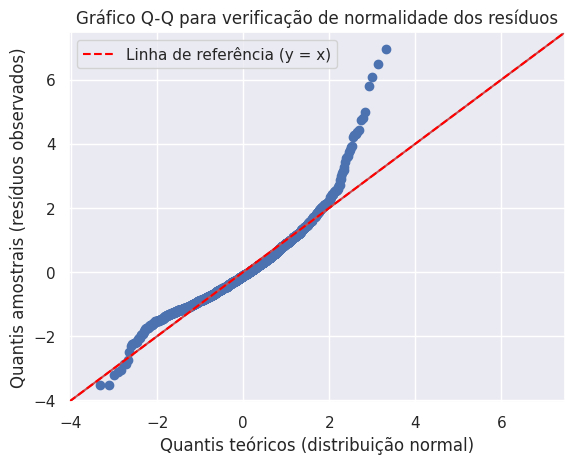

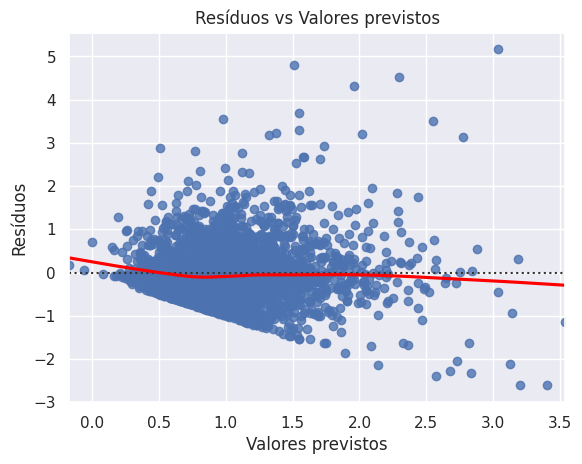

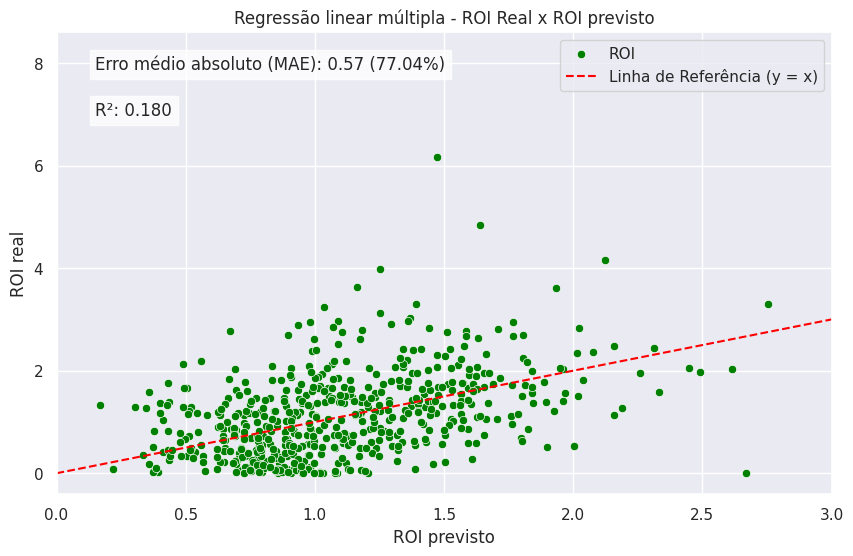

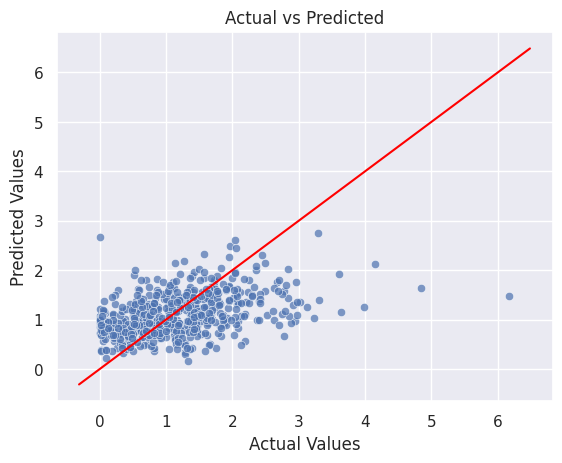

-2.071226190086819


In [152]:
from statsmodels.compat import lzip
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_revenue)  # Fit scaler on training data
X_test_scaled = scaler.transform(X_test_revenue)       # Transform test data

n_components_pca = 155
pca = PCA(n_components=n_components_pca)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit PCA on scaled training data
X_test_pca = pca.transform(X_test_scaled)        # Transform scaled test data

# Use PCA-transformed components as predictors
X_train_with_const = sm.add_constant(X_train_pca)
X_test_with_const = sm.add_constant(X_test_pca)

# Fit the model using statsmodels
model_ols_sm = sm.OLS(y_train_revenue, X_train_with_const).fit()

# Print the summary with p-values
print(model_ols_sm.summary())

# Teste de Heteroskedasticity Breush-Pagan test:
name = ["Lagrange multiplier statistic - Heteroscedasticidade", "p-value", "f-value", "f p-value"]
test = het_breuschpagan(model_ols_sm.resid, model_ols_sm.model.exog)
print(lzip(name, test))

name = ["Multicollinearity Condition Number"]
test = [np.linalg.cond(model_ols_sm.model.exog)]
print(lzip(name, test))

y_pred_sm = model_ols_sm.predict(X_test_with_const)

fig = sm.qqplot(model_ols_sm.resid, line='45', fit=True)
plt.title("Gráfico Q-Q para verificação de normalidade dos resíduos")
plt.xlabel("Quantis teóricos (distribuição normal)")
plt.ylabel("Quantis amostrais (resíduos observados)")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label="Linha de referência (y = x)")
plt.legend()
plt.show()

## Residuos x Fitted Values
sns.residplot(x=model_ols_sm.fittedvalues, y=model_ols_sm.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores previstos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores previstos")
plt.show()


y_pred_sm = model_ols_sm.predict(X_test_with_const)
mae = mean_absolute_error(y_test_revenue, y_pred_sm)


plt.figure(figsize=(10, 6))
plt.text(0.05, 0.95, f'Erro médio absoluto (MAE) em log: {mae:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.05, 0.85, f'Erro médio percentual: {((math.exp(mae) - 1)*100):.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))


sns.scatterplot(x=y_pred_sm, y=y_test_revenue, color='green', label='Receita')
plt.plot([min(y_train_revenue), max(y_train_revenue)], [min(y_train_revenue), max(y_train_revenue)], color='red', linestyle='--', label='Linha de Referência (y = x)')
plt.xlim(8, 23)
plt.xlabel("Receita prevista")
plt.ylabel("Receita real")
plt.title("Regressão linear múltipla - Receita Real x Receita prevista")
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))


ax = sns.scatterplot(y=y_pred_sm, x=y_test_revenue, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

# plt.xticks(range(0, 28, 2))
# plt.yticks(range(0, 28, 2))

x = np.linspace(*ax.get_xlim())
sns.lineplot(y=x, x=x, color='red')
plt.show()

print(r2_score(y_pred_sm, y_test_revenue))


### ROI

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_roi)  # Fit scaler on training data
X_test_scaled = scaler.transform(X_test_roi)       # Transform test data

pca = PCA(n_components=n_components_pca)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit PCA on scaled training data
X_test_pca = pca.transform(X_test_scaled)        # Transform scaled test data

# Use PCA-transformed components as predictors
X_train_with_const = sm.add_constant(X_train_pca)
X_test_with_const = sm.add_constant(X_test_pca)

# Fit the model using statsmodels
model_ols_sm = sm.OLS(y_train_roi, X_train_with_const).fit()

# Print the summary with p-values
print(model_ols_sm.summary())

# Teste de Heteroskedasticity Breush-Pagan test:
name = ["Lagrange multiplier statistic - Heteroscedasticidade", "p-value", "f-value", "f p-value"]
test = het_breuschpagan(model_ols_sm.resid, model_ols_sm.model.exog)
print(lzip(name, test))

name = ["Multicollinearity Condition Number"]
test = [np.linalg.cond(model_ols_sm.model.exog)]
print(lzip(name, test))

y_pred_sm = model_ols_sm.predict(X_test_with_const)
residuals_sm = y_test_roi - y_pred_sm

fig = sm.qqplot(model_ols_sm.resid, line='45', fit=True)
plt.title("Gráfico Q-Q para verificação de normalidade dos resíduos")
plt.xlabel("Quantis teóricos (distribuição normal)")
plt.ylabel("Quantis amostrais (resíduos observados)")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label="Linha de referência (y = x)")
plt.legend()
plt.show()

## Residuos x Fitted Values
sns.residplot(x=model_ols_sm.fittedvalues, y=model_ols_sm.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores previstos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores previstos")
plt.show()


y_pred_sm = model_ols_sm.predict(X_test_with_const)
mae = mean_absolute_error(y_test_roi, y_pred_sm)


plt.figure(figsize=(10, 6))
plt.text(0.05, 0.95, f'Erro médio absoluto (MAE): {mae:.2f} ({((math.exp(mae) - 1)*100):.2f}%)', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
# plt.text(0.05, 0.85, f'Erro médio percentual: {((math.exp(mae) - 1)*100):.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.05, 0.85, f'R²: {r2:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))  # Adicionando R² Score

sns.scatterplot(x=y_pred_sm, y=y_test_roi, color='green', label='ROI')
plt.plot([min(y_train_roi), max(y_train_roi)], [min(y_train_roi), max(y_train_roi)], color='red', linestyle='--', label='Linha de Referência (y = x)')
plt.xlim(0, 3)
plt.xlabel("ROI previsto")
plt.ylabel("ROI real")
plt.title("Regressão linear múltipla - ROI Real x ROI previsto")
plt.legend()
plt.show()


ax = sns.scatterplot(y=y_pred_sm, x=y_test_roi, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

# plt.xticks(range(0, 28, 2))
# plt.yticks(range(0, 28, 2))

x = np.linspace(*ax.get_xlim())
sns.lineplot(y=x, x=x, color='red')
plt.show()

print(r2_score(y_pred_sm, y_test_roi))


In [66]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.pipeline import Pipeline

model = LinearRegression()
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Padronização
    ('pca', PCA(n_components=n_components_pca)),       # Redução de dimensionalidade
    ('regression', model)  # Classificador
])


# Configurando o KFold
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Definindo as métricas
scoring = {
    'r2': 'r2',  # R²
    'rmse': 'neg_root_mean_squared_error',  # RMSE
    'mae': 'neg_mean_absolute_error',  # MAE (em valores negativos, por padrão)
}

# Avaliação com cross_validate
scores = cross_validate(pipeline, X_train_roi, y_train_roi, cv=kf, scoring=scoring, return_train_score=True)

all_r2 = scores['test_r2']

# Resultados
print("R² por fold:", scores['test_r2'])
print("R² médio:", scores['test_r2'].mean())

# Lista para armazenar os R² ajustados de cada fold
r2_adjusted_list = []

# Calcular R² ajustado para cada fold
for fold_r2, fold_size in zip(scores['test_r2'], kf.split(X)):
    n = len(fold_size[1])  # Número de amostras no fold (índice de teste)
    r2_adjusted = 1 - ((1 - fold_r2) * (n - 1)) / (n - n_components_pca - 1)
    r2_adjusted_list.append(r2_adjusted)

# Calcular a média do R² ajustado
r2_adjusted_mean = np.mean(r2_adjusted_list)

print("R² ajustado por fold:", r2_adjusted_list)
# print("R² ajustado médio:", r2_adjusted_mean)

print("MAE por fold:", (-scores['test_mae']))
print("MAE médio:", (-scores['test_mae']).mean())

print("Erro médio percentual por fold:", (np.exp(-scores['test_mae']) - 1) * 100)
print("Erro médio percentual médio:", ((np.exp(-scores['test_mae']) - 1) * 100).mean())


R² por fold: [0.13462096 0.1993727  0.1818747  0.13547449 0.24983802]
R² médio: 0.18023617673176578
R² ajustado por fold: [-0.2015538483805983, -0.11164793453441413, -0.1359433949070883, -0.20121257432306905, -0.04231048351848887]
MAE por fold: [0.61327469 0.55991862 0.58649101 0.61587903 0.57939075]
MAE médio: 0.5909908215168447
Erro médio percentual por fold: [84.64681246 75.05300376 79.76693366 85.12832118 78.49506267]
Erro médio percentual médio: 80.61802674733784


In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.pipeline import Pipeline

model = LinearRegression()
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Padronização
    ('pca', PCA(n_components=n_components_pca)),       # Redução de dimensionalidade
    ('regression', model)  # Classificador
])


# Configurando o KFold
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Definindo as métricas
scoring = {
    'r2': 'r2',  # R²
    'rmse': 'neg_root_mean_squared_error',  # RMSE
    'mae': 'neg_mean_absolute_error',  # MAE (em valores negativos, por padrão)
}

# Avaliação com cross_validate
scores = cross_validate(pipeline, X_train_revenue, y_train_revenue, cv=kf, scoring=scoring, return_train_score=True)

all_r2 = scores['test_r2']

# Resultados
print("R² por fold:", scores['test_r2'])
print("R² médio:", scores['test_r2'].mean())

# Lista para armazenar os R² ajustados de cada fold
r2_adjusted_list = []

# Calcular R² ajustado para cada fold
for fold_r2, fold_size in zip(scores['test_r2'], kf.split(X)):
    n = len(fold_size[1])  # Número de amostras no fold (índice de teste)
    r2_adjusted = 1 - ((1 - fold_r2) * (n - 1)) / (n - n_components_pca - 1)
    r2_adjusted_list.append(r2_adjusted)

# Calcular a média do R² ajustado
r2_adjusted_mean = np.mean(r2_adjusted_list)

print("R² ajustado por fold:", r2_adjusted_list)
print("R² ajustado médio:", r2_adjusted_mean)

print("MAE por fold (negativo):", -scores['test_mae'])  # Valores negativos
print("MAE médio:", -scores['test_mae'].mean())  # Transformar para valores positivos


R² por fold: [0.586151   0.57075751 0.5592251  0.5600783  0.5783311 ]
R² médio: 0.570908603075247
R² ajustado por fold: [0.4253825845922512, 0.40400917672003467, 0.38799675987460125, 0.3887520129865486, 0.4141133165599704]
R² ajustado médio: 0.40405077014668117
MAE por fold (negativo): [1.29298042 1.31386983 1.32830664 1.29163257 1.35600488]
MAE médio: 1.3165588703183726


Arvore de decisão para prever o ROI

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from scipy.stats import randint


# dummie_variables = ['cast', 'crew', 'original_language', 'belongs_to_collection', 'production_companies', 'genres', 'keywords', 'production_countries', 'spoken_languages']

# dummie_to_ignore_eval = ['original_language'] # Dummies que são string
# dummie_variables_threshold = {
#     'production_companies': {
#         'name': 40
#     },
#     'cast': {
#         'name': 20,
#         'gender': 0,
#     },
#     'crew': {
#         'name': 40,
#         'gender': 0
#     },
#     'keywords': {
#         'value': 60,
#     },
#     'spoken_languages': {
#         'value': 60
#     },
#     'production_countries': {
#         'value': 50,
#     },
#     'original_language': {
#         'value': 10,
#     },
#     'genres': {
#         'value': 20,
#     }
# }

# === 1. Leitura e pré-processamento dos dados ===
# Substitua 'seu_dataframe.csv' pelo caminho do seu dataset
df = movies_data_by_year['all'].copy()

df['roi'] = (df['revenue'] - df['budget']) / df['budget']

# df['ROI_category'] = pd.qcut(df['roi'], q=3, labels=['Baixo', 'Médio', 'Alto'])
quantis = df['roi'].quantile([0.5])
print("Quantis (metade):\n", quantis)
df['ROI_category'] = pd.cut(
    df['roi'], 
    bins=[-float('inf'), df['roi'].median() , float('inf')],  # Limites dos intervalos
    labels=['Baixo', 'Alto']         # Nomes das classes
)

# print(df['ROI_category'].value_counts())



# Filtrar colunas relevantes
df = df[['budget', 'genres', 'ROI_category', 'keywords', 'runtime', 'production_countries', 'belongs_to_collection']]

def one_hot_encoding(column, prefix):
    mlb = MultiLabelBinarizer()
    encoded_data = mlb.fit_transform(column)
    encoded_df = pd.DataFrame(encoded_data, columns=[f"{prefix}: {label}" for label in mlb.classes_])
    return encoded_df
# Pré-processamento para colunas categóricas
def process_multivalued_column(column, prefix):
    """
    Função para converter strings com múltiplos valores em listas de valores e fazer a binarização.
    """
    # Converte strings para listas, se necessário
    column = column.apply(lambda x: eval(x) if isinstance(x, str) else [])
    
    # Binarização
    return one_hot_encoding(column, prefix)

def extract_key_from_column(column, key="known_for_department"):
    """
    Extrai um conjunto de gêneros relacionados a roles no cast ou crew.
    """
    def extract_values(roles):
        if isinstance(roles, str):
            roles = ast.literal_eval(roles)
        return [role.get(key, None) for role in roles if key in role]

    return column.apply(extract_values)

# cast_gender = extract_key_from_column(df['cast'], key="gender")
# crew_gender = extract_key_from_column(df['crew'], key="gender")
# cast_gender_encoded = process_multivalued_column(cast_gender, prefix='cast_gender')
# crew_gender_encoded = process_multivalued_column(crew_gender, prefix='crew_gender')
# production_companies_names = extract_key_from_column(df["production_companies"])
# production_companies_encoded = process_multivalued_column(production_companies_names, "production_company")

# Processar 'keywords' e 'genres'
keywords_encoded = process_multivalued_column(df['keywords'], 'Palavra-chave')
production_countries_encoded = process_multivalued_column(df['production_countries'], "País Produtor")
genres_encoded = process_multivalued_column(df['genres'], "Gênero")

# Processar 'belongs_to_collection' (simples presença/ausência)
# df['belongs_to_collection'] = df['belongs_to_collection'].notnull().astype(int)

# Combinar variáveis processadas no dataframe principal
df.reset_index(drop=True, inplace=True)  # Resetar índice
df = pd.concat([df, genres_encoded, keywords_encoded, production_countries_encoded], axis=1)

df['Pertence à coleção'] = df['belongs_to_collection'].notnull().astype(int)


# === 2. Divisão de dados em treino e teste ===
# Variáveis preditoras (X) e variável-alvo (y)
X = df.drop(columns=['genres', 'ROI_category', 'keywords', 'production_countries', 'belongs_to_collection'])  # Excluir colunas originais não processadas e alvo
y = df['ROI_category']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



tree_model = DecisionTreeClassifier(random_state=42)



## Randomized search

param_dist = {
    'criterion': ['gini'],                  # Critério de divisão
    'max_depth': range(3, 11),                       # Profundidade máxima
    'min_samples_split': range(2, 11),               # Amostras mínimas para divisão
    'min_samples_leaf': range(1, 11)                 # Amostras mínimas em folha
}

# === 3. Configurar o RandomizedSearchCV ===
random_search = RandomizedSearchCV(
    estimator=tree_model,           # Modelo base
    param_distributions=param_dist, # Hiperparâmetros e seus intervalos
    n_iter=100,                      # Número de combinações a avaliar
    scoring='accuracy',             # Métrica de avaliação
    cv=3,                           # Validação cruzada com 3 divisões
    verbose=2,                      # Mostrar progresso
    random_state=42,                # Garantir reprodutibilidade
    n_jobs=-1                       # Usar todos os núcleos disponíveis
)

# === 4. Ajustar o RandomizedSearchCV ao conjunto de treino ===
random_search.fit(X_train, y_train)

# === 5. Resultados ===
print("Melhores Hiperparâmetros:", random_search.best_params_)
print("Melhor Acurácia:", random_search.best_score_)

# Avaliar no conjunto de teste
best_model = random_search.best_estimator_

# Validar o modelo ajustado
# scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring='accuracy')
# print(f"Acurácia média do modelo ajustado: {scores.mean():.4f}")
# print(f"Desvio padrão da acurácia: {scores.std():.4f}")


Quantis (metade):
 0.5    0.685568
Name: roi, dtype: float64
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Melhores Hiperparâmetros: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 4, 'criterion': 'gini'}
Melhor Acurácia: 0.65012556534884



Acurácia no conjunto de teste: 0.6792792792792792

Relatório de Classificação:
               precision    recall  f1-score   support

        Alto       0.68      0.65      0.67       275
       Baixo       0.67      0.70      0.69       280

    accuracy                           0.68       555
   macro avg       0.68      0.68      0.68       555
weighted avg       0.68      0.68      0.68       555



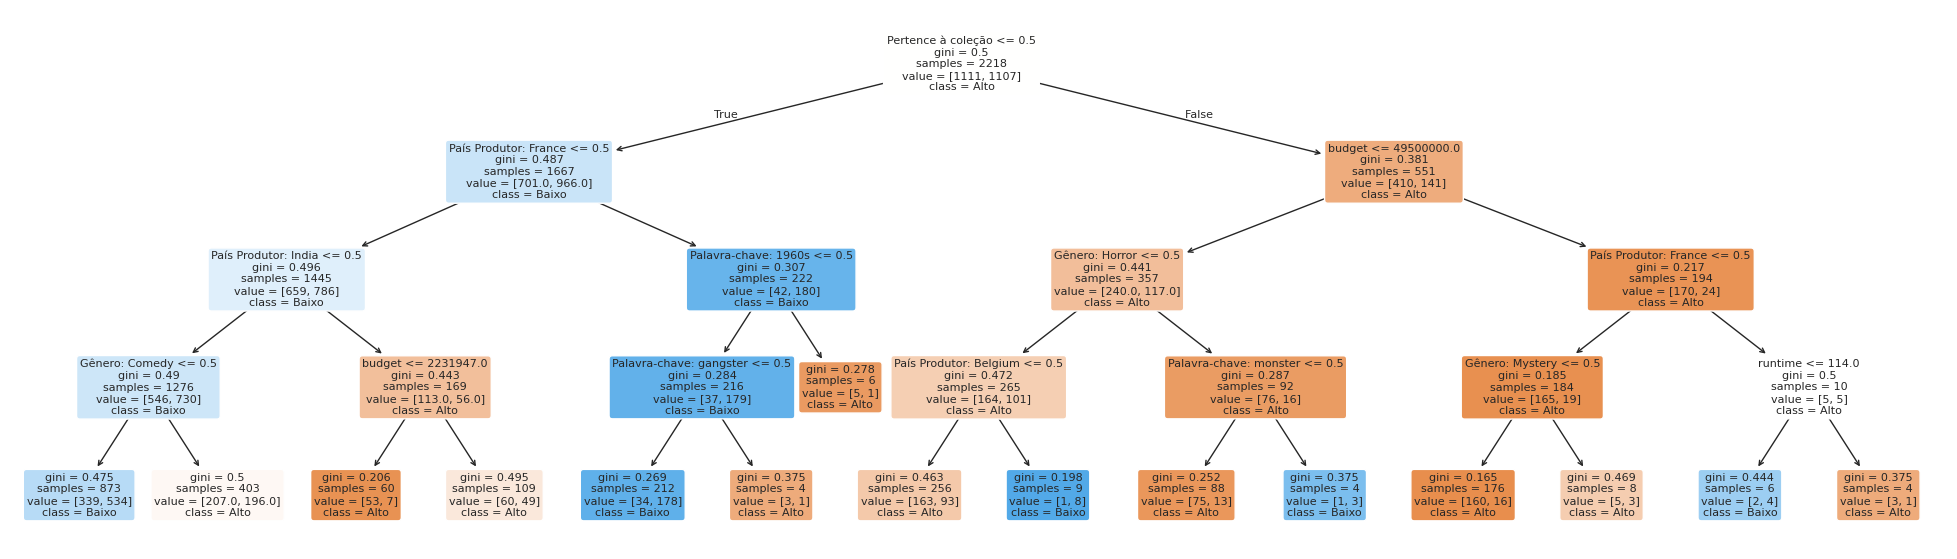

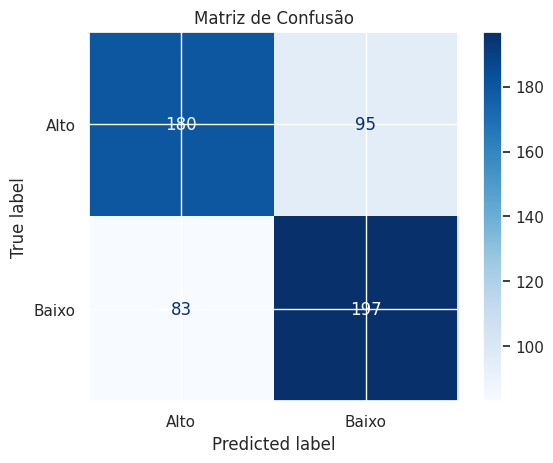

Top 10 variáveis mais importantes:
                              Feature  Importance
7648              Pertence à coleção    0.467565
7585           País Produtor: France    0.163876
0                             budget    0.102653
7593            País Produtor: India    0.093261
5                     Gênero: Comedy    0.046701
12                    Gênero: Horror    0.031620
45              Palavra-chave: 1960s    0.027590
7568          País Produtor: Belgium    0.025900
4462          Palavra-chave: monster    0.014965
2841         Palavra-chave: gangster    0.014717
14                   Gênero: Mystery    0.006659
1                            runtime    0.004493
5103  Palavra-chave: personal growth    0.000000
5100           Palavra-chave: persia    0.000000
5101   Palavra-chave: person on fire    0.000000


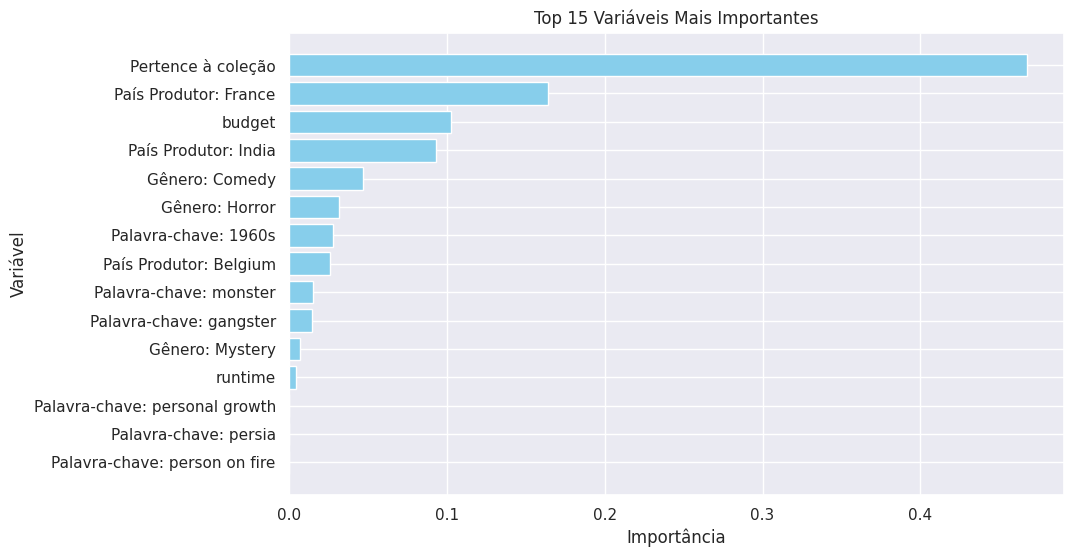

In [63]:
y_pred = best_model.predict(X_test)
print("\nAcurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(25, 7))
tree.plot_tree(best_model, feature_names=X.columns, class_names=model.classes_, filled=True, fontsize=8, rounded=True)

# plt.savefig("arvore_decisao.png", dpi=300)  # dpi=300 para alta qualidade

plt.show()

# Gerar matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

importances = best_model.feature_importances_
features = X.columns

# Combinar nomes das variáveis e suas importâncias
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Ordenar em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as 10 mais importantes
top_15 = importance_df.head(15)
print("Top 10 variáveis mais importantes:\n", top_15)
plt.figure(figsize=(10, 6))
plt.barh(top_15['Feature'], top_15['Importance'], color='skyblue')
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.title("Top 15 Variáveis Mais Importantes")
plt.gca().invert_yaxis()  # Inverter a ordem para a mais importante no topo
plt.show()